# Analysing OSM history data for Kharkiv before the bombing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sqlalchemy import create_engine, text

In [2]:
# creating connection to PostreSQL and querying database 
import psycopg2
 
# declare the connection string specifying the  hostname, database name, user name, and password
conn_string = "host='localhost' dbname='Ukraine'\
user='postgres' password='Open@close'"
 
# using the connection string to establish the connection
conn = psycopg2.connect(conn_string)

#creating engine 
engine = create_engine('postgresql+psycopg2://', creator=lambda: conn)

In [3]:
#querying postgres to fetch data of kharkiv for the 6 months before the bombing 
query1 = "SELECT * FROM merged1 WHERE timestamp <TO_DATE('2022-02-24','yyyy-mm-dd') AND timestamp >TO_DATE('2021-08-24','yyyy-mm-dd') AND latitude BETWEEN 48.531178 AND 50.4594753 AND longitude BETWEEN 34.8563132 AND 38.093529;"

In [4]:
#storing in a dataframe
kharkiv_1= pd.read_sql(query1, con=engine)
kharkiv_1.head()

id  changeset deleted                  timestamp      uid  \
0  9251063105  113772892   false  2021-11-14 17:48:40+00:00   508157   
1  9258391776  113869515   false  2021-11-16 21:01:55+00:00  2769224   
2  9252634106  113794955   false  2021-11-15 08:59:23+00:00   508157   
3  9260631685  113902306   false  2021-11-17 15:06:22+00:00  2769224   
4  9261464845  113913275   false  2021-11-17 19:33:51+00:00  2769224   

          user  version visibility    tp   extra   latitude  longitude  
0  reallystate        1       true  node  184705  49.979777  36.268690  
1     old wolf        1       true  node  263426  49.181996  36.688821  
2  reallystate        1       true  node  204088  49.992495  36.280724  
3     old wolf        1       true  node  276489  49.204371  36.690381  
4     old wolf        1       true  node  286105  49.181970  36.685149

In [5]:
#removing duplicate raws 
kharkiv_1=kharkiv_1.drop_duplicates(subset=['id', 'changeset'],keep='first',ignore_index=True)
kharkiv_1.head()

id  changeset deleted                  timestamp      uid  \
0  9251063105  113772892   false  2021-11-14 17:48:40+00:00   508157   
1  9258391776  113869515   false  2021-11-16 21:01:55+00:00  2769224   
2  9252634106  113794955   false  2021-11-15 08:59:23+00:00   508157   
3  9260631685  113902306   false  2021-11-17 15:06:22+00:00  2769224   
4  9261464845  113913275   false  2021-11-17 19:33:51+00:00  2769224   

          user  version visibility    tp   extra   latitude  longitude  
0  reallystate        1       true  node  184705  49.979777  36.268690  
1     old wolf        1       true  node  263426  49.181996  36.688821  
2  reallystate        1       true  node  204088  49.992495  36.280724  
3     old wolf        1       true  node  276489  49.204371  36.690381  
4     old wolf        1       true  node  286105  49.181970  36.685149

In [6]:
#splitting date only from timestamp and adding to the daraframe
kharkiv_1['date'] = kharkiv_1.loc[:, 'timestamp'].astype(str).str.split().str[0]
kharkiv_1.head()

id  changeset deleted                  timestamp      uid  \
0  9251063105  113772892   false  2021-11-14 17:48:40+00:00   508157   
1  9258391776  113869515   false  2021-11-16 21:01:55+00:00  2769224   
2  9252634106  113794955   false  2021-11-15 08:59:23+00:00   508157   
3  9260631685  113902306   false  2021-11-17 15:06:22+00:00  2769224   
4  9261464845  113913275   false  2021-11-17 19:33:51+00:00  2769224   

          user  version visibility    tp   extra   latitude  longitude  \
0  reallystate        1       true  node  184705  49.979777  36.268690   
1     old wolf        1       true  node  263426  49.181996  36.688821   
2  reallystate        1       true  node  204088  49.992495  36.280724   
3     old wolf        1       true  node  276489  49.204371  36.690381   
4     old wolf        1       true  node  286105  49.181970  36.685149   

         date  
0  2021-11-14  
1  2021-11-16  
2  2021-11-15  
3  2021-11-17  
4  2021-11-17

In [7]:
kharkiv_1

id  changeset deleted                  timestamp      uid  \
0        9251063105  113772892   false  2021-11-14 17:48:40+00:00   508157   
1        9258391776  113869515   false  2021-11-16 21:01:55+00:00  2769224   
2        9252634106  113794955   false  2021-11-15 08:59:23+00:00   508157   
3        9260631685  113902306   false  2021-11-17 15:06:22+00:00  2769224   
4        9261464845  113913275   false  2021-11-17 19:33:51+00:00  2769224   
...             ...        ...     ...                        ...      ...   
1029611  9228567991  113426476   false  2021-11-05 20:41:16+00:00  2769224   
1029612  9229384217  113436112   false  2021-11-06 07:42:55+00:00  2481418   
1029613  9215835195  113225525   false  2021-11-01 09:21:28+00:00  5294661   
1029614  9216350356  113238379   false  2021-11-01 14:04:25+00:00   373695   
1029615  9218723146  113286186   false  2021-11-02 13:58:58+00:00   914526   

                user  version visibility    tp   extra   latitude  longitude  \
0        reallystate        1       true  node  184705  49.979777  36.268690   
1           old wolf        1       true  node  263426  49.181996  36.688821   
2        reallystate        1       true  node  204088  49.992495  36.280724   
3           old wolf        1       true  node  276489  49.204371  36.690381   
4           old wolf        1       true  node  286105  49.181970  36.685149   
...              ...      ...        ...   ...     ...        ...        ...   
1029611     old wolf        1       true  node  255204  49.131686  36.656088   
1029612        Mr_67        1       true  node  259945  49.950813  36.083871   
1029613     Boroshno        1       true  node   98687  49.714918  36.286825   
1029614        algot        1       true  node  107426  48.647424  35.470031   
1029615   victhorvik        1       true  node  131338  49.892073  35.620300   

               date  
0        2021-11-14  
1        2021-11-16  
2        2021-11-15  
3        2021-11-17  
4        2021-11-17  
...             ...  
1029611  2021-11-05  
1029612  2021-11-06  
1029613  2021-11-01  
1029614  2021-11-01  
1029615  2021-11-02  

[1029616 rows x 13 columns]

### *Assigning Human and Bot categories to changesets* 

In [8]:
#taking only useful columns
kharkiv1=kharkiv_1.drop(['latitude','longitude','extra'],axis=1)
kharkiv1.head()

id  changeset deleted                  timestamp      uid  \
0  9251063105  113772892   false  2021-11-14 17:48:40+00:00   508157   
1  9258391776  113869515   false  2021-11-16 21:01:55+00:00  2769224   
2  9252634106  113794955   false  2021-11-15 08:59:23+00:00   508157   
3  9260631685  113902306   false  2021-11-17 15:06:22+00:00  2769224   
4  9261464845  113913275   false  2021-11-17 19:33:51+00:00  2769224   

          user  version visibility    tp        date  
0  reallystate        1       true  node  2021-11-14  
1     old wolf        1       true  node  2021-11-16  
2  reallystate        1       true  node  2021-11-15  
3     old wolf        1       true  node  2021-11-17  
4     old wolf        1       true  node  2021-11-17

In [9]:
#counting number of edits in each changeset and then assigning a category [humna/bot] based on the counts
#for this classification, it is assumed that a changeset having more than 1000 edits in one time is contributed by automated script

df1=kharkiv1.drop(['deleted','timestamp','uid','user','version','visibility','tp'],axis=1)
df1=df1.groupby(['date','changeset']).count()
df1

id
date       changeset      
2021-08-24 110146734     2
           110147735     6
           110149386     1
           110149739     1
           110150648     2
...                    ...
2022-02-23 117769306     1
           117771620   525
           117777571    41
           117778985     3
           117791128  7714

[5675 rows x 1 columns]

In [10]:
df1['category']=df1['id'].apply(lambda x:'human' if x <1000 else 'bot')
df1

id category
date       changeset               
2021-08-24 110146734     2    human
           110147735     6    human
           110149386     1    human
           110149739     1    human
           110150648     2    human
...                    ...      ...
2022-02-23 117769306     1    human
           117771620   525    human
           117777571    41    human
           117778985     3    human
           117791128  7714      bot

[5675 rows x 2 columns]

In [11]:
#total changesets contribued by each -bot and human
df1.groupby(['category']).count()

id
category      
bot        176
human     5499

In [12]:
#adding category to the original dataframe 
kharkiv1=kharkiv1.merge(df1['category'], on='changeset', how='left')
kharkiv1.head(7)

id  changeset deleted                  timestamp      uid  \
0  9251063105  113772892   false  2021-11-14 17:48:40+00:00   508157   
1  9258391776  113869515   false  2021-11-16 21:01:55+00:00  2769224   
2  9252634106  113794955   false  2021-11-15 08:59:23+00:00   508157   
3  9260631685  113902306   false  2021-11-17 15:06:22+00:00  2769224   
4  9261464845  113913275   false  2021-11-17 19:33:51+00:00  2769224   
5  9262061684  113921941   false  2021-11-18 00:20:13+00:00  4085539   
6  9264460981  113953130   false  2021-11-18 17:08:37+00:00  7154639   

          user  version visibility    tp        date category  
0  reallystate        1       true  node  2021-11-14    human  
1     old wolf        1       true  node  2021-11-16    human  
2  reallystate        1       true  node  2021-11-15    human  
3     old wolf        1       true  node  2021-11-17    human  
4     old wolf        1       true  node  2021-11-17    human  
5     Volkov31        1       true  node  2021-11-18    human  
6    trofimich        1       true  node  2021-11-18    human

In [13]:
kharkiv1

id  changeset deleted                  timestamp      uid  \
0        9251063105  113772892   false  2021-11-14 17:48:40+00:00   508157   
1        9258391776  113869515   false  2021-11-16 21:01:55+00:00  2769224   
2        9252634106  113794955   false  2021-11-15 08:59:23+00:00   508157   
3        9260631685  113902306   false  2021-11-17 15:06:22+00:00  2769224   
4        9261464845  113913275   false  2021-11-17 19:33:51+00:00  2769224   
...             ...        ...     ...                        ...      ...   
1029611  9228567991  113426476   false  2021-11-05 20:41:16+00:00  2769224   
1029612  9229384217  113436112   false  2021-11-06 07:42:55+00:00  2481418   
1029613  9215835195  113225525   false  2021-11-01 09:21:28+00:00  5294661   
1029614  9216350356  113238379   false  2021-11-01 14:04:25+00:00   373695   
1029615  9218723146  113286186   false  2021-11-02 13:58:58+00:00   914526   

                user  version visibility    tp        date category  
0        reallystate        1       true  node  2021-11-14    human  
1           old wolf        1       true  node  2021-11-16    human  
2        reallystate        1       true  node  2021-11-15    human  
3           old wolf        1       true  node  2021-11-17    human  
4           old wolf        1       true  node  2021-11-17    human  
...              ...      ...        ...   ...         ...      ...  
1029611     old wolf        1       true  node  2021-11-05    human  
1029612        Mr_67        1       true  node  2021-11-06    human  
1029613     Boroshno        1       true  node  2021-11-01    human  
1029614        algot        1       true  node  2021-11-01    human  
1029615   victhorvik        1       true  node  2021-11-02    human  

[1029616 rows x 11 columns]

### *Comparing the contribution done by Humans and Bots*

In [14]:
# date-wise grouping based on categories
df2=kharkiv1.groupby(['date','category']).count()
df2.head(10)

id  changeset  deleted  timestamp   uid  user  version  \
date       category                                                             
2021-08-24 human      223        223      223        223   223   223      223   
2021-08-25 human     5396       5396     5396       5396  5396  5396     5396   
2021-08-26 human     5615       5615     5615       5615  5615  5615     5615   
2021-08-27 bot       1248       1248     1248       1248  1248  1248     1248   
           human     3289       3289     3289       3289  3289  3289     3289   
2021-08-28 bot       1258       1258     1258       1258  1258  1258     1258   
           human     2379       2379     2379       2379  2379  2379     2379   
2021-08-29 human      955        955      955        955   955   955      955   
2021-08-30 human     1660       1660     1660       1660  1660  1660     1660   
2021-08-31 bot       2455       2455     2455       2455  2455  2455     2455   

                     visibility    tp  
date       category                    
2021-08-24 human            223   223  
2021-08-25 human           5396  5396  
2021-08-26 human           5615  5615  
2021-08-27 bot             1248  1248  
           human           3289  3289  
2021-08-28 bot             1258  1258  
           human           2379  2379  
2021-08-29 human            955   955  
2021-08-30 human           1660  1660  
2021-08-31 bot             2455  2455

In [15]:
#creating two sepearte datafarmes each having daily total contribution by human and bot respectively for the 6 months 
df3=df2.xs('human', level='category')
df4=df2.xs('bot', level='category')

In [16]:
df3.head(3)

id  changeset  deleted  timestamp   uid  user  version  \
date                                                                   
2021-08-24   223        223      223        223   223   223      223   
2021-08-25  5396       5396     5396       5396  5396  5396     5396   
2021-08-26  5615       5615     5615       5615  5615  5615     5615   

            visibility    tp  
date                          
2021-08-24         223   223  
2021-08-25        5396  5396  
2021-08-26        5615  5615

In [17]:
df4.head(3)

id  changeset  deleted  timestamp   uid  user  version  \
date                                                                   
2021-08-27  1248       1248     1248       1248  1248  1248     1248   
2021-08-28  1258       1258     1258       1258  1258  1258     1258   
2021-08-31  2455       2455     2455       2455  2455  2455     2455   

            visibility    tp  
date                          
2021-08-27        1248  1248  
2021-08-28        1258  1258  
2021-08-31        2455  2455

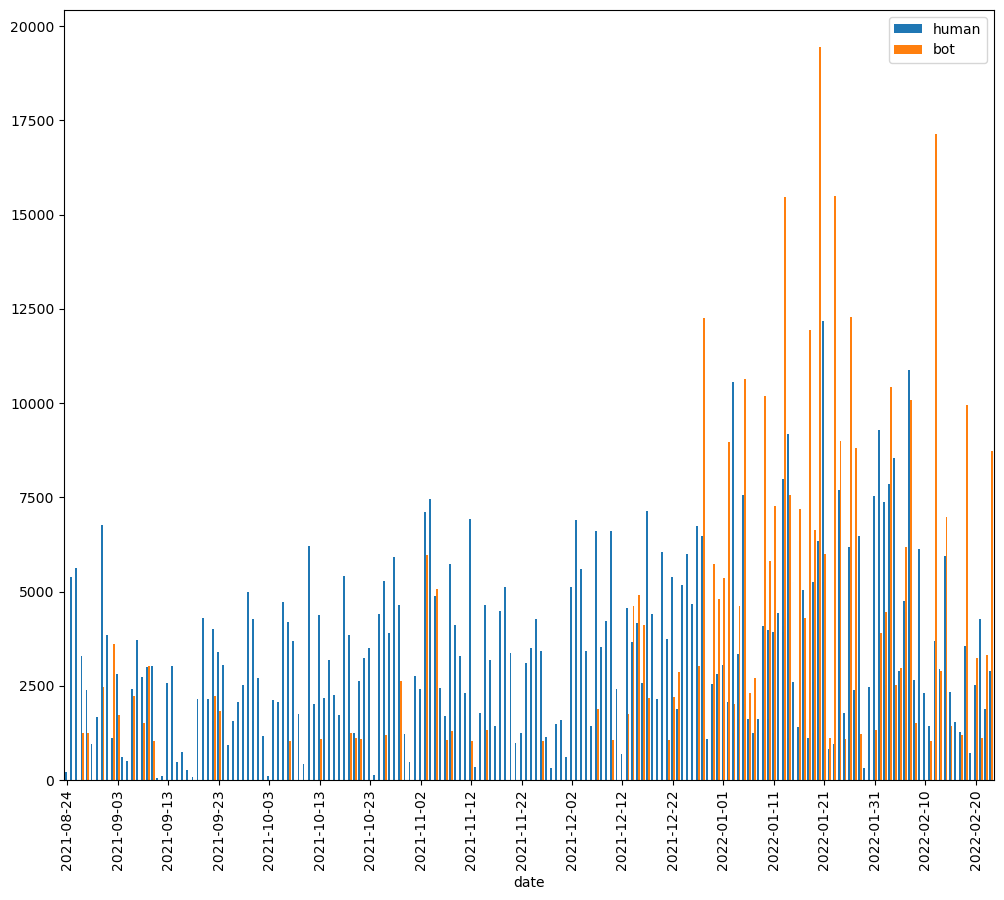

In [18]:
#plotting number of edits by both- human and bot category

x= df3.index
y=df3['changeset']
z=df4['changeset']

df5 = pd.DataFrame({
    'date': x,
    'human': y,
    'bot':z
})
df5 = df5.reset_index(drop=True)

step_size = 10 
ax = df5.plot(x="date", y=["human", "bot"],width=0.75, kind="bar", rot=90,figsize=(12, 10))
x_ticks = ax.get_xticks()
x_tick_labels = ax.get_xticklabels()

# to set x-axis labels based on the step size
ax.set_xticks(x_ticks[::step_size])
ax.set_xticklabels(x_tick_labels[::step_size])

plt.show()

### *Analysis of data for 1 week before the bombing*

In [19]:
#counting number of ediits per day for this week and plotting on bar graph
df6= kharkiv1.loc[(kharkiv1['date']>='2022-02-17') & (kharkiv1['date']<'2022-02-26'),:]
df6=df6.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
df6=df6.groupby(['date']).count()
df6.head(3)

id
date             
2022-02-17   2485
2022-02-18  13519
2022-02-19    708

In [20]:
#statistic measures of edits
df6.describe()

id
count      7.000000
mean    6381.285714
std     4628.821330
min      708.000000
25%     3841.000000
50%     5387.000000
75%     8686.500000
max    13519.000000

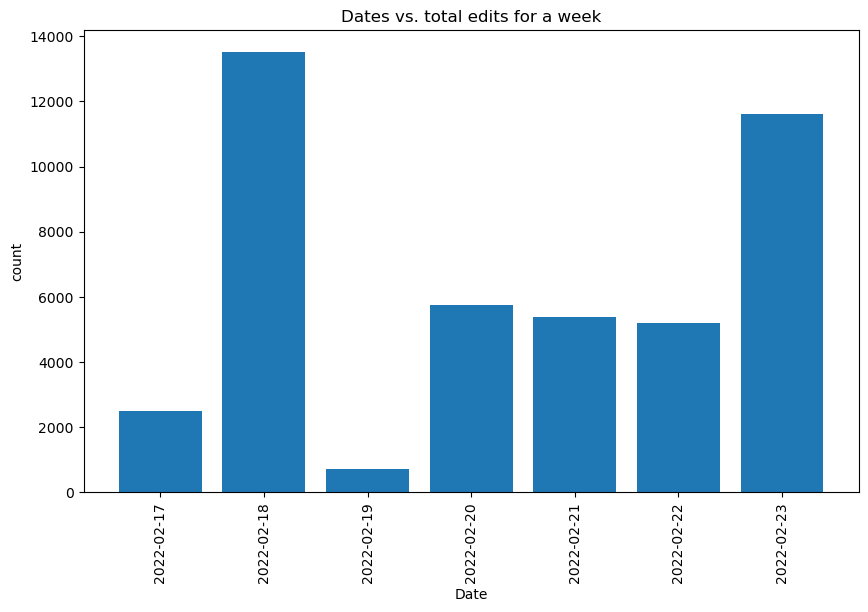

In [21]:
#using bar graph to plot the editing frequency

df6.index = pd.to_datetime(df6.index)
plt.figure(figsize=(10, 6))  
plt.bar(df6.index, df6['id'])
plt.xlabel('Date')
plt.ylabel('count')
plt.title('Dates vs. total edits for a week')
plt.xticks(rotation=90)
plt.show()

### *Analysis of data for the month before the bombing*

In [22]:
#counting number of ediits per day for 1 month and plotting on bar graph
df7= kharkiv1.loc[(kharkiv1['date']>='2022-01-24') & (kharkiv1['date']<'2022-02-24'),:]
df7=df7.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
df7=df7.groupby(['date']).count()
df7.head()

id
date             
2022-01-24  16691
2022-01-25   2860
2022-01-26  18466
2022-01-27  11191
2022-01-28   7716

In [23]:
df7.describe() #statistic measures of edits

id
count     31.000000
mean    8559.451613
std     6115.781982
min      314.000000
25%     3322.000000
50%     6140.000000
75%    12384.500000
max    20955.000000

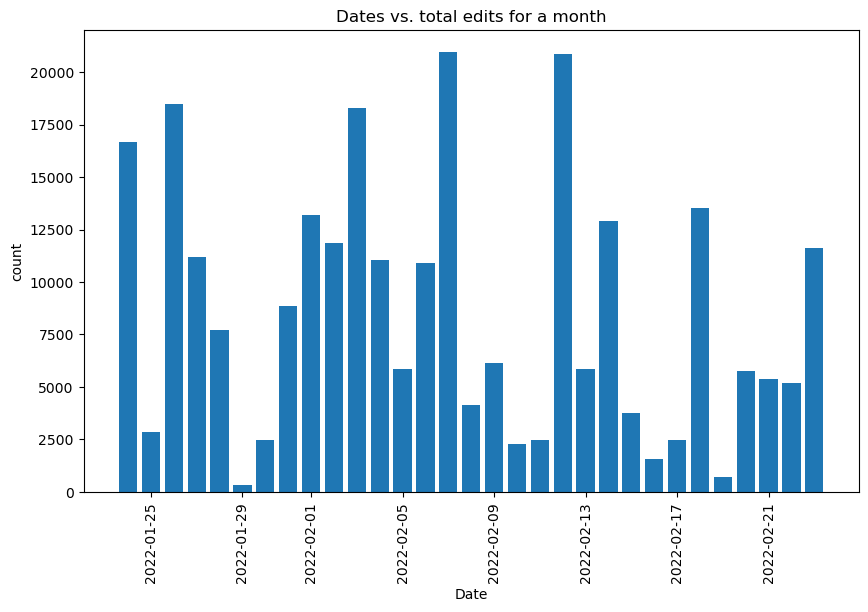

In [24]:
df7.index = pd.to_datetime(df7.index)
plt.figure(figsize=(10, 6))  
plt.bar(df7.index, df7['id'])
plt.xlabel('Date')
plt.ylabel('count')
plt.title('Dates vs. total edits for a month')
plt.xticks(rotation=90)
plt.show()

### *Analysis of data for the 3 months before the bombing*

In [25]:
#counting number of ediits per day for the 3 months before bombing and plotting on bar graph
df8= kharkiv1.loc[(kharkiv1['date']>'2021-11-25') & (kharkiv1['date']<'2022-02-24'),:]
df8=df8.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
df8=df8.groupby(['date']).count()
df8.head()

id
date            
2021-11-26  4480
2021-11-27  1142
2021-11-28   320
2021-11-29  1476
2021-11-30  1587

In [26]:
df8.describe() #statistic measures of edits

id
count     90.000000
mean    7892.633333
std     5848.524534
min      314.000000
25%     3589.750000
50%     6235.000000
75%    11158.000000
max    25797.000000

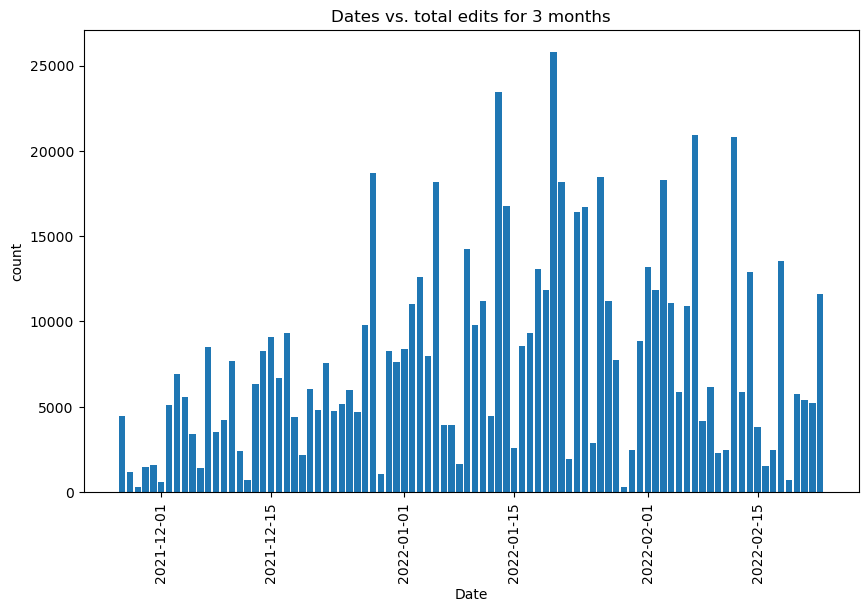

In [27]:
df8.index = pd.to_datetime(df8.index)
plt.figure(figsize=(10, 6))  
plt.bar(df8.index, df8['id'])
plt.xlabel('Date')
plt.ylabel('count')
plt.title('Dates vs. total edits for 3 months')
plt.xticks(rotation=90)
plt.show()

### *Analysis of data for the 6 months before the bombing*

In [28]:
#counting number of ediits per day for the 6 months before bombing and plotting on bar graph

df9=kharkiv1.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
df9=df9.groupby(['date']).count()
df9.describe()

id
count    184.000000
mean    5595.739130
std     4961.992409
min       52.000000
25%     2167.000000
50%     4276.000000
75%     7489.000000
max    25797.000000

In [29]:
#analysing frequency of edits for each month during these 6 months period
dfsep= kharkiv1.loc[(kharkiv1['date']>='2021-08-24') & (kharkiv1['date']<'2021-09-24'),:]
dfsep=dfsep.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dfsep=dfsep.groupby(['date']).count()
dfsep=dfsep.reset_index()

In [30]:
dfoct= kharkiv1.loc[(kharkiv1['date']>='2021-09-24') & (kharkiv1['date']<'2021-10-24'),:]
dfoct=dfoct.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dfoct=dfoct.groupby(['date']).count()
dfoct=dfoct.reset_index()

In [31]:
dfnov= kharkiv1.loc[(kharkiv1['date']>='2021-10-24') & (kharkiv1['date']<'2021-11-24'),:]
dfnov=dfnov.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dfnov=dfnov.groupby(['date']).count()
dfnov=dfnov.reset_index()

In [32]:
dfdec= kharkiv1.loc[(kharkiv1['date']>='2021-11-24') & (kharkiv1['date']<'2021-12-24'),:]
dfdec=dfdec.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dfdec=dfdec.groupby(['date']).count()
dfdec=dfdec.reset_index()

In [33]:
dfjan= kharkiv1.loc[(kharkiv1['date']>='2021-12-24') & (kharkiv1['date']<'2022-01-24'),:]
dfjan=dfjan.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dfjan=dfjan.groupby(['date']).count()
dfjan=dfjan.reset_index()


In [34]:
dffeb= kharkiv1.loc[(kharkiv1['date']>='2022-01-24') & (kharkiv1['date']<'2022-02-24'),:]
dffeb=dffeb.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dffeb=dffeb.groupby(['date']).count()
dffeb=dffeb.reset_index()


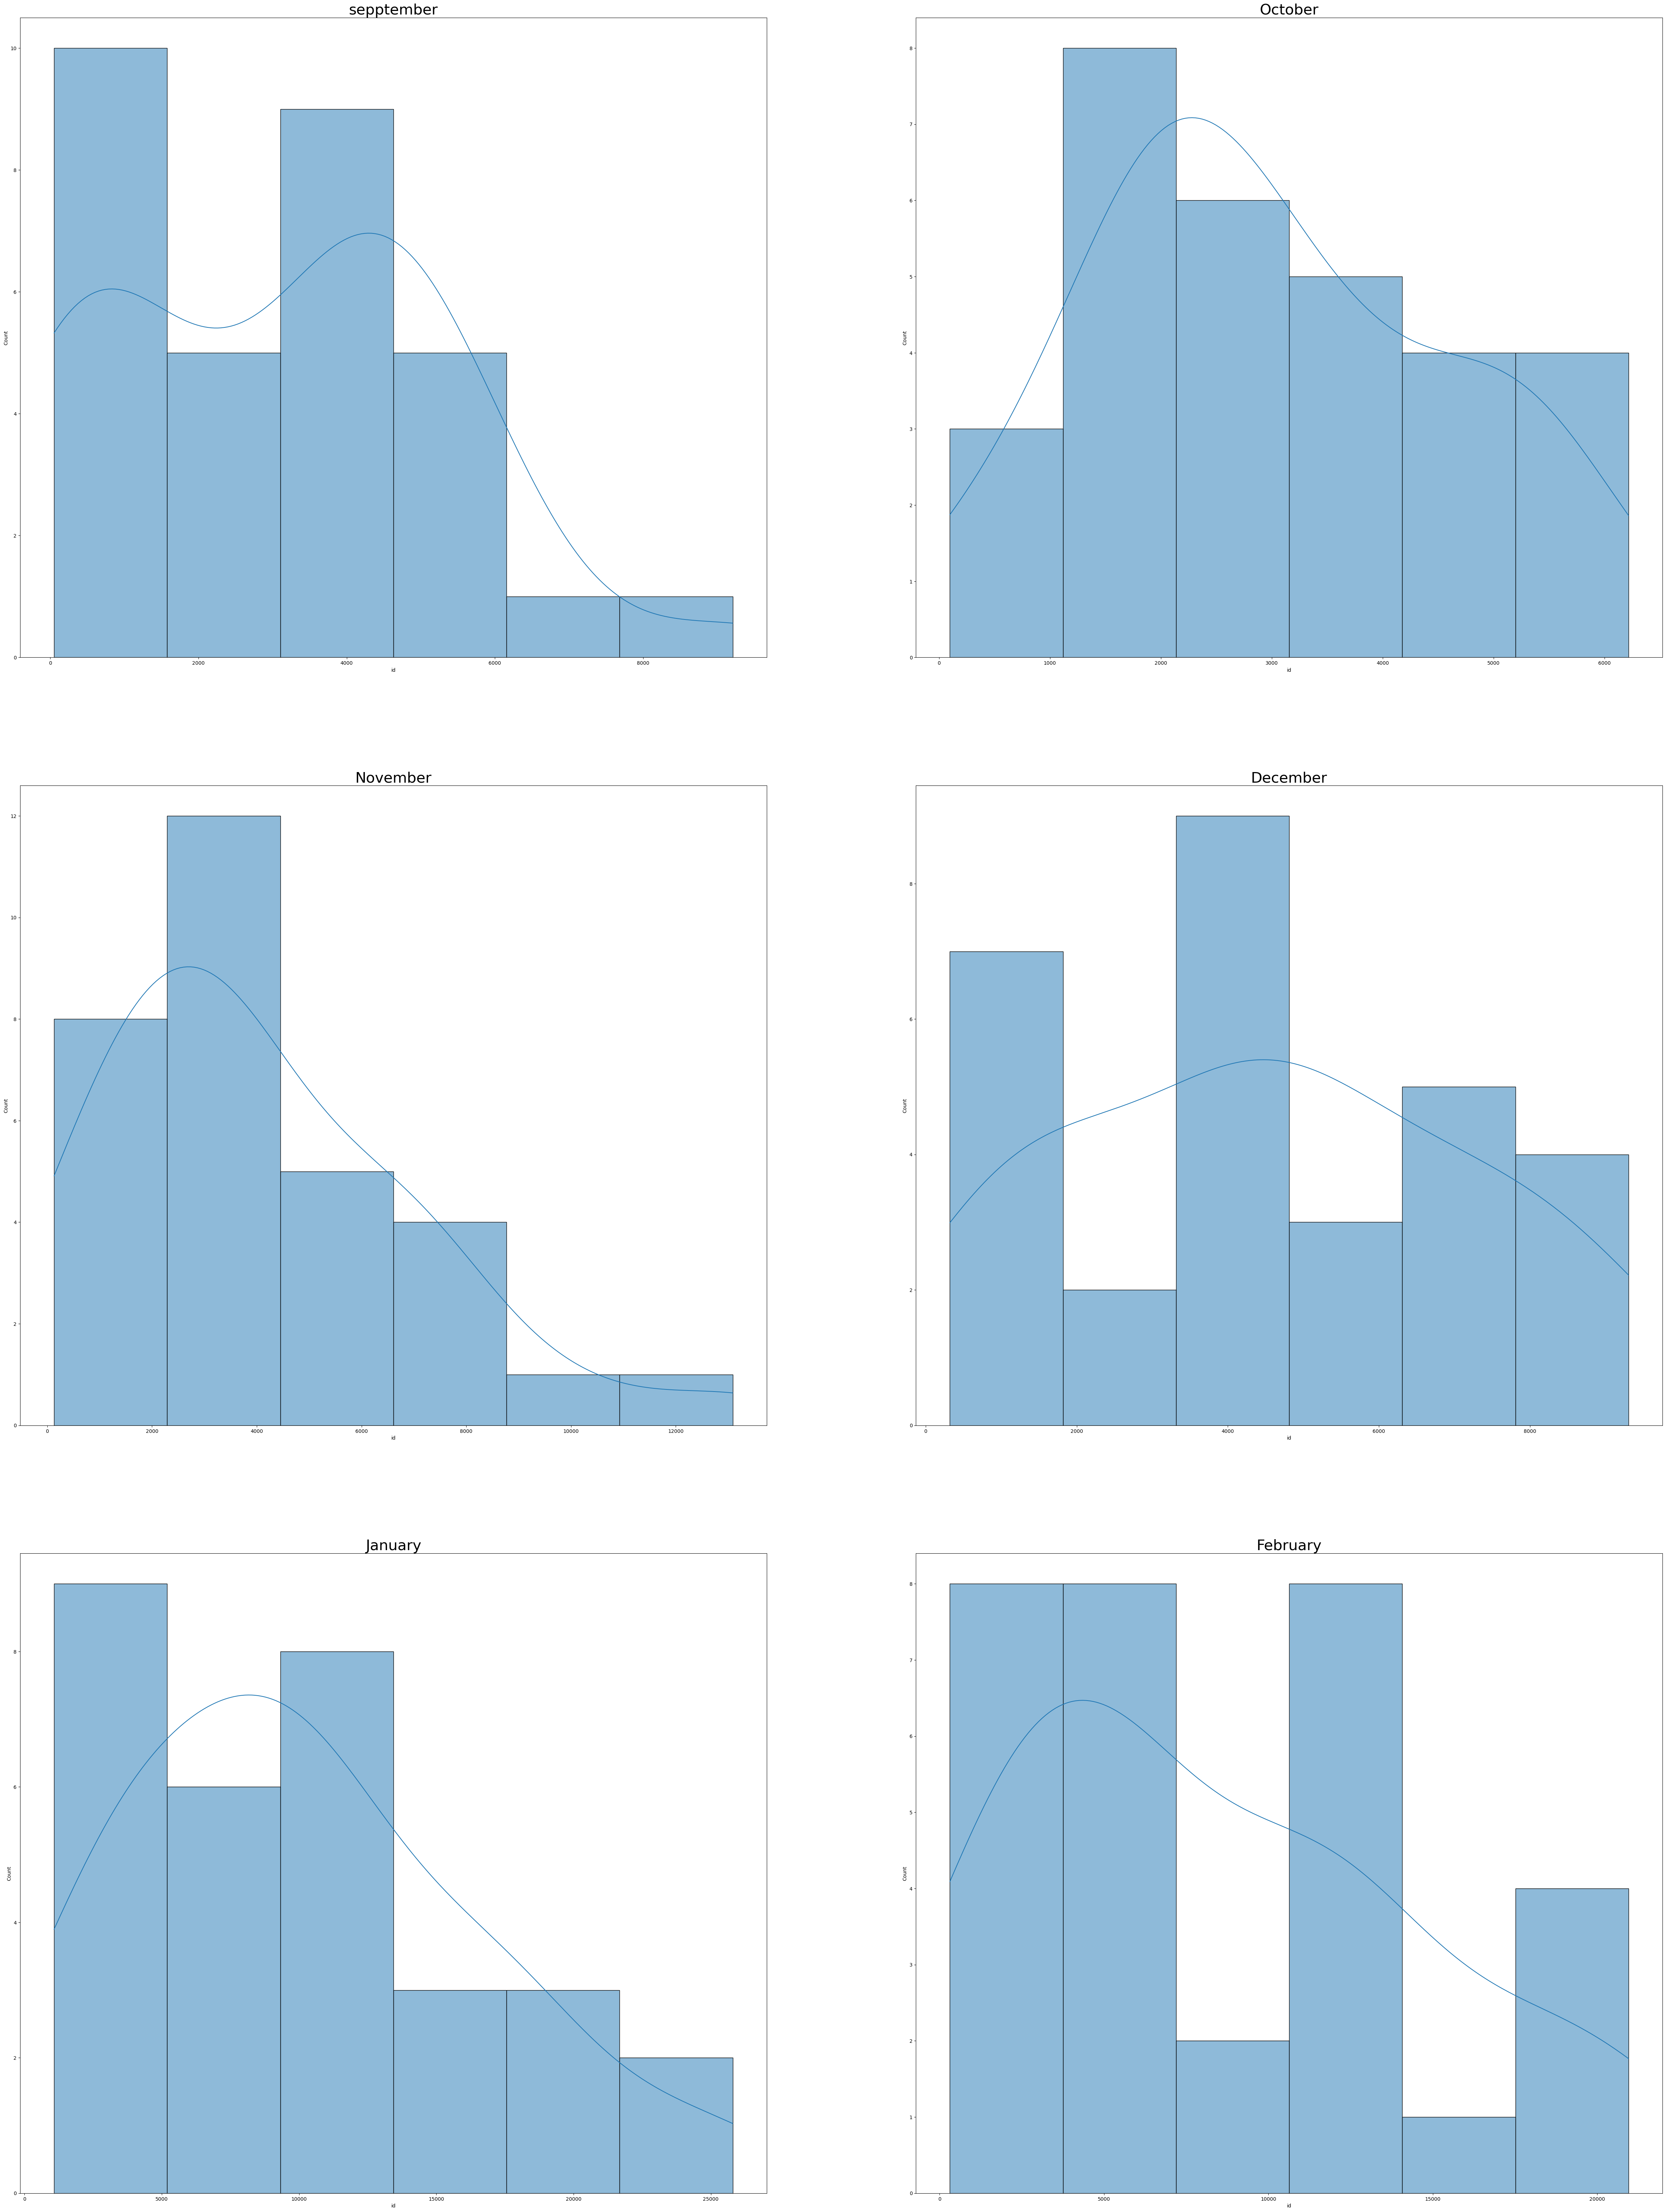

In [35]:
#histogram for frequency distributin 

fig,axes= plt.subplots(3,2,figsize=(60, 80))

axes = axes.flatten()

s=sb.histplot(data=dfsep, x='id',bins='auto',kde=True,ax=axes[0]).set_title('sepptember',fontsize = 30)
s=sb.histplot(data=dfoct, x='id',bins='auto',kde=True,ax=axes[1]).set_title('October',fontsize = 30)
s=sb.histplot(data=dfnov, x='id',bins='auto',kde=True,ax=axes[2]).set_title('November',fontsize = 30)
s=sb.histplot(data=dfdec, x='id',bins='auto',kde=True,ax=axes[3]).set_title('December',fontsize = 30)
s=sb.histplot(data=dfjan, x='id',bins='auto',kde=True,ax=axes[4]).set_title('January',fontsize = 30)
s=sb.histplot(data=dffeb, x='id',bins='auto',kde=True,ax=axes[5]).set_title('February',fontsize = 30)




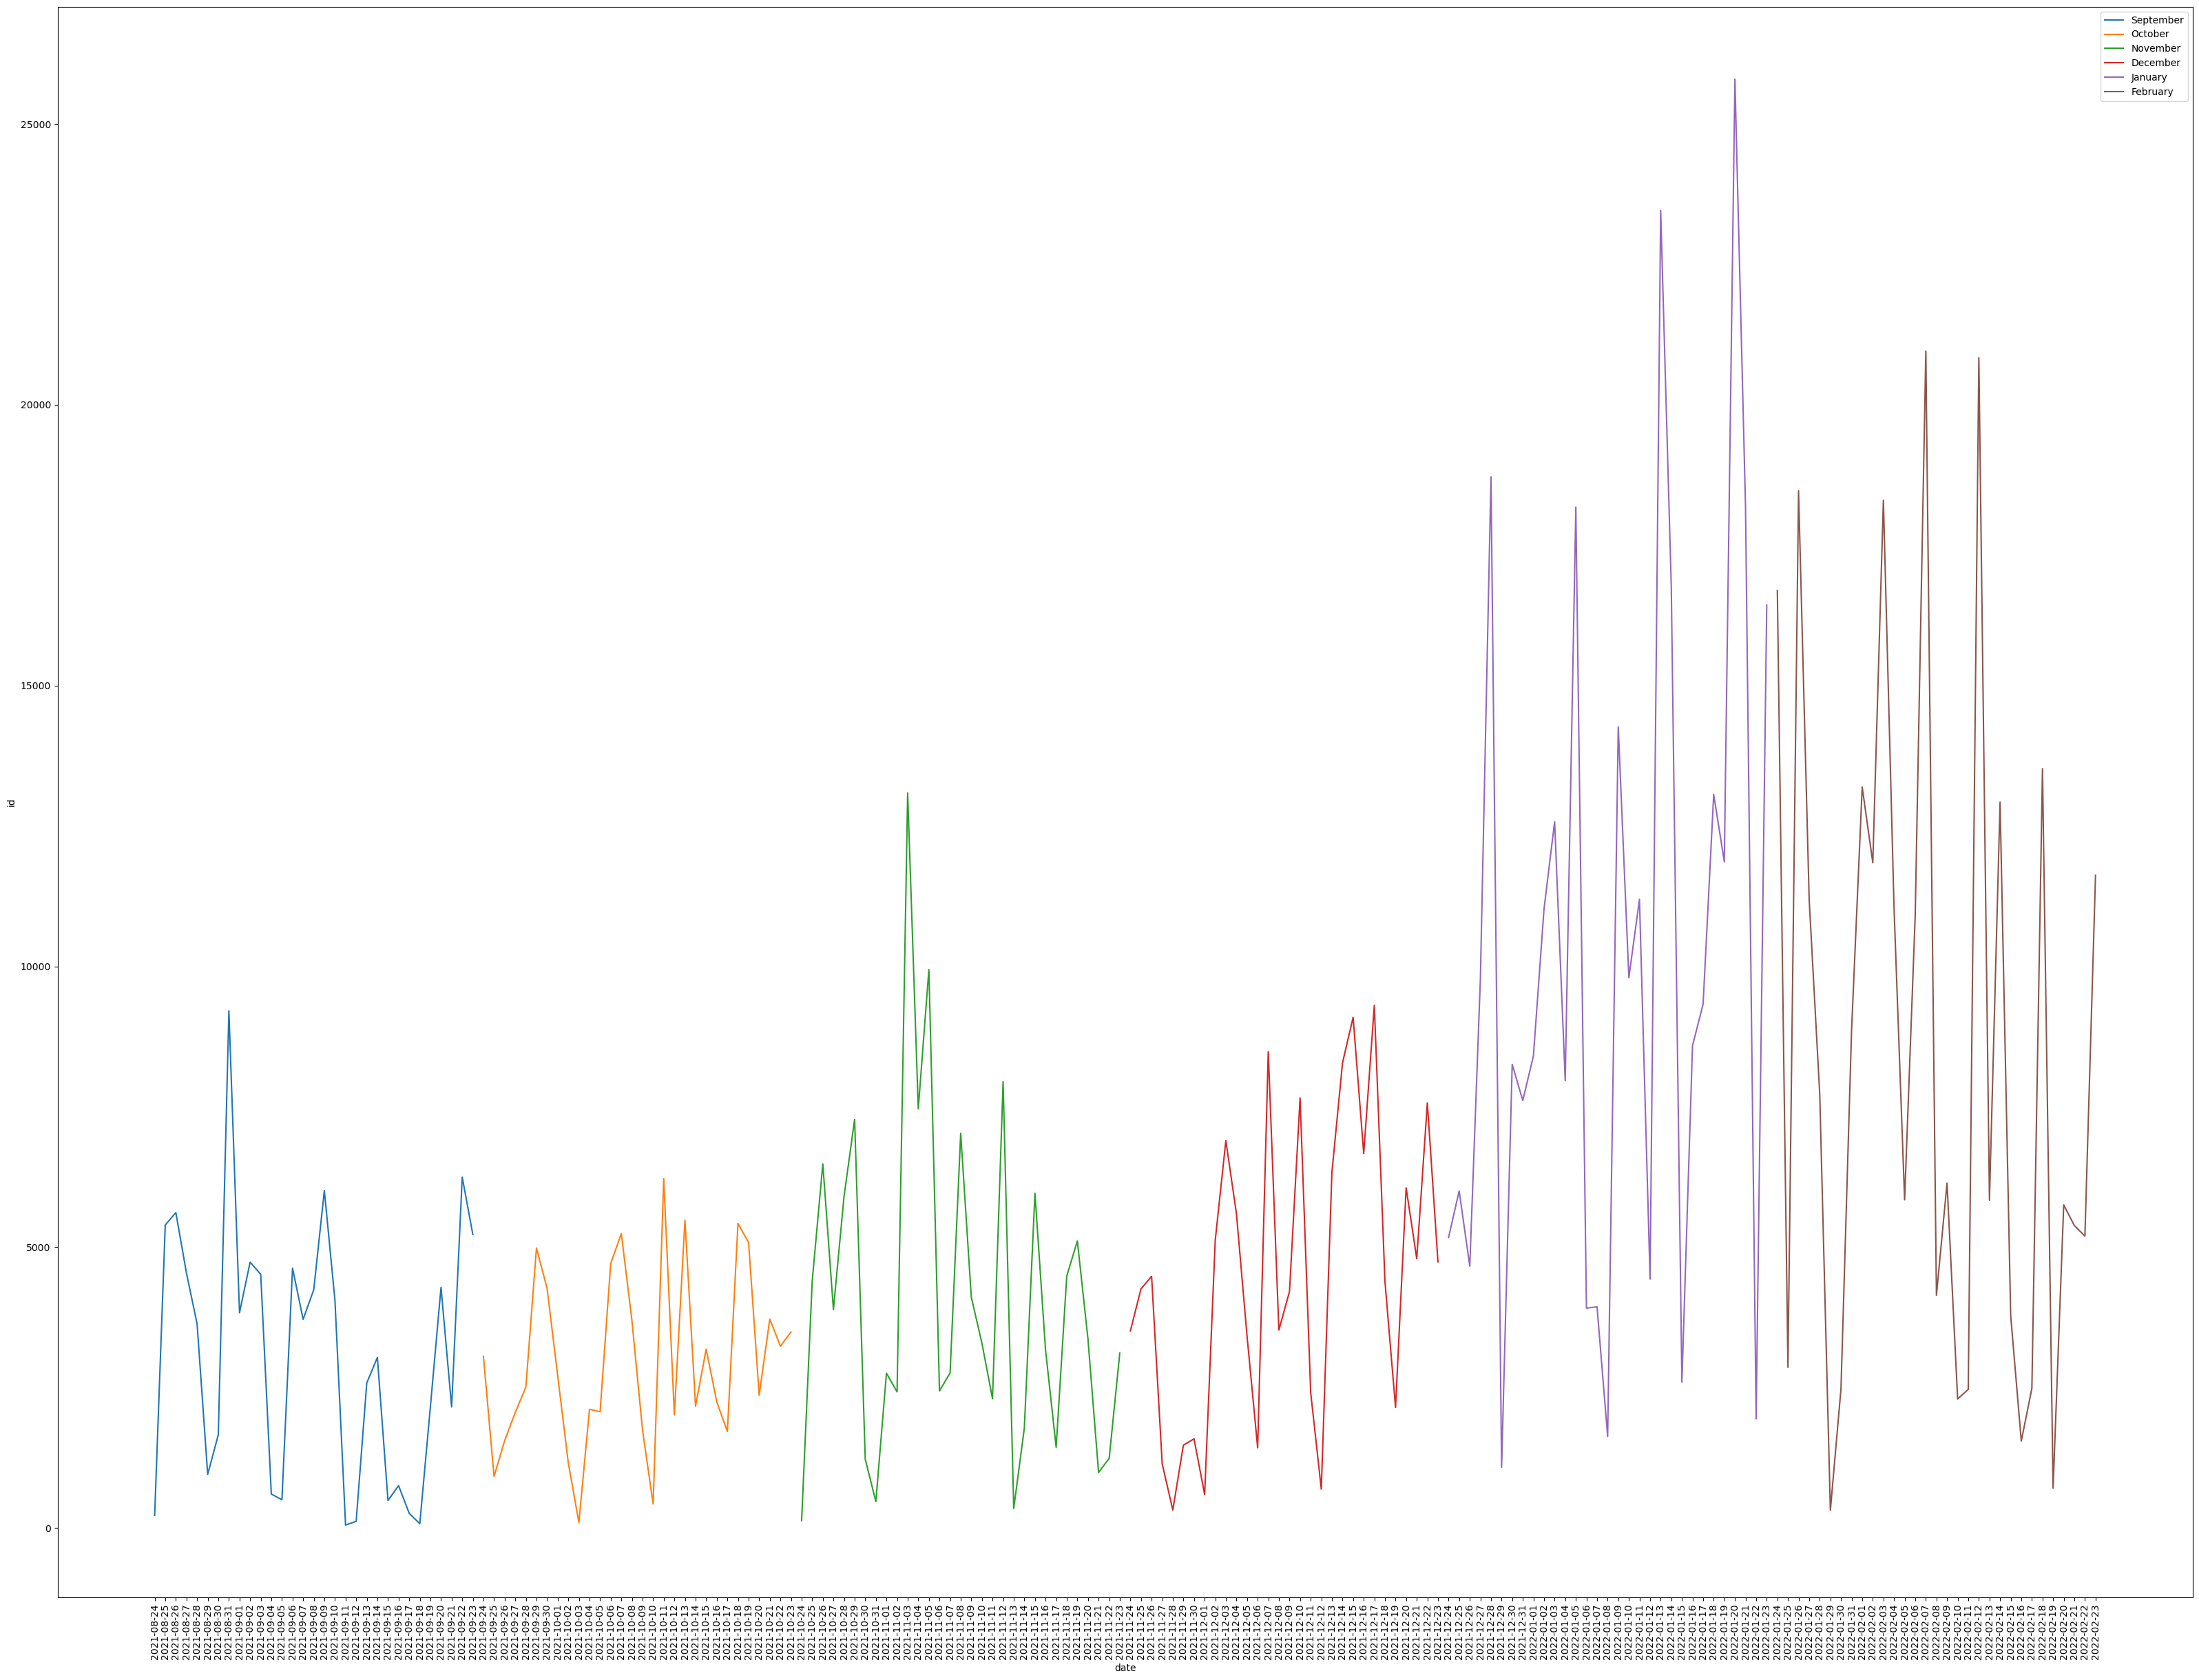

In [36]:
#trend chart to understand the editting pattern during 6 months befire bombing

fig = plt.subplots(figsize=(40, 30))
s=sb.lineplot(x='date', y='id', data=dfsep,label='September')
s=sb.lineplot(x='date', y='id', data=dfoct,label='October')
s=sb.lineplot(x='date', y='id', data=dfnov,label='November')
s=sb.lineplot(x='date', y='id', data=dfdec,label='December')
s=sb.lineplot(x='date', y='id', data=dfjan,label='January')
s=sb.lineplot(x='date', y='id', data=dffeb,label='February')
plt.xticks(rotation=90)

plt.show()

### *Analysing editing frequency at contributor level*

In [37]:
#working on number of changesets and number of edits by each user during the 6 months

#df10=kharkiv1.drop(['deleted','timestamp','uid','version','visibility','tp','extra','date'], axis=1)
df10=kharkiv1.loc[kharkiv1['category']=='human']
df11=kharkiv1.loc[kharkiv1['category']=='bot']

df10=df10.drop(['deleted','timestamp','user','version','visibility','tp','date'], axis=1)
df11=df11.drop(['deleted','timestamp','user','version','visibility','tp','date'], axis=1)


In [38]:
#counting unique changesets added by each user during 6 months

df12=df10.groupby('uid')['changeset'].nunique()
df13=df11.groupby('uid')['changeset'].nunique()

In [39]:
#number of unique changesets posted by each contributors

changesets = df12.reset_index()
changesets

uid  changeset
0        5359          2
1        6389          1
2       15110          1
3       55242          2
4       69607          2
..        ...        ...
349  15071385          1
350  15082261          3
351  15099511          7
352  15130348          1
353  15152601          1

[354 rows x 2 columns]

In [40]:
#counting the changesets added bu software bots during the period
changesets_bot= df13.reset_index()
changesets_bot

uid  changeset
0    914526         77
1   1817244          1
2   2481418          3
3   4085539          1
4   6718443          2
5   7154639          6
6  10857625          1
7  12396472          1
8  12912135          2
9  14727614         82

In [41]:
#the uid suggests that the automated scripts were added by the same users as those listed in 'human' category 
#further analysis wont consider categories seperately
changesets_bot['uid'].isin(changesets_bot['uid'])

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: uid, dtype: bool

In [42]:
#grouping data on user and counting the total contribution made by each user during the whole period
df14=df10.drop(['changeset','category'],axis=1)
id_counts=df14.groupby(['uid']).count()

id_counts=id_counts.reset_index()
id_counts

uid  id
0        5359   2
1        6389   1
2       15110   1
3       55242  37
4       69607   2
..        ...  ..
349  15071385   1
350  15082261   3
351  15099511  20
352  15130348   2
353  15152601   4

[354 rows x 2 columns]

In [43]:
# Grouping users based on total contribution using the values of 25% and 75% values of quantiles 
# inactive mapper: less than 2000 edits 
# casual mapper: 2000 - 6000 edits
# committed mappers : more than 6000 edits [values based on the quartile values of 6 months months]

id_counts['contribution level']=id_counts['id'].apply(lambda x: 'inactive' if x < 2000 else ('casual mapper' if 2000 <= x < 6000 else 'committed'))

#id_counts.reset_index() 
id_counts.head()

uid  id contribution level
0   5359   2           inactive
1   6389   1           inactive
2  15110   1           inactive
3  55242  37           inactive
4  69607   2           inactive

In [44]:
#count of contributors in each category

contribution= id_counts.drop('id', axis=1)

contribution=contribution.groupby('contribution level').count()

print(contribution)

                    uid
contribution level     
casual mapper        12
committed             8
inactive            334


In [45]:
id_counts.head()

uid  id contribution level
0   5359   2           inactive
1   6389   1           inactive
2  15110   1           inactive
3  55242  37           inactive
4  69607   2           inactive

In [46]:
#adding contribution level to the dataframe 


temp=id_counts.drop('id',axis=1)
temp=temp.set_index('uid')


In [47]:

kharkiv1=kharkiv1.merge(temp['contribution level'], on='uid', how='left')
kharkiv1

id  changeset deleted                  timestamp      uid  \
0        9251063105  113772892   false  2021-11-14 17:48:40+00:00   508157   
1        9258391776  113869515   false  2021-11-16 21:01:55+00:00  2769224   
2        9252634106  113794955   false  2021-11-15 08:59:23+00:00   508157   
3        9260631685  113902306   false  2021-11-17 15:06:22+00:00  2769224   
4        9261464845  113913275   false  2021-11-17 19:33:51+00:00  2769224   
...             ...        ...     ...                        ...      ...   
1029611  9228567991  113426476   false  2021-11-05 20:41:16+00:00  2769224   
1029612  9229384217  113436112   false  2021-11-06 07:42:55+00:00  2481418   
1029613  9215835195  113225525   false  2021-11-01 09:21:28+00:00  5294661   
1029614  9216350356  113238379   false  2021-11-01 14:04:25+00:00   373695   
1029615  9218723146  113286186   false  2021-11-02 13:58:58+00:00   914526   

                user  version visibility    tp        date category  \
0        reallystate        1       true  node  2021-11-14    human   
1           old wolf        1       true  node  2021-11-16    human   
2        reallystate        1       true  node  2021-11-15    human   
3           old wolf        1       true  node  2021-11-17    human   
4           old wolf        1       true  node  2021-11-17    human   
...              ...      ...        ...   ...         ...      ...   
1029611     old wolf        1       true  node  2021-11-05    human   
1029612        Mr_67        1       true  node  2021-11-06    human   
1029613     Boroshno        1       true  node  2021-11-01    human   
1029614        algot        1       true  node  2021-11-01    human   
1029615   victhorvik        1       true  node  2021-11-02    human   

        contribution level  
0                committed  
1                committed  
2                committed  
3                committed  
4                committed  
...                    ...  
1029611          committed  
1029612          committed  
1029613           inactive  
1029614          committed  
1029615          committed  

[1029616 rows x 12 columns]

In [48]:
#counting the number of deleted nodes for each user
df_deleted=kharkiv1.loc[:,['uid','deleted']]
df_deleted
df_deleted=df_deleted.groupby(['uid','deleted'])['deleted'].count()
df_del=pd.DataFrame(df_deleted)
df_del= df_del.rename(columns={'deleted': 'deleted nodes'})
df_del=df_del.reset_index()
df_del=df_del.loc[df_del['deleted']=='true']


In [49]:
df_del=df_del.set_index('uid')
df_del

deleted  deleted nodes
uid                            
55242       true              1
71862       true              2
94578       true             11
161619      true            158
177389      true             25
...          ...            ...
14654318    true              3
14727614    true           2009
14798883    true              1
14938674    true              3
14950764    true              3

[139 rows x 2 columns]

###  *Analysis of version history on contributor level*

In [50]:
#anaysing version history on contributor level
kharkiv1=kharkiv1.sort_values(['id', 'version'], ascending=[True,True])
kharkiv1

id  changeset deleted                  timestamp       uid  \
7605      27119263  112796535    true  2021-10-21 15:53:02+01:00    914526   
615161    27119265  112796535   false  2021-10-21 15:53:02+01:00    914526   
142854    27119266  112796535    true  2021-10-21 15:53:02+01:00    914526   
495923    27119267  112796535    true  2021-10-21 15:53:02+01:00    914526   
794352    27119268  112796535   false  2021-10-21 15:53:02+01:00    914526   
...            ...        ...     ...                        ...       ...   
778582  9531164200  117791128   false  2022-02-23 23:26:38+00:00  14727614   
498095  9531164201  117791128   false  2022-02-23 23:26:38+00:00  14727614   
147893  9531164202  117791128   false  2022-02-23 23:26:38+00:00  14727614   
156083  9531164203  117791128   false  2022-02-23 23:26:38+00:00  14727614   
487786  9531164204  117791128   false  2022-02-23 23:26:38+00:00  14727614   

              user  version visibility    tp        date category  \
7605    victhorvik        3      false  node  2021-10-21      bot   
615161  victhorvik        3       true  node  2021-10-21      bot   
142854  victhorvik        3      false  node  2021-10-21      bot   
495923  victhorvik        5      false  node  2021-10-21      bot   
794352  victhorvik        3       true  node  2021-10-21      bot   
...            ...      ...        ...   ...         ...      ...   
778582    Coworker        1       true  node  2022-02-23      bot   
498095    Coworker        1       true  node  2022-02-23      bot   
147893    Coworker        1       true  node  2022-02-23      bot   
156083    Coworker        1       true  node  2022-02-23      bot   
487786    Coworker        1       true  node  2022-02-23      bot   

       contribution level  
7605            committed  
615161          committed  
142854          committed  
495923          committed  
794352          committed  
...                   ...  
778582          committed  
498095          committed  
147893          committed  
156083          committed  
487786          committed  

[1029616 rows x 12 columns]

In [51]:
#Extract the list of editing version for each of the contributors 

version=kharkiv1.groupby('uid')['version'].apply(list)
version_list=pd.DataFrame(version)
version_list.head()

version
uid                                                     
5359                                              [6, 2]
6389                                                [29]
15110                                                [2]
55242  [3, 3, 3, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, ...
69607                                             [2, 2]

In [52]:
# This will count the number of new nodes vs number of edits 
#version=1 is considered new node, rest of the versions as edited nodes

# Function to count the frequency of new nodes(version=1) in a list
def count_ones(lst):
    return lst.count(1)

# Function to count the frequency of edited nodes in a list
def edits(lst):
    count=0
    for i in lst:
        if i != 1:
            count=count+1
    return count

# Apply the functions to the 'version' column
version_list['new nodes'] = version_list['version'].apply(count_ones)
version_list['edited nodes'] = version_list['version'].apply(edits)                                                    
version_list.head(16)
        

version  new nodes  \
uid                                                                    
5359                                               [6, 2]          0   
6389                                                 [29]          0   
15110                                                 [2]          0   
55242   [3, 3, 3, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, ...         27   
69607                                              [2, 2]          0   
71862   [3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...          2   
94578   [15, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2,...          0   
161619  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, ...         50   
177389  [4, 5, 5, 3, 4, 4, 3, 4, 4, 2, 2, 2, 2, 2, 2, ...          0   
193291                                          [7, 8, 7]          0   
200631  [7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...        567   
204049  [3, 2, 2, 7, 7, 5, 4, 2, 2, 2, 3, 2, 2, 4, 2, ...         26   
205774                  [9, 5, 6, 3, 4, 5, 6, 4, 5, 6, 4]          0   
217427  [4, 5, 6, 5, 6, 4, 5, 3, 4, 5, 5, 9, 10, 9, 10...         66   
231017  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...          0   
282389  [7, 8, 9, 10, 3, 4, 5, 3, 4, 5, 4, 2, 4, 4, 3,...          0   

        edited nodes  
uid                   
5359               2  
6389               1  
15110              1  
55242             10  
69607              2  
71862             17  
94578             23  
161619           242  
177389            26  
193291             3  
200631           165  
204049           133  
205774            11  
217427           141  
231017            20  
282389            19

###  *Calculating the total active days for each user*

In [53]:
df_lifespan= kharkiv1.loc[:,['uid','date']]
df_lifespan['date'] = df_lifespan.date.astype('datetime64[ns]')

In [54]:
df_lifespan=df_lifespan.sort_values(['uid','date'],ascending=[True,True])#sorting the database to get the first day of contribution

In [55]:
# grouping on uid and then for each user, retrieving the first and last day of contribution time perdiod
df_lifespan=df_lifespan.groupby('uid')
first_row= df_lifespan.min()
last_row=df_lifespan.max()
#print('first_row')
timeframe1=pd.DataFrame(first_row).reset_index()
timeframe2=pd.DataFrame(last_row).reset_index()

In [56]:
# first day when the conributor made an activty
timeframe1.head(10)

uid       date
0    5359 2021-12-14
1    6389 2022-02-22
2   15110 2022-02-13
3   55242 2021-10-04
4   69607 2021-11-07
5   71862 2022-01-30
6   94578 2021-10-24
7  161619 2021-09-14
8  177389 2021-11-04
9  193291 2021-09-21

In [57]:
timeframe2.head(10) # last day when the conributor made an activty

uid       date
0    5359 2022-02-03
1    6389 2022-02-22
2   15110 2022-02-13
3   55242 2021-10-04
4   69607 2021-11-07
5   71862 2022-02-10
6   94578 2021-12-02
7  161619 2022-01-25
8  177389 2022-01-21
9  193291 2021-09-22

In [58]:
#calculating the difference between two dats

result=(timeframe2['date']-timeframe1['date'])
day=pd.to_timedelta(1, unit='d')
timeframe1['active days']=result+day
timeframe1=timeframe1.drop(['date'],axis=1)
timeframe1.head(6)

uid active days
0   5359     52 days
1   6389      1 days
2  15110      1 days
3  55242      1 days
4  69607      1 days
5  71862     12 days

## *Importing and analysing tag data for the 6 months period*

In [59]:
#to fetch the tags data for all the nodes fetched in previous query for 6 months

query2 = "SELECT * FROM node_tags WHERE id IN (SELECT id FROM user_info WHERE id IN (SELECT id FROM node_locations WHERE latitude BETWEEN 48.531178 AND 50.4594753 AND longitude BETWEEN 34.8563132 AND 38.093529) AND timestamp <TO_DATE('2022-02-24','yyyy-mm-dd') AND timestamp >TO_DATE('2021-08-24','yyyy-mm-dd'));"

In [60]:
kharkiv2 = pd.read_sql(query2, con=engine)

In [61]:
pd.set_option('max_colwidth', None)
kharkiv2

id                    tags
0          27119722  {'created_by': 'JOSM'}
1          27119722                      {}
2          27119722                      {}
3          27119722                      {}
4          27121211  {'created_by': 'JOSM'}
...             ...                     ...
1379249  6436866405                      {}
1379250  6450809396                      {}
1379251  6450809396                      {}
1379252  6452918324                      {}
1379253  6452918324                      {}

[1379254 rows x 2 columns]

In [62]:
#count of empty tags

df15=kharkiv2[kharkiv2['tags']=='{}'].count()
df15

id      1332345
tags    1332345
dtype: int64

In [63]:
#only taking the records having non-null values in tags

df15=kharkiv2[kharkiv2['tags']!='{}']

df15

id                                           tags
0          27119722                         {'created_by': 'JOSM'}
4          27121211                         {'created_by': 'JOSM'}
7         252173844                         {'created_by': 'JOSM'}
12        256361080                 {'highway': 'traffic_signals'}
13        256361080                 {'highway': 'traffic_signals'}
...             ...                                            ...
1379191  6415815302  {'crossing': 'marked', 'highway': 'crossing'}
1379236  6422507546                        {'railway': 'crossing'}
1379237  6422507546                   {'railway': 'tram_crossing'}
1379238  6422507561                        {'railway': 'crossing'}
1379239  6422507561                   {'railway': 'tram_crossing'}

[46909 rows x 2 columns]

In [64]:
# append the tags column to previous dataframe having user details 
pd.set_option('max_colwidth', 30)
df16=df15.merge(kharkiv1, on='id', how='left')
df16

id                           tags  changeset deleted  \
0        27119722         {'created_by': 'JOSM'}  117418702   false   
1        27121211         {'created_by': 'JOSM'}  110916114    true   
2       252173844         {'created_by': 'JOSM'}  113126874   false   
3       256361080  {'highway': 'traffic_signa...  116035112   false   
4       256361080  {'highway': 'traffic_signa...  116157376   false   
...           ...                            ...        ...     ...   
66929  6415815302  {'crossing': 'marked', 'hi...  113026119   false   
66930  6422507546        {'railway': 'crossing'}  114049987   false   
66931  6422507546   {'railway': 'tram_crossing'}  114049987   false   
66932  6422507561        {'railway': 'crossing'}  114030418   false   
66933  6422507561   {'railway': 'tram_crossing'}  114030418   false   

                       timestamp       uid         user  version visibility  \
0      2022-02-15 05:22:54+00:00   8487368      Mazda05        4       true   
1      2021-09-08 13:08:51+01:00    914526   victhorvik        3      false   
2      2021-10-29 15:15:03+01:00   2481418        Mr_67        3       true   
3      2022-01-11 18:07:50+00:00    508157  reallystate       12       true   
4      2022-01-14 17:45:26+00:00    508157  reallystate       13       true   
...                          ...       ...          ...      ...        ...   
66929  2021-10-27 09:43:55+01:00  11484981     Nikon_ww        2       true   
66930  2021-11-21 09:11:55+00:00    508157  reallystate        2       true   
66931  2021-11-21 09:11:55+00:00    508157  reallystate        2       true   
66932  2021-11-20 15:06:28+00:00    508157  reallystate        2       true   
66933  2021-11-20 15:06:28+00:00    508157  reallystate        2       true   

         tp        date category contribution level  
0      node  2022-02-15    human           inactive  
1      node  2021-09-08    human          committed  
2      node  2021-10-29    human          committed  
3      node  2022-01-11    human          committed  
4      node  2022-01-14    human          committed  
...     ...         ...      ...                ...  
66929  node  2021-10-27    human           inactive  
66930  node  2021-11-21    human          committed  
66931  node  2021-11-21    human          committed  
66932  node  2021-11-20    human          committed  
66933  node  2021-11-20    human          committed  

[66934 rows x 13 columns]

In [65]:
# convrting tags from dictionary format into table format where each column is a unique key and stores its value

from ast import literal_eval
df16['tags'] = df16['tags'].apply(literal_eval)
extracted_data=[]

for index, row in df16.iterrows():
    tag_dict = row['tags']
    extracted_row = {"id": row['id']}  # Add the 'id' column
    extracted_row.update(tag_dict)  # Add the rest of the dictionary data
    extracted_data.append(extracted_row)


# Create a new DataFrame from the extracted data
pd.set_option('display.max_columns', None)

webhook_data = {'created_by': 'JOSM'}

def parse_webhook(webhook_data):
    data = ast.literal_eval(str(webhook_data))
    return data
df17 = pd.DataFrame(extracted_data)


In [66]:
id_to_value1 = df16.set_index('id')['uid'].to_dict()
df17['uid'] = df17['id'].map(id_to_value1) #adding uid column to the dataframe
df17.head()

id created_by          highway addr:postcode attribution koatuu  \
0   27119722       JOSM              NaN           NaN         NaN    NaN   
1   27121211       JOSM              NaN           NaN         NaN    NaN   
2  252173844       JOSM              NaN           NaN         NaN    NaN   
3  256361080        NaN  traffic_signals           NaN         NaN    NaN   
4  256361080        NaN  traffic_signals           NaN         NaN    NaN   

  name name:en name:ru name:uk place population wikipedia wikipedia:ru is_in  \
0  NaN     NaN     NaN     NaN   NaN        NaN       NaN          NaN   NaN   
1  NaN     NaN     NaN     NaN   NaN        NaN       NaN          NaN   NaN   
2  NaN     NaN     NaN     NaN   NaN        NaN       NaN          NaN   NaN   
3  NaN     NaN     NaN     NaN   NaN        NaN       NaN          NaN   NaN   
4  NaN     NaN     NaN     NaN   NaN        NaN       NaN          NaN   NaN   

  name:prefix wikidata postal_code katotth name:fr name:de name:ko  \
0         NaN      NaN         NaN     NaN     NaN     NaN     NaN   
1         NaN      NaN         NaN     NaN     NaN     NaN     NaN   
2         NaN      NaN         NaN     NaN     NaN     NaN     NaN   
3         NaN      NaN         NaN     NaN     NaN     NaN     NaN   
4         NaN      NaN         NaN     NaN     NaN     NaN     NaN   

  addr:housenumber addr:street amenity email official_name opening_hours  \
0              NaN         NaN     NaN   NaN           NaN           NaN   
1              NaN         NaN     NaN   NaN           NaN           NaN   
2              NaN         NaN     NaN   NaN           NaN           NaN   
3              NaN         NaN     NaN   NaN           NaN           NaN   
4              NaN         NaN     NaN   NaN           NaN           NaN   

  outreach phone social_facility social_facility:for railway traffic_signals  \
0      NaN   NaN             NaN                 NaN     NaN             NaN   
1      NaN   NaN             NaN                 NaN     NaN             NaN   
2      NaN   NaN             NaN                 NaN     NaN             NaN   
3      NaN   NaN             NaN                 NaN     NaN             NaN   
4      NaN   NaN             NaN                 NaN     NaN             NaN   

  brand brand:wikidata brand:wikipedia website brand:en brand:uk  \
0   NaN            NaN             NaN     NaN      NaN      NaN   
1   NaN            NaN             NaN     NaN      NaN      NaN   
2   NaN            NaN             NaN     NaN      NaN      NaN   
3   NaN            NaN             NaN     NaN      NaN      NaN   
4   NaN            NaN             NaN     NaN      NaN      NaN   

  contact:email contact:facebook contact:instagram contact:twitter  \
0           NaN              NaN               NaN             NaN   
1           NaN              NaN               NaN             NaN   
2           NaN              NaN               NaN             NaN   
3           NaN              NaN               NaN             NaN   
4           NaN              NaN               NaN             NaN   

  contact:website contact:youtube operator:uk crossing crossing:island  \
0             NaN             NaN         NaN      NaN             NaN   
1             NaN             NaN         NaN      NaN             NaN   
2             NaN             NaN         NaN      NaN             NaN   
3             NaN             NaN         NaN      NaN             NaN   
4             NaN             NaN         NaN      NaN             NaN   

  barrier aeroway power material contact:phone operator brand:ru  \
0     NaN     NaN   NaN      NaN           NaN      NaN      NaN   
1     NaN     NaN   NaN      NaN           NaN      NaN      NaN   
2     NaN     NaN   NaN      NaN           NaN      NaN      NaN   
3     NaN     NaN   NaN      NaN           NaN      NaN      NaN   
4     NaN     NaN   NaN      NaN           NaN      NaN      NaN   

  operator:wikidata ope

In [67]:
df17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66934 entries, 0 to 66933
Columns: 593 entries, id to uid
dtypes: int64(2), object(591)
memory usage: 302.8+ MB


In [68]:
#counting total counts of each tags

non_null_counts = df17.count()
counts=pd.DataFrame(non_null_counts)
counts= counts.reset_index()
counts.columns = ["tags", "total counts"]
counts=counts.sort_values(['total counts'], ascending=False)
counts.head(7)

tags  total counts
0         id         66934
592      uid         66934
6       name         43728
8    name:ru         31738
7    name:en         28152
9    name:uk         27826
10     place         25267

In [69]:
#selecting the value of tags for further analysis, only tags having more than 5000 entries are considered

df18= counts.loc[counts['total counts']>5000]
df18

tags  total counts
0                 id         66934
592              uid         66934
6               name         43728
8            name:ru         31738
7            name:en         28152
9            name:uk         27826
10             place         25267
5             koatuu         22046
12         wikipedia         20840
11        population         20659
13      wikipedia:ru         18060
15       name:prefix         16476
3      addr:postcode         15651
24           amenity         13659
16          wikidata         11569
2            highway          9128
54          operator          8958
27     opening_hours          8772
4        attribution          6219
34             brand          6102
17       postal_code          6101
35    brand:wikidata          5815
36   brand:wikipedia          5797
32           railway          5428

<Axes: xlabel='total counts', ylabel='Count'>

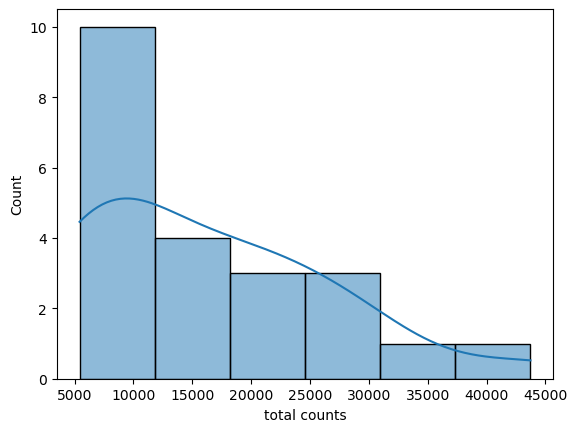

In [70]:
#frequency distribution of tag counts

df_plot=df18.loc[(df18['tags']!='id') & (df18['tags']!='uid'),:]
sb.histplot(data=df_plot, x='total counts',bins='auto',kde=True)

In [71]:
#list of tags for further analysis

column_keep=df18["tags"].tolist()
column_keep


['id',
 'uid',
 'name',
 'name:ru',
 'name:en',
 'name:uk',
 'place',
 'koatuu',
 'wikipedia',
 'population',
 'wikipedia:ru',
 'name:prefix',
 'addr:postcode',
 'amenity',
 'wikidata',
 'highway',
 'operator',
 'opening_hours',
 'attribution',
 'brand',
 'postal_code',
 'brand:wikidata',
 'brand:wikipedia',
 'railway']

In [72]:
df19=df17.loc[:,column_keep]
df19.head()

id      uid name name:ru name:en name:uk place koatuu wikipedia  \
0   27119722  8487368  NaN     NaN     NaN     NaN   NaN    NaN       NaN   
1   27121211   914526  NaN     NaN     NaN     NaN   NaN    NaN       NaN   
2  252173844  2481418  NaN     NaN     NaN     NaN   NaN    NaN       NaN   
3  256361080   508157  NaN     NaN     NaN     NaN   NaN    NaN       NaN   
4  256361080   508157  NaN     NaN     NaN     NaN   NaN    NaN       NaN   

  population wikipedia:ru name:prefix addr:postcode amenity wikidata  \
0        NaN          NaN         NaN           NaN     NaN      NaN   
1        NaN          NaN         NaN           NaN     NaN      NaN   
2        NaN          NaN         NaN           NaN     NaN      NaN   
3        NaN          NaN         NaN           NaN     NaN      NaN   
4        NaN          NaN         NaN           NaN     NaN      NaN   

           highway operator opening_hours attribution brand postal_code  \
0              NaN      NaN           NaN         NaN   NaN         NaN   
1              NaN      NaN           NaN         NaN   NaN         NaN   
2              NaN      NaN           NaN         NaN   NaN         NaN   
3  traffic_signals      NaN           NaN         NaN   NaN         NaN   
4  traffic_signals      NaN           NaN         NaN   NaN         NaN   

  brand:wikidata brand:wikipedia railway  
0            NaN             NaN     NaN  
1            NaN             NaN     NaN  
2            NaN             NaN     NaN  
3            NaN             NaN     NaN  
4            NaN             NaN     NaN

In [73]:
#calculating the frequency of unique values under each tags column

remove=['id','uid']

result_dict1 = {}
for column_name in df19.columns:
    if column_name not in remove:
        unique_value_counts = df19[column_name].value_counts()
        result_dict1[column_name] = unique_value_counts

sorted(result_dict1.items())

[('addr:postcode',
  61108              101
  61000               99
  84010               82
  63120               80
  85018               72
                    ... 
  61027                1
  52030 â€” 52034      1
  61202                1
  51220 - 51222        1
  42833                1
  Name: addr:postcode, Length: 1068, dtype: int64),
 ('amenity',
  post_office        5144
  atm                3427
  bank               1882
  pharmacy           1039
  fuel                234
                     ... 
  школа                 1
  ranger_station        1
  music_school          1
  language_school       1
                        1
  Name: amenity, Length: 72, dtype: int64),
 ('attribution',
  travelgps.com.ua    6219
  Name: attribution, dtype: int64),
 ('brand',
  Нова Пошта     2227
  Ощадбанк       1129
  ПриватБанк     1064
  Альфа-Банк      310
  Укрпошта        297
                 ... 
  Fornetti          1
  ‎Citroën          1
  Золотий вік       1
  ВТБ               1


In [74]:
#displayong the list of unique tags stored by each contributor 

uid_column_name = 'uid'
grouped = df19.groupby(uid_column_name)

# Initialize an empty dictionary to store the results
result_dict2 = {}

# Iterate over each column (excluding the 'uid' column)
for column_name in df19.columns:
    if column_name != uid_column_name:
        # Apply the unique() function to the current column within each group
        unique_values = grouped[column_name].unique().apply(list)
        
        # Store the unique values in the result_dict with the column_name as the key
        result_dict2[column_name] = unique_values

In [75]:
#storing dictionary into table 
uniquetags=pd.DataFrame.from_dict(result_dict2)
uniquetags=uniquetags.drop(['id'],axis=1)
uniquetags.head()

name                 name:ru  \
uid                                                            
5359                     [Скарбниця]                   [nan]   
6389   [Ð¡Ð»Ð¾Ð²â€™ÑÐ½ÑÑŒÐº, Ð¡...      [Ð¡Ð»Ð°Ð²ÑÐ½ÑÐº]   
15110                    [Скарбниця]                   [nan]   
69607                          [nan]                   [nan]   
71862                  [Бургер, nan]  [nan, Братская могила]   

                             name:en                       name:uk   place  \
uid                                                                          
5359                           [nan]                         [nan]   [nan]   
6389   [Sloviansk, nan, Slov'ians...  [Ð¡Ð»Ð¾Ð²â€™ÑÐ½ÑÑŒÐº, nan]  [city]   
15110                          [nan]                         [nan]   [nan]   
69607                          [nan]                         [nan]   [nan]   
71862                          [nan]                         [nan]   [nan]   

             koatuu                      wikipedia  \
uid                                                  
5359          [nan]                          [nan]   
6389   [1414100000]  [uk:Ð¡Ð»Ð¾Ð²'ÑÐ½ÑÑŒÐº, nan]   
15110         [nan]                          [nan]   
69607         [nan]                          [nan]   
71862         [nan]                          [nan]   

                          population             wikipedia:ru  \
uid                                                             
5359                           [nan]                    [nan]   
6389   [138552, nan, 117100, 114437]  [Ð¡Ð»Ð°Ð²ÑÐ½ÑÐº, nan]   
15110                          [nan]                    [nan]   
69607                          [nan]                    [nan]   
71862                          [nan]                    [nan]   

             name:prefix       addr:postcode           amenity       wikidata  \
uid                                                                             
5359               [nan]               [nan]             [nan]          [nan]   
6389   [nan, Ð¼Ñ–ÑÑ‚Ð¾]  [84100-84129, nan]             [nan]  [nan, Q33581]   
15110              [nan]               [nan]             [nan]          [nan]   
69607              [nan]               [nan]             [nan]          [nan]   
71862              [nan]               [nan]  [nan, fast_food]          [nan]   

      highway operator              opening_hours         attribution  brand  \
uid                                                                            
5359    [nan]    [nan]  [Mo-Su 00:00-24:00, 24/7]               [nan]  [nan]   
6389    [nan]    [nan]                      [nan]  [travelgps.com.ua]  [nan]   
15110   [nan]    [nan]        [Mo-Su 08:00-21:00]               [nan]  [nan]   
69607   [nan]    [nan]                      [nan]               [nan]  [nan]   
71862   [nan]    [nan]                      [nan]               [nan]  [nan]   

              postal_code brand:wikidata brand:wikipedia railway  
uid                                                               
5359                [nan]          [nan]           [nan]   [nan]  
6389   [nan, 84100-84129]          [nan]           [nan]   [nan]  
15110               [nan]          [nan]           [nan]   [nan]  
69607               [nan]          [nan]           [nan]   [nan]  
71862               [nan]          [nan]           [nan]   [nan]

In [76]:
#count unique values for each of these tags that are added by contributors 
uid_column_name = 'uid'
result_dict = {}

# Iterate over each column (excluding the 'uid' column)
for column_name in df19.columns:
    if column_name != uid_column_name:
        # Get the unique values for the current column within each group
        unique_values = grouped[column_name].unique()
        
        #  count the total number of unique values
        total_unique_count = len(set([item for sublist in unique_values for item in sublist]))
        
        # Store the total unique count in the result_dict with the column_name as the key
        result_dict[column_name] = total_unique_count

In [77]:
result_dict

{'id': 15711,
 'name': 4306,
 'name:ru': 3137,
 'name:en': 2330,
 'name:uk': 2289,
 'place': 13,
 'koatuu': 2460,
 'wikipedia': 3409,
 'population': 1022,
 'wikipedia:ru': 3657,
 'name:prefix': 9,
 'addr:postcode': 1069,
 'amenity': 73,
 'wikidata': 2481,
 'highway': 22,
 'operator': 399,
 'opening_hours': 434,
 'attribution': 2,
 'brand': 101,
 'postal_code': 976,
 'brand:wikidata': 66,
 'brand:wikipedia': 77,
 'railway': 16}

In [78]:
# countinng the frequency of each tags added by each of the contributors 
#this will be further used to create contributor-base
grouped = df19.groupby(uid_column_name)

# Initialize an empty dictionary to store the results
result_dict3 = {}

# Iterate over each column (excluding the 'uid' column)
for column_name in df19.columns:
    if column_name != uid_column_name:
        # Apply the unique() function to the current column within each group
        unique_values = grouped[column_name].nunique()
        
        # Store the unique values in the result_dict with the column_name as the key
        result_dict3[column_name] = unique_values

In [79]:
#converting the resulting dictionary into dataframe

contributor_base=pd.DataFrame.from_dict(result_dict3)
contributor_base.reset_index()
contributor_base=contributor_base.drop(['id'],axis=1)
contributor_base

name  name:ru  name:en  name:uk  place  koatuu  wikipedia  \
uid                                                                   
5359         1        0        0        0      0       0          0   
6389         3        1        3        1      1       1          1   
15110        1        0        0        0      0       0          0   
69607        0        0        0        0      0       0          0   
71862        1        1        0        0      0       0          0   
...        ...      ...      ...      ...    ...     ...        ...   
14881636     1        0        0        0      0       0          0   
14950764     0        0        0        0      0       0          0   
15000002     1        1        0        0      0       0          0   
15071385     2        1        0        1      0       0          0   
15082261     1        2        1        0      0       0          0   

          population  wikipedia:ru  name:prefix  addr:postcode  amenity  \
uid                                                                       
5359               0             0            0              0        0   
6389               3             1            1              1        0   
15110              0             0            0              0        0   
69607              0             0            0              0        0   
71862              0             0            0              0        1   
...              ...           ...          ...            ...      ...   
14881636           0             0            0              1        0   
14950764           0             0            0              0        0   
15000002           0             0            0              1        0   
15071385           0             0            0              0        0   
15082261           0             0            0              1        0   

          wikidata  highway  operator  opening_hours  attribution  brand  \
uid                                                                        
5359             0        0         0              2            0      0   
6389             1        0         0              0            1      0   
15110            0        0         0              1            0      0   
69607            0        0         0              0            0      0   
71862            0        0         0              0            0      0   
...            ...      ...       ...            ...          ...    ...   
14881636         0        0         0              1            0      0   
14950764         0        0         0              0            0      0   
15000002         0        0         0              3            0      0   
15071385         0        0         0              0            0      0   
15082261         0        0         0              2            0      0   

          postal_code  brand:wikidata  brand:wikipedia  railway  
uid                                                              
5359                0               0                0        0  
6389                1               0                0        0  
15110               0               0                0        0  
69607               0               0                0        0  
71862               0               0                0        0  
...               ...             ...              ...      ...  
14881636            0               0                0        0  
14950764            0               0                0        1  
15000002            0               0                0        0  
15071385            0               0                0        0  
15082261            0               0                0        0  

[215 rows x 22 columns]

In [80]:
#creating user profile based on previously derived features of all contributors

contributor_base=timeframe1.merge(contributor_base, how='left',on='uid')

In [81]:
contributor_base=changesets.merge(contributor_base, how='left',on='uid')


In [82]:
contributor_base=version_list.merge(contributor_base, how='left',on='uid')
contributor_base['version'] = contributor_base['version'].str[:6]

In [83]:
contributor_base=contributor_base.merge(df_del.loc[:,'deleted nodes'], how='left',on='uid')

In [84]:
contributor_base=id_counts.merge(contributor_base, how='left',on='uid')

In [85]:
#final contributor_base that contributed during the 6 months before bombing

contributor_base.head(5)

uid  id contribution level             version  new nodes  edited nodes  \
0   5359   2           inactive              [6, 2]          0             2   
1   6389   1           inactive                [29]          0             1   
2  15110   1           inactive                 [2]          0             1   
3  55242  37           inactive  [3, 3, 3, 2, 2, 2]         27            10   
4  69607   2           inactive              [2, 2]          0             2   

   changeset active days  name  name:ru  name:en  name:uk  place  koatuu  \
0          2     52 days   1.0      0.0      0.0      0.0    0.0     0.0   
1          1      1 days   3.0      1.0      3.0      1.0    1.0     1.0   
2          1      1 days   1.0      0.0      0.0      0.0    0.0     0.0   
3          2      1 days   NaN      NaN      NaN      NaN    NaN     NaN   
4          2      1 days   0.0      0.0      0.0      0.0    0.0     0.0   

   wikipedia  population  wikipedia:ru  name:prefix  addr:postcode  amenity  \
0        0.0         0.0           0.0          0.0            0.0      0.0   
1        1.0         3.0           1.0          1.0            1.0      0.0   
2        0.0         0.0           0.0          0.0            0.0      0.0   
3        NaN         NaN           NaN          NaN            NaN      NaN   
4        0.0         0.0           0.0          0.0            0.0      0.0   

   wikidata  highway  operator  opening_hours  attribution  brand  \
0       0.0      0.0       0.0            2.0          0.0    0.0   
1       1.0      0.0       0.0            0.0          1.0    0.0   
2       0.0      0.0       0.0            1.0          0.0    0.0   
3       NaN      NaN       NaN            NaN          NaN    NaN   
4       0.0      0.0       0.0            0.0          0.0    0.0   

   postal_code  brand:wikidata  brand:wikipedia  railway  deleted nodes  
0          0.0             0.0              0.0      0.0            NaN  
1          1.0             0.0              0.0      0.0            NaN  
2          0.0             0.0              0.0      0.0            NaN  
3          NaN             NaN              NaN      NaN            1.0  
4          0.0             0.0              0.0      0.0            NaN

In [86]:
contributor_base

uid  id contribution level             version  new nodes  \
0        5359   2           inactive              [6, 2]          0   
1        6389   1           inactive                [29]          0   
2       15110   1           inactive                 [2]          0   
3       55242  37           inactive  [3, 3, 3, 2, 2, 2]         27   
4       69607   2           inactive              [2, 2]          0   
..        ...  ..                ...                 ...        ...   
349  15071385   1           inactive                 [3]          0   
350  15082261   3           inactive           [1, 1, 2]          2   
351  15099511  20           inactive  [3, 3, 4, 4, 3, 4]         11   
352  15130348   2           inactive              [1, 1]          2   
353  15152601   4           inactive        [1, 1, 1, 1]          4   

     edited nodes  changeset active days  name  name:ru  name:en  name:uk  \
0               2          2     52 days   1.0      0.0      0.0      0.0   
1               1          1      1 days   3.0      1.0      3.0      1.0   
2               1          1      1 days   1.0      0.0      0.0      0.0   
3              10          2      1 days   NaN      NaN      NaN      NaN   
4               2          2      1 days   0.0      0.0      0.0      0.0   
..            ...        ...         ...   ...      ...      ...      ...   
349             1          1      1 days   2.0      1.0      0.0      1.0   
350             1          3      7 days   1.0      2.0      1.0      0.0   
351             9          7      1 days   NaN      NaN      NaN      NaN   
352             0          1      1 days   NaN      NaN      NaN      NaN   
353             0          1      1 days   NaN      NaN      NaN      NaN   

     place  koatuu  wikipedia  population  wikipedia:ru  name:prefix  \
0      0.0     0.0        0.0         0.0           0.0          0.0   
1      1.0     1.0        1.0         3.0           1.0          1.0   
2      0.0     0.0        0.0         0.0           0.0          0.0   
3      NaN     NaN        NaN         NaN           NaN          NaN   
4      0.0     0.0        0.0         0.0           0.0          0.0   
..     ...     ...        ...         ...           ...          ...   
349    0.0     0.0        0.0         0.0           0.0          0.0   
350    0.0     0.0        0.0         0.0           0.0          0.0   
351    NaN     NaN        NaN         NaN           NaN          NaN   
352    NaN     NaN        NaN         NaN           NaN          NaN   
353    NaN     NaN        NaN         NaN           NaN          NaN   

     addr:postcode  amenity  wikidata  highway  operator  opening_hours  \
0              0.0      0.0       0.0      0.0       0.0            2.0   
1              1.0      0.0       1.0      0.0       0.0            0.0   
2              0.0      0.0       0.0      0.0       0.0            1.0   
3              NaN      NaN       NaN      NaN       NaN            NaN   
4              0.0      0.0       0.0      0.0       0.0            0.0   
..             ...      ...       ...      ...       ...            ...   
349            0.0      0.0       0.0      0.0       0.0            0.0   
350            1.0      0.0       0.0      0.0       0.0            2.0   
351            NaN      NaN       NaN      NaN       NaN            NaN   
352            NaN      NaN       NaN      NaN       NaN            NaN   
353            NaN      NaN       NaN      NaN       NaN            NaN   

     attribution  brand  postal_code  brand:wikidata  brand:wikipedia  \
0            0.0    0.0          0.0             0.0              0.0   
1            1.0    0.0          1.0             0.0              0.0   
2            0.0    0.0          0.0             0.0              0.0   
3            NaN    NaN          NaN             NaN              NaN   
4            0.0    0.0          0.0             0.0              0.0   
..           ...    ...     

In [87]:
uid_list=contributor_base['uid'].to_list()
print(len(uid_list)) #total contributors active before the event

354


## *Analysing location data for the 6 months period*

In [88]:
#fetching locations to analyse spatial data
kharkiv3=kharkiv_1.drop(['deleted','version','visibility','tp','extra'],axis=1)
kharkiv3

id  changeset                  timestamp      uid  \
0        9251063105  113772892  2021-11-14 17:48:40+00:00   508157   
1        9258391776  113869515  2021-11-16 21:01:55+00:00  2769224   
2        9252634106  113794955  2021-11-15 08:59:23+00:00   508157   
3        9260631685  113902306  2021-11-17 15:06:22+00:00  2769224   
4        9261464845  113913275  2021-11-17 19:33:51+00:00  2769224   
...             ...        ...                        ...      ...   
1029611  9228567991  113426476  2021-11-05 20:41:16+00:00  2769224   
1029612  9229384217  113436112  2021-11-06 07:42:55+00:00  2481418   
1029613  9215835195  113225525  2021-11-01 09:21:28+00:00  5294661   
1029614  9216350356  113238379  2021-11-01 14:04:25+00:00   373695   
1029615  9218723146  113286186  2021-11-02 13:58:58+00:00   914526   

                user   latitude  longitude        date  
0        reallystate  49.979777  36.268690  2021-11-14  
1           old wolf  49.181996  36.688821  2021-11-16  
2        reallystate  49.992495  36.280724  2021-11-15  
3           old wolf  49.204371  36.690381  2021-11-17  
4           old wolf  49.181970  36.685149  2021-11-17  
...              ...        ...        ...         ...  
1029611     old wolf  49.131686  36.656088  2021-11-05  
1029612        Mr_67  49.950813  36.083871  2021-11-06  
1029613     Boroshno  49.714918  36.286825  2021-11-01  
1029614        algot  48.647424  35.470031  2021-11-01  
1029615   victhorvik  49.892073  35.620300  2021-11-02  

[1029616 rows x 8 columns]

In [89]:
# grouing by uid and calculating mean value of latitudes
df20=kharkiv3.groupby(['uid'])['latitude'].mean()
df20=df20.reset_index()
df20

uid   latitude
0        5359  49.603486
1        6389  48.852269
2       15110  49.960674
3       55242  48.678104
4       69607  50.153077
..        ...        ...
349  15071385  49.981187
350  15082261  49.992477
351  15099511  50.140219
352  15130348  50.032968
353  15152601  49.690546

[354 rows x 2 columns]

In [90]:
# grouing by uid and calculating mean value of longitude

df21=kharkiv3.groupby(['uid'])['longitude'].mean()
df21=df21.reset_index()
df20

uid   latitude
0        5359  49.603486
1        6389  48.852269
2       15110  49.960674
3       55242  48.678104
4       69607  50.153077
..        ...        ...
349  15071385  49.981187
350  15082261  49.992477
351  15099511  50.140219
352  15130348  50.032968
353  15152601  49.690546

[354 rows x 2 columns]

In [91]:
mean_loc=df20.merge(df21, on='uid')

In [92]:
#dataframe ontaining mean value of latitudes and longitudes mapped by individual contributors

mean_loc

uid   latitude  longitude
0        5359  49.603486  36.505745
1        6389  48.852269  37.605824
2       15110  49.960674  36.345044
3       55242  48.678104  35.333836
4       69607  50.153077  35.556167
..        ...        ...        ...
349  15071385  49.981187  36.186075
350  15082261  49.992477  36.228408
351  15099511  50.140219  36.289990
352  15130348  50.032968  36.325889
353  15152601  49.690546  37.161784

[354 rows x 3 columns]

In [93]:
#Finding the locations of the first node contributed by each user

df22=kharkiv3.sort_values(['uid', 'date'], ascending=[True,True])
df22

id  changeset                  timestamp       uid  \
401065    337564883  114921341  2021-12-14 11:48:40+00:00      5359   
633024   9433772086  116948011  2022-02-03 06:48:57+00:00      5359   
303630    256613986  117715077  2022-02-22 08:25:55+00:00      6389   
330454   9267109288  117348644  2022-02-13 10:51:58+00:00     15110   
13976    9144087368  112065191  2021-10-04 09:44:52+01:00     55242   
...             ...        ...                        ...       ...   
431964   9521622866  117638926  2022-02-20 13:30:36+00:00  15130348   
47669    9529228846  117759039  2022-02-23 08:54:04+00:00  15152601   
241154   9529228847  117759039  2022-02-23 08:54:04+00:00  15152601   
315990   9529228849  117759039  2022-02-23 08:54:04+00:00  15152601   
1004354  9529228848  117759039  2022-02-23 08:54:04+00:00  15152601   

                 user   latitude  longitude        date  
401065      user_5359  49.265102  36.638952  2021-12-14  
633024      user_5359  49.941870  36.372537  2022-02-03  
303630    Jesús Gómez  48.852269  37.605824  2022-02-22  
330454          vt100  49.960674  36.345044  2022-02-13  
13976         dkBrazz  48.678720  35.334096  2021-10-04  
...               ...        ...        ...         ...  
431964      bugaychuk  50.033058  36.325813  2022-02-20  
47669    Artem Shtykh  49.690682  37.161384  2022-02-23  
241154   Artem Shtykh  49.690587  37.162232  2022-02-23  
315990   Artem Shtykh  49.690504  37.161336  2022-02-23  
1004354  Artem Shtykh  49.690409  37.162185  2022-02-23  

[1029616 rows x 8 columns]

In [94]:
df23=df22.groupby('uid')

first_row= df23.first()
first_record=pd.DataFrame(first_row).reset_index()

In [95]:
first_record

uid          id  changeset                  timestamp          user  \
0        5359   337564883  114921341  2021-12-14 11:48:40+00:00     user_5359   
1        6389   256613986  117715077  2022-02-22 08:25:55+00:00   Jesús Gómez   
2       15110  9267109288  117348644  2022-02-13 10:51:58+00:00         vt100   
3       55242  9144087368  112065191  2021-10-04 09:44:52+01:00       dkBrazz   
4       69607  8781657512  113464688  2021-11-07 00:03:02+00:00        rmikke   
..        ...         ...        ...                        ...           ...   
349  15071385  4406471292  117321594  2022-02-12 13:33:26+00:00   OleksandrLV   
350  15082261  9504011917  117377169  2022-02-14 05:51:16+00:00         Rvdrj   
351  15099511  1192465541  117472406  2022-02-16 11:29:19+00:00       denys_h   
352  15130348  9521622867  117638926  2022-02-20 13:30:36+00:00     bugaychuk   
353  15152601  9529228846  117759039  2022-02-23 08:54:04+00:00  Artem Shtykh   

      latitude  longitude        date  
0    49.265102  36.638952  2021-12-14  
1    48.852269  37.605824  2022-02-22  
2    49.960674  36.345044  2022-02-13  
3    48.678720  35.334096  2021-10-04  
4    50.264046  35.977690  2021-11-07  
..         ...        ...         ...  
349  49.981187  36.186075  2022-02-12  
350  50.003465  36.239412  2022-02-14  
351  50.140276  36.293191  2022-02-16  
352  50.032879  36.325964  2022-02-20  
353  49.690682  37.161384  2022-02-23  

[354 rows x 8 columns]

In [96]:
#finding the median value of the latitude and longitude contributed by each user


df25=kharkiv3.groupby(['uid'])['latitude'].median()
df26=kharkiv3.groupby(['uid'])['longitude'].median()

In [97]:
df25=df25.reset_index()
df26=df26.reset_index()
median_loc=df25.merge(df26, on='uid')

In [98]:
median_loc

uid   latitude  longitude
0        5359  49.603486  36.505745
1        6389  48.852269  37.605824
2       15110  49.960674  36.345044
3       55242  48.678607  35.334132
4       69607  50.153077  35.556167
..        ...        ...        ...
349  15071385  49.981187  36.186075
350  15082261  49.986983  36.222906
351  15099511  50.140251  36.290935
352  15130348  50.032968  36.325889
353  15152601  49.690546  37.161784

[354 rows x 3 columns]

### *Plotting all three measures of location data to understand the activity*

In [99]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
from matplotlib.colors import LinearSegmentedColormap

In [100]:
#plotting the location of first node created by each user using geopandas
crs={'init':'epsg:4326'}
geometry1=[Point(xy) for xy in zip(first_record["longitude"], first_record["latitude"])]

In [101]:
geodata1=gpd.GeoDataFrame(first_record,crs=crs, geometry=geometry1)

C:\Users\Shruti\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

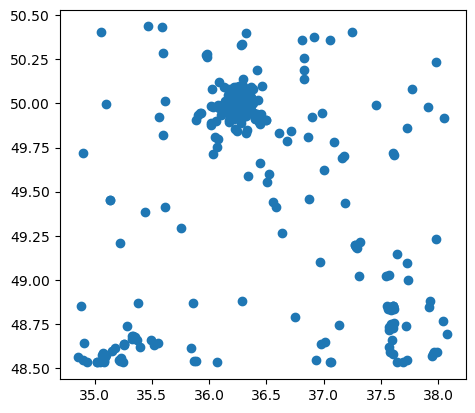

In [102]:
geodata1.plot()

In [103]:
#plotting the median value location of nodes created by each usercrs={'init':'epsg:4326'}
geometry2=[Point(xy) for xy in zip(median_loc["longitude"], median_loc["latitude"])]

C:\Users\Shruti\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

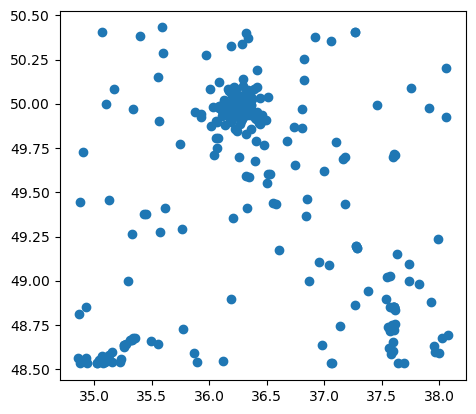

In [104]:
geodata2=gpd.GeoDataFrame(median_loc,crs=crs, geometry=geometry2)
geodata2.plot()

C:\Users\Shruti\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

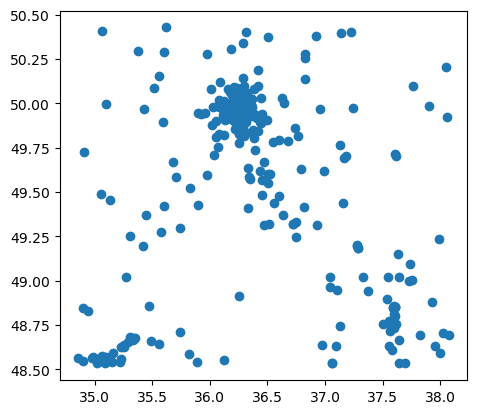

In [105]:
#plotting the mean value of locations

crs={'init':'epsg:4326'}
geometry3=[Point(xy) for xy in zip(mean_loc["longitude"], mean_loc["latitude"])]
geodata3=gpd.GeoDataFrame(mean_loc,crs=crs, geometry=geometry3)
geodata3.plot()

In [106]:
#importing shapefile of Ukraine

shapefile = gpd.read_file("C:/Users/Shruti/CST4090/ukr_admbnda_sspe_20230201_shp/ukr_admbnda_sspe_20230201_SHP/ukr_admbnda_adm1_sspe_20230201.shp")

Text(0.5, 0.98, 'kharkiv mapping pattern')

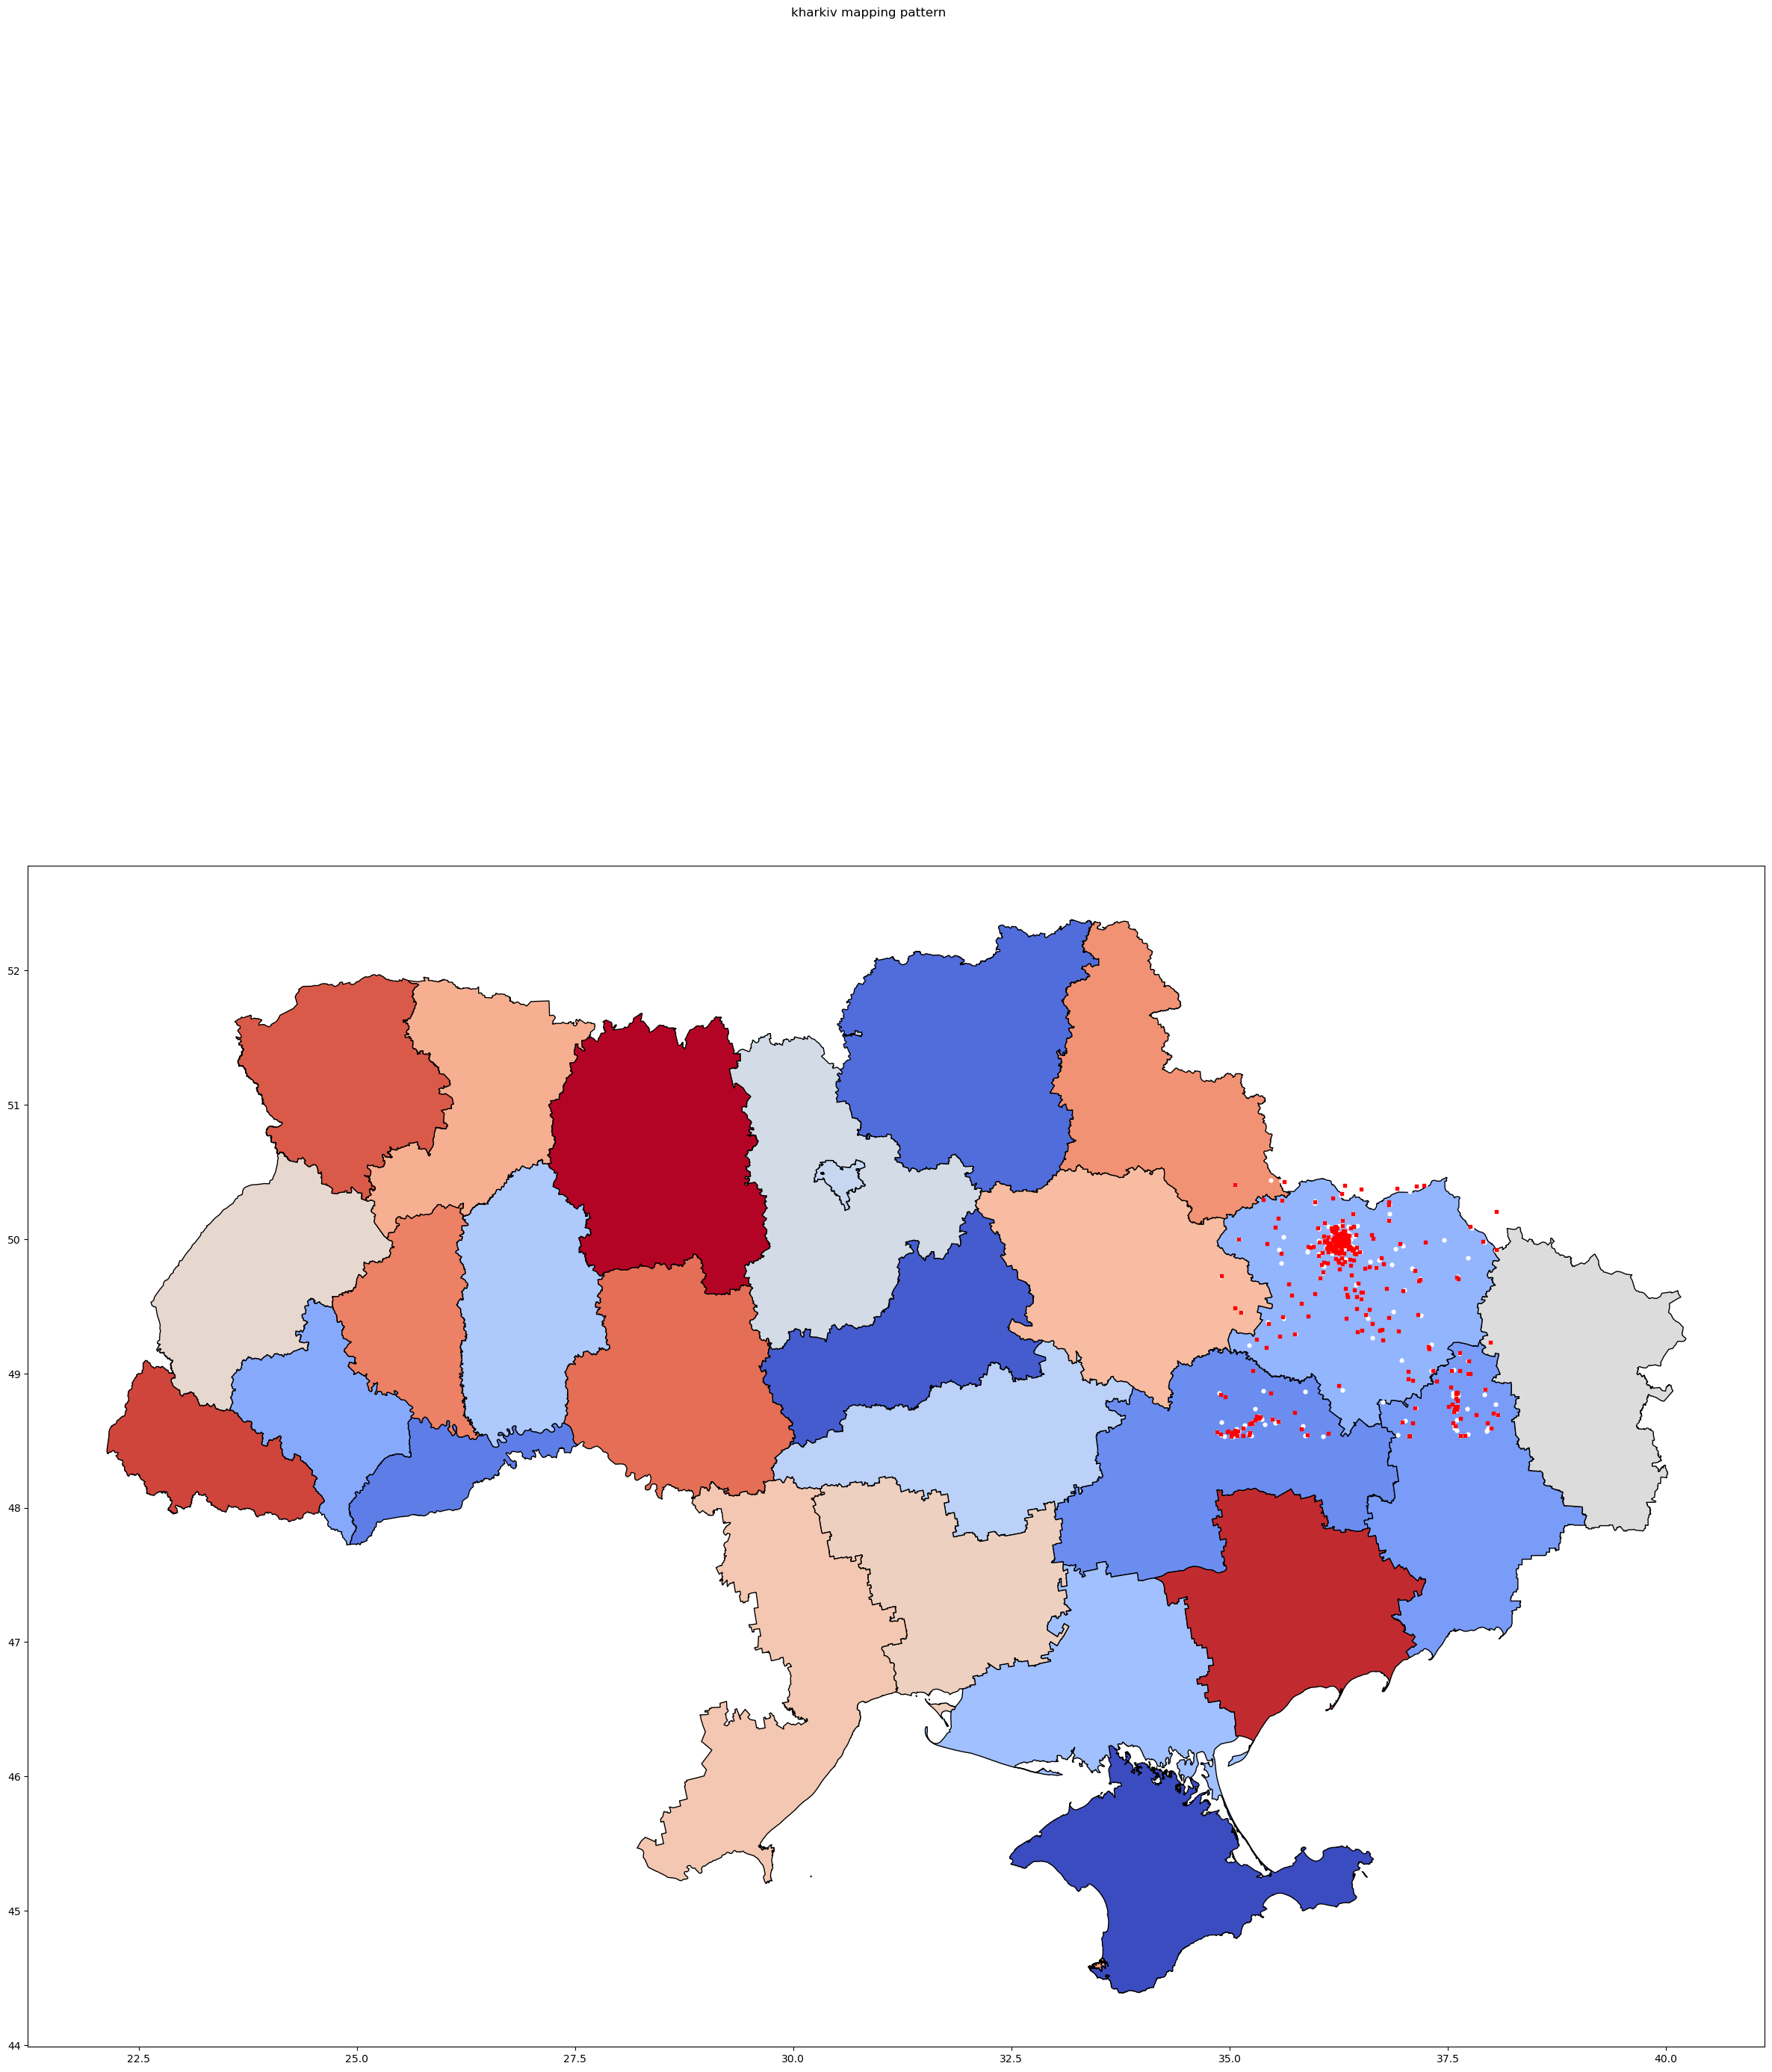

In [107]:
#creating plot with Ukraine's map  with locations of first node and mean point 


fig,ax = plt.subplots(figsize=(30, 40))


color = 'blue'

cmapblue = LinearSegmentedColormap.from_list('custom_cmap', [(0, color), (1, color)], N=256)
shapefile.plot(facecolor='white', edgecolor='k',alpha=1,linewidth=1,cmap='coolwarm',ax=ax)


g=geodata1.plot(ax=ax,color='white', marker='o',markersize=12,legend=True);
g=geodata3.plot(ax=ax,color='red',marker='s',markersize=12,legend=True);

fig.suptitle('kharkiv mapping pattern', fontsize=12)


### *Analysing dispersion of mapping using Statistical measure*

In [108]:
import statistics as st
df27=kharkiv3.loc[:,['uid','latitude','longitude']]
df27.head()

uid   latitude  longitude
0   508157  49.979777  36.268690
1  2769224  49.181996  36.688821
2   508157  49.992495  36.280724
3  2769224  49.204371  36.690381
4  2769224  49.181970  36.685149

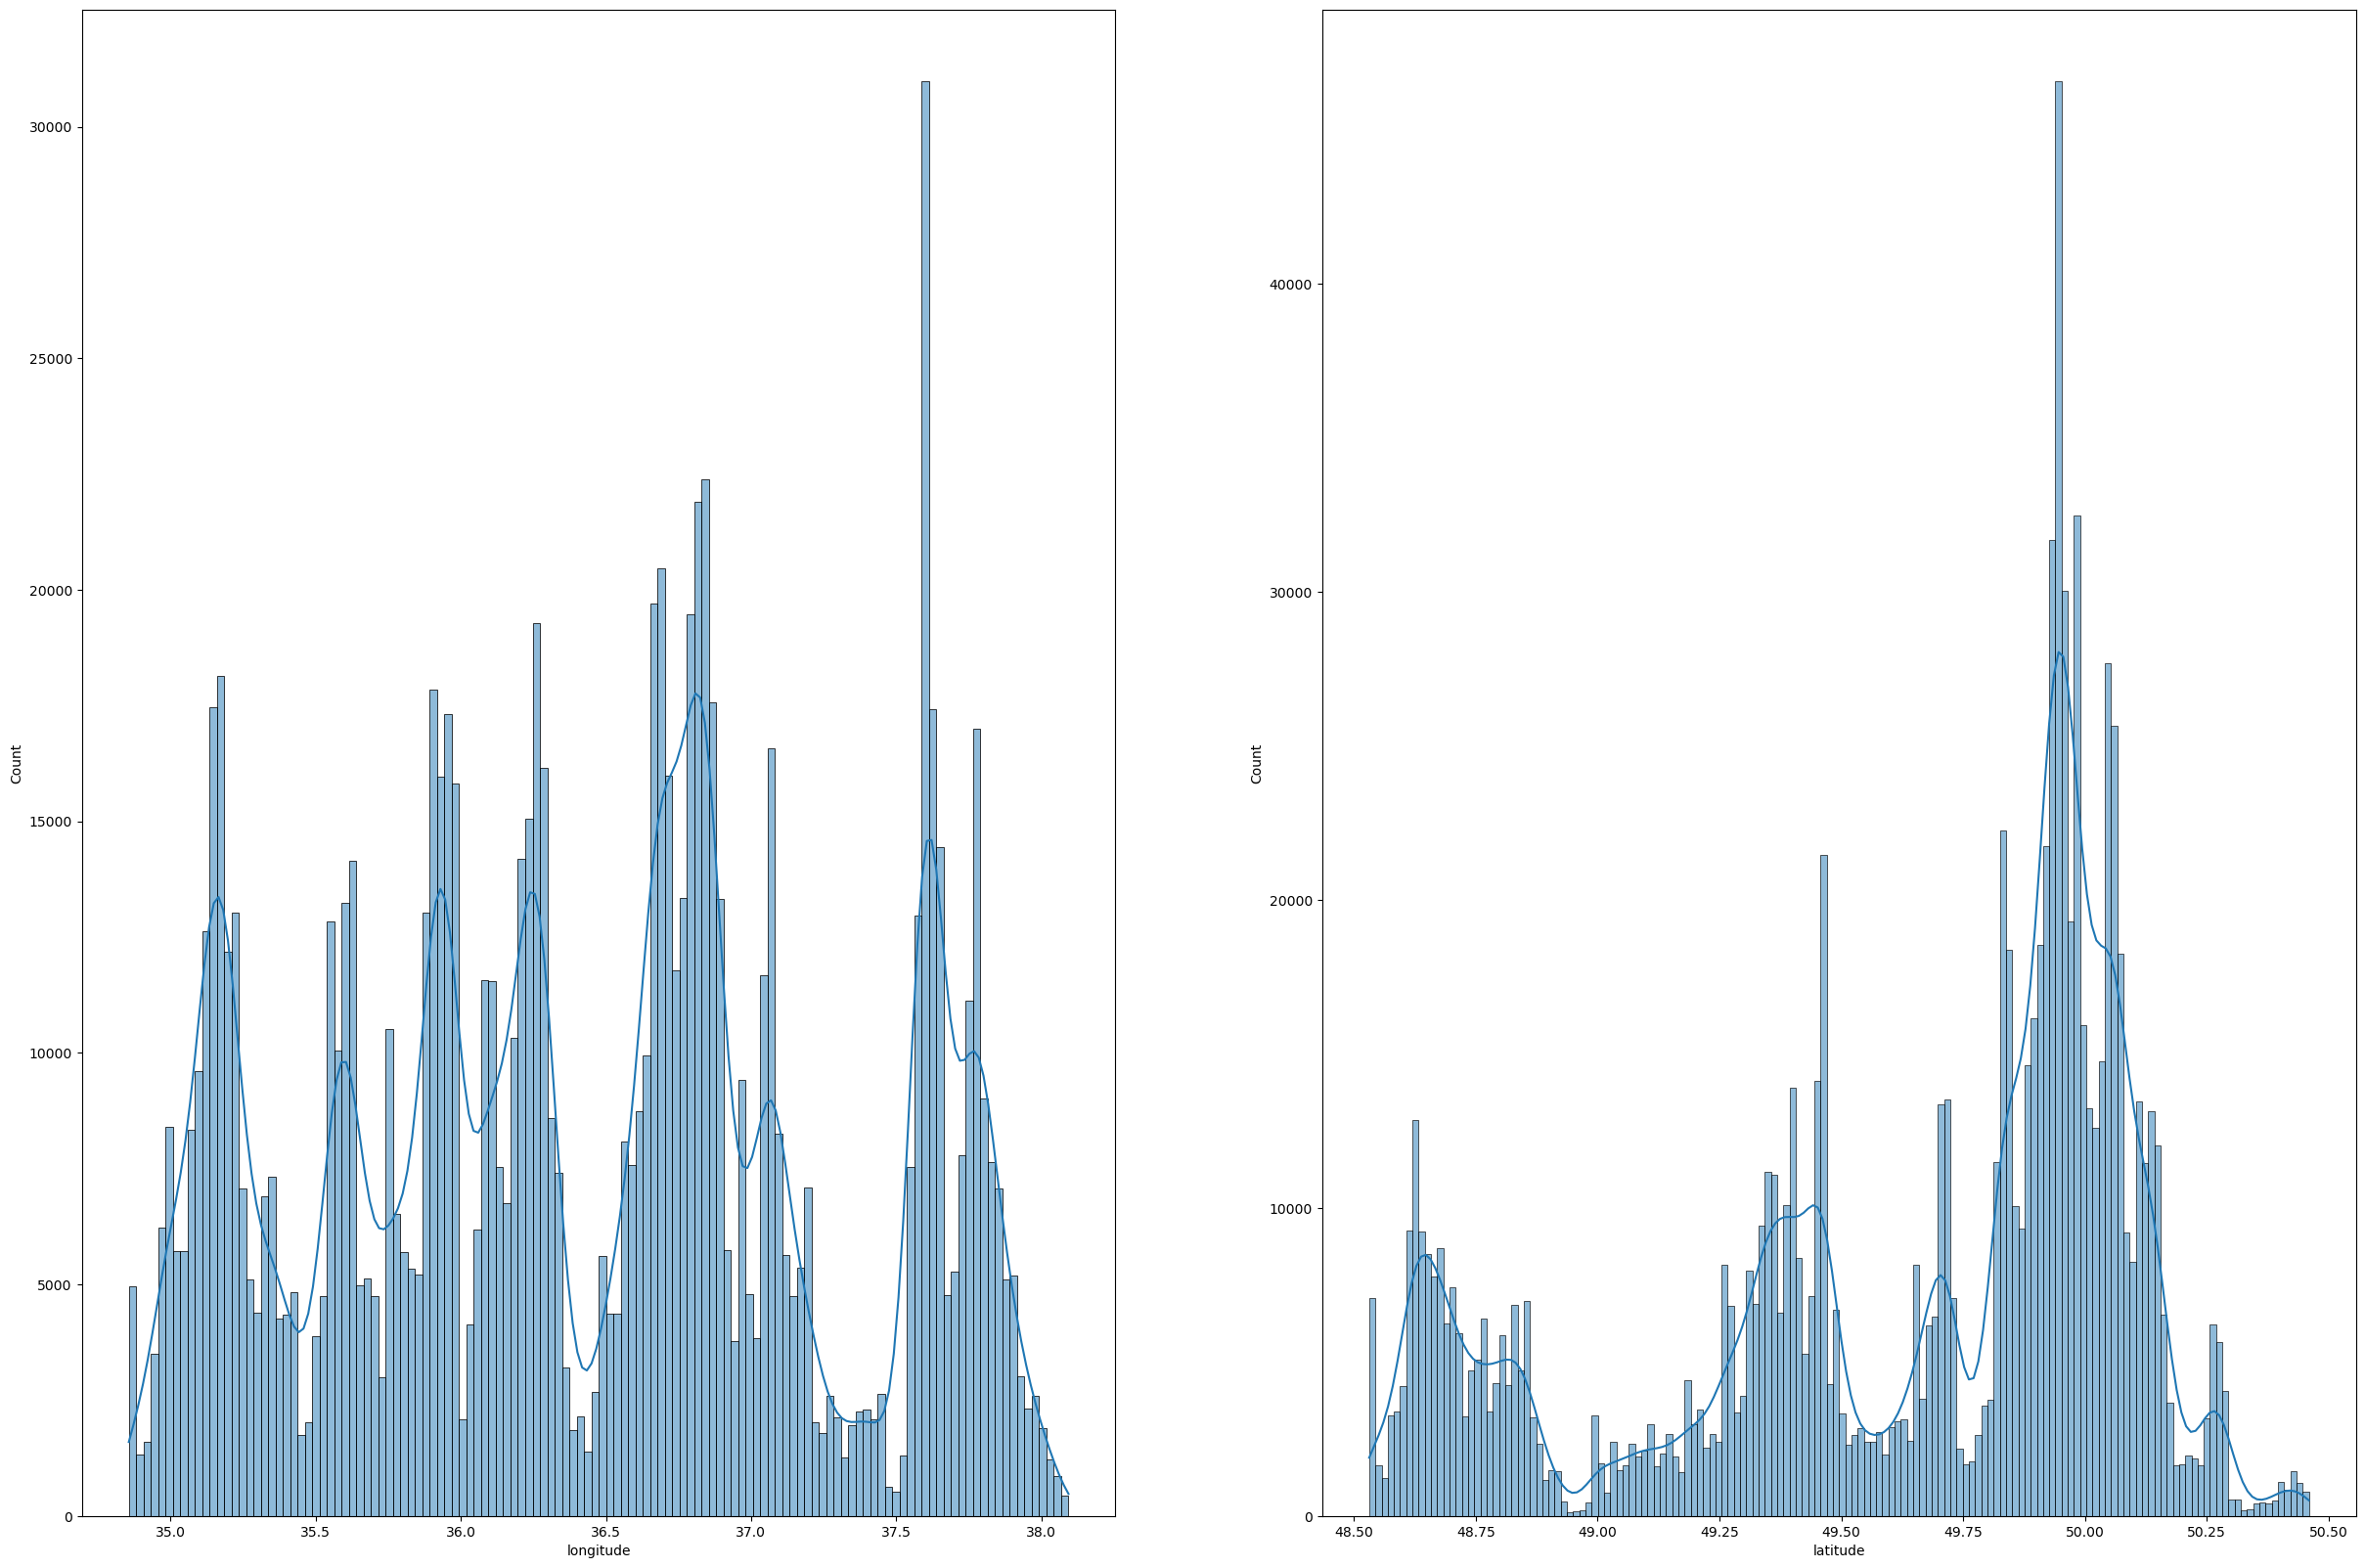

In [109]:
# frequency distribution of latitude and longitude measures

fig,axes= plt.subplots(1,2,figsize=(30, 20))

axes = axes.flatten()

s=sb.histplot(data=df27, x='longitude',bins='auto',kde=True,ax=axes[0])
s=sb.histplot(data=df27, x='latitude',bins='auto',kde=True,ax=axes[1])




In [110]:
#calculating standard deviation of complete dataset 

p_std_lat= st.pstdev(df27['latitude'])
p_std_lon= st.pstdev(df27['longitude'])


In [111]:
print('Population std for latitude: ',p_std_lat)
print('Population std for longitude: ',p_std_lon)

Population std for latitude:  0.4886554380151977
Population std for longitude:  0.8540608140330846


In [112]:
#calculating mean of each dataset

p_mean_lat=df27['latitude'].mean()
p_mean_lon=df27['longitude'].mean()

In [113]:
print('Population mean for latitude: ',p_mean_lat)
print('Population mean for latitude: ',p_mean_lon)

Population mean for latitude:  49.620873865654
Population mean for latitude:  36.420358295997445


In [114]:
#calculation for Coefficient of variance to understand the variability in mapping

cv_lat=(p_std_lat/p_mean_lat)*100
cv_lon=(p_std_lon/p_mean_lon)*100
print('CV for latitude: ',cv_lat)
print('CV for longitude: ',cv_lon)

CV for latitude:  0.9847779773855002
CV for longitude:  2.3450093683645745


In [115]:
#calculating std for each contributor group

df28=df27.groupby('uid').agg('std',numeric_only='True')
df28=df28.reset_index()

In [116]:
df28

uid  latitude  longitude
0        5359  0.478547   0.188384
1        6389       NaN        NaN
2       15110       NaN        NaN
3       55242  0.001221   0.000871
4       69607  0.156934   0.596123
..        ...       ...        ...
349  15071385       NaN        NaN
350  15082261  0.009516   0.009530
351  15099511  0.000820   0.003306
352  15130348  0.000127   0.000106
353  15152601  0.000117   0.000491

[354 rows x 3 columns]

In [117]:
df29=df28.merge(mean_loc,on='uid',how='left')

In [118]:
df29
df29= df29.rename(columns={'latitude_x': 'latitude'})
df29= df29.rename(columns={'longitude_x': 'longitude'})
df29= df29.rename(columns={'latitude_y': 'mean_lat'})
df29= df29.rename(columns={'longitude_y': 'mean_long'})
df29

uid  latitude  longitude   mean_lat  mean_long
0        5359  0.478547   0.188384  49.603486  36.505745
1        6389       NaN        NaN  48.852269  37.605824
2       15110       NaN        NaN  49.960674  36.345044
3       55242  0.001221   0.000871  48.678104  35.333836
4       69607  0.156934   0.596123  50.153077  35.556167
..        ...       ...        ...        ...        ...
349  15071385       NaN        NaN  49.981187  36.186075
350  15082261  0.009516   0.009530  49.992477  36.228408
351  15099511  0.000820   0.003306  50.140219  36.289990
352  15130348  0.000127   0.000106  50.032968  36.325889
353  15152601  0.000117   0.000491  49.690546  37.161784

[354 rows x 5 columns]

In [119]:
#calculation for CV applied to each group

df29['CV_lat']=(df29['latitude']/df29['mean_lat']*100)
df29

uid  latitude  longitude   mean_lat  mean_long    CV_lat
0        5359  0.478547   0.188384  49.603486  36.505745  0.964744
1        6389       NaN        NaN  48.852269  37.605824       NaN
2       15110       NaN        NaN  49.960674  36.345044       NaN
3       55242  0.001221   0.000871  48.678104  35.333836  0.002509
4       69607  0.156934   0.596123  50.153077  35.556167  0.312910
..        ...       ...        ...        ...        ...       ...
349  15071385       NaN        NaN  49.981187  36.186075       NaN
350  15082261  0.009516   0.009530  49.992477  36.228408  0.019034
351  15099511  0.000820   0.003306  50.140219  36.289990  0.001634
352  15130348  0.000127   0.000106  50.032968  36.325889  0.000253
353  15152601  0.000117   0.000491  49.690546  37.161784  0.000234

[354 rows x 6 columns]

In [120]:
df29['CV_lon']=(df29['longitude']/df29['mean_long'])*100
df29

uid  latitude  longitude   mean_lat  mean_long    CV_lat    CV_lon
0        5359  0.478547   0.188384  49.603486  36.505745  0.964744  0.516040
1        6389       NaN        NaN  48.852269  37.605824       NaN       NaN
2       15110       NaN        NaN  49.960674  36.345044       NaN       NaN
3       55242  0.001221   0.000871  48.678104  35.333836  0.002509  0.002465
4       69607  0.156934   0.596123  50.153077  35.556167  0.312910  1.676568
..        ...       ...        ...        ...        ...       ...       ...
349  15071385       NaN        NaN  49.981187  36.186075       NaN       NaN
350  15082261  0.009516   0.009530  49.992477  36.228408  0.019034  0.026304
351  15099511  0.000820   0.003306  50.140219  36.289990  0.001634  0.009109
352  15130348  0.000127   0.000106  50.032968  36.325889  0.000253  0.000292
353  15152601  0.000117   0.000491  49.690546  37.161784  0.000234  0.001320

[354 rows x 7 columns]

# Analysing OSM history data for kharkiv Aftere the bombing

In [121]:
#querying postgres to fetch data of kharkiv for the 6 months after the bombing 
query3 = "SELECT * FROM merged2 WHERE timestamp >=TO_DATE('2022-02-24','yyyy-mm-dd') AND timestamp <TO_DATE('2022-08-26','yyyy-mm-dd') AND latitude BETWEEN 48.531178 AND 50.4594753 AND longitude BETWEEN 34.8563132 AND 38.093529;"

In [122]:
#storing in a dataframe
kharkiv_2 = pd.read_sql(query3, con=engine)
kharkiv_2.head()

id  changeset deleted                  timestamp      uid  \
0  2429409432  124968062   false  2022-08-16 12:39:26+01:00  6718443   
1  2429409432  124968062   false  2022-08-16 12:39:26+01:00  6718443   
2  7265842736  121541431   false  2022-05-26 19:53:08+01:00    94578   
3  7265842736  121541431   false  2022-05-26 19:53:08+01:00    94578   
4  4223842845  117904102   false  2022-02-27 11:13:38+00:00  4085539   

           user  version visibility    tp   extra   latitude  longitude  
0  Limonadik_XT        2       true  node  204301  49.938425  36.263148  
1  Limonadik_XT        2       true  node  204301  49.938421  36.263192  
2       andygol        2       true  node   66780  49.990269  36.291117  
3       andygol        2       true  node   66780  49.990269  36.291117  
4      Volkov31        2       true  node  182831  50.419301  37.484713

In [123]:
#removing duplicate columns 
kharkiv_2=kharkiv_2.drop_duplicates(subset=['id', 'changeset'],keep='first',ignore_index=True)
kharkiv_2.head()

id  changeset deleted                  timestamp      uid  \
0  2429409432  124968062   false  2022-08-16 12:39:26+01:00  6718443   
1  7265842736  121541431   false  2022-05-26 19:53:08+01:00    94578   
2  4223842845  117904102   false  2022-02-27 11:13:38+00:00  4085539   
3  1070837920  118833201   false  2022-03-23 18:13:55+00:00  4811708   
4  5651368366  118709055    true  2022-03-20 20:01:28+00:00  4811708   

                  user  version visibility    tp   extra   latitude  longitude  
0         Limonadik_XT        2       true  node  204301  49.938425  36.263148  
1              andygol        2       true  node   66780  49.990269  36.291117  
2             Volkov31        2       true  node  182831  50.419301  37.484713  
3  Oleksandr Nadtochii        2       true  node   47269  50.068633  36.369141  
4  Oleksandr Nadtochii        2      false  node  253616  50.088082  36.384877

In [124]:
#splitting date only from timestamp and adding to the daraframe
kharkiv_2['date'] = kharkiv_2.loc[:, 'timestamp'].astype(str).str.split().str[0]
kharkiv_2

id  changeset deleted                  timestamp      uid  \
0       2429409432  124968062   false  2022-08-16 12:39:26+01:00  6718443   
1       7265842736  121541431   false  2022-05-26 19:53:08+01:00    94578   
2       4223842845  117904102   false  2022-02-27 11:13:38+00:00  4085539   
3       1070837920  118833201   false  2022-03-23 18:13:55+00:00  4811708   
4       5651368366  118709055    true  2022-03-20 20:01:28+00:00  4811708   
...            ...        ...     ...                        ...      ...   
146302  9592362356  118702028   false  2022-03-20 16:11:40+00:00  4811708   
146303  9592653729  118707254   false  2022-03-20 18:59:28+00:00  4811708   
146304  9595500655  118747625   false  2022-03-21 18:27:53+00:00  4811708   
146305  9598112608  118792812   false  2022-03-22 20:10:03+00:00  4811708   
146306  2607044859  124024066   false  2022-07-24 21:42:19+01:00  7154639   

                       user  version visibility    tp   extra   latitude  \
0              Limonadik_XT        2       true  node  204301  49.938425   
1                   andygol        2       true  node   66780  49.990269   
2                  Volkov31        2       true  node  182831  50.419301   
3       Oleksandr Nadtochii        2       true  node   47269  50.068633   
4       Oleksandr Nadtochii        2      false  node  253616  50.088082   
...                     ...      ...        ...   ...     ...        ...   
146302  Oleksandr Nadtochii        1       true  node   93402  50.086010   
146303  Oleksandr Nadtochii        1       true  node   97828  50.084080   
146304  Oleksandr Nadtochii        1       true  node  115817  50.081837   
146305  Oleksandr Nadtochii        1       true  node  136138  50.090662   
146306            trofimich        2       true  node  257598  49.716835   

        longitude        date  
0       36.263148  2022-08-16  
1       36.291117  2022-05-26  
2       37.484713  2022-02-27  
3       36.369141  2022-03-23  
4       36.384877  2022-03-20  
...           ...         ...  
146302  36.382805  2022-03-20  
146303  36.382186  2022-03-20  
146304  36.394288  2022-03-21  
146305  36.392216  2022-03-22  
146306  36.313710  2022-07-24  

[146307 rows x 13 columns]

### *Assigning Human and Bot categories to changesets*

In [125]:
#taking only useful columns
kharkiv4=kharkiv_2.drop(['latitude','longitude','extra'],axis=1)
kharkiv4.head()

id  changeset deleted                  timestamp      uid  \
0  2429409432  124968062   false  2022-08-16 12:39:26+01:00  6718443   
1  7265842736  121541431   false  2022-05-26 19:53:08+01:00    94578   
2  4223842845  117904102   false  2022-02-27 11:13:38+00:00  4085539   
3  1070837920  118833201   false  2022-03-23 18:13:55+00:00  4811708   
4  5651368366  118709055    true  2022-03-20 20:01:28+00:00  4811708   

                  user  version visibility    tp        date  
0         Limonadik_XT        2       true  node  2022-08-16  
1              andygol        2       true  node  2022-05-26  
2             Volkov31        2       true  node  2022-02-27  
3  Oleksandr Nadtochii        2       true  node  2022-03-23  
4  Oleksandr Nadtochii        2      false  node  2022-03-20

In [126]:
#counting number of edits in each changeset and then assigning a category [humna/bot] based on the counts
#for this classification, it is assumed that a changeset having more than 1000 edits in one time is contributed by automated script

db1=kharkiv4.drop(['deleted','timestamp','uid','user','version','visibility','tp'],axis=1)
db1=db1.groupby(['date','changeset']).count()
db1

id
date       changeset     
2022-02-24 117800556    1
           117802960    1
           117805273    1
           117805756    1
           117806196    1
...                   ...
2022-08-24 125302960  417
           125303595   11
2022-08-25 125337331    1
           125345502    1
           125345521    1

[2003 rows x 1 columns]

In [127]:
db1['category']=db1['id'].apply(lambda x:'human' if x <1000 else 'bot')
db1

id category
date       changeset              
2022-02-24 117800556    1    human
           117802960    1    human
           117805273    1    human
           117805756    1    human
           117806196    1    human
...                   ...      ...
2022-08-24 125302960  417    human
           125303595   11    human
2022-08-25 125337331    1    human
           125345502    1    human
           125345521    1    human

[2003 rows x 2 columns]

In [128]:
#total changesets contribued by each -bot and human
db1.groupby(['category']).count()

id
category      
bot          9
human     1994

In [129]:
#adding category to the original dataframe 
kharkiv4=kharkiv4.merge(db1['category'], on='changeset', how='left')
kharkiv4.head(7)

id  changeset deleted                  timestamp      uid  \
0  2429409432  124968062   false  2022-08-16 12:39:26+01:00  6718443   
1  7265842736  121541431   false  2022-05-26 19:53:08+01:00    94578   
2  4223842845  117904102   false  2022-02-27 11:13:38+00:00  4085539   
3  1070837920  118833201   false  2022-03-23 18:13:55+00:00  4811708   
4  5651368366  118709055    true  2022-03-20 20:01:28+00:00  4811708   
5  5488800432  120121280    true  2022-04-24 12:53:29+01:00  4192454   
6  5489046150  120129826   false  2022-04-24 16:54:57+01:00  4192454   

                  user  version visibility    tp        date category  
0         Limonadik_XT        2       true  node  2022-08-16    human  
1              andygol        2       true  node  2022-05-26    human  
2             Volkov31        2       true  node  2022-02-27    human  
3  Oleksandr Nadtochii        2       true  node  2022-03-23    human  
4  Oleksandr Nadtochii        2      false  node  2022-03-20    human  
5                 dval        3      false  node  2022-04-24    human  
6                 dval        2       true  node  2022-04-24    human

### *Comparing the contribution done by Humans and Bots*

In [130]:
# date-wise grouping based on categories
db2=kharkiv4.groupby(['date','category']).count()
db2.head(10)

id  changeset  deleted  timestamp  uid  user  version  \
date       category                                                           
2022-02-24 human     567        567      567        567  567   567      567   
2022-02-25 human     130        130      130        130  130   130      130   
2022-02-26 human       6          6        6          6    6     6        6   
2022-02-27 human     334        334      334        334  334   334      334   
2022-02-28 human      17         17       17         17   17    17       17   
2022-03-01 human      13         13       13         13   13    13       13   
2022-03-02 human      87         87       87         87   87    87       87   
2022-03-03 human     231        231      231        231  231   231      231   
2022-03-04 human     250        250      250        250  250   250      250   
2022-03-05 human       5          5        5          5    5     5        5   

                     visibility   tp  
date       category                   
2022-02-24 human            567  567  
2022-02-25 human            130  130  
2022-02-26 human              6    6  
2022-02-27 human            334  334  
2022-02-28 human             17   17  
2022-03-01 human             13   13  
2022-03-02 human             87   87  
2022-03-03 human            231  231  
2022-03-04 human            250  250  
2022-03-05 human              5    5

In [131]:
#creating two sepearte datafarmes each having daily total contribution by human and bot respectively for the 6 months 
db3=db2.xs('human', level='category')
db4=db2.xs('bot', level='category')

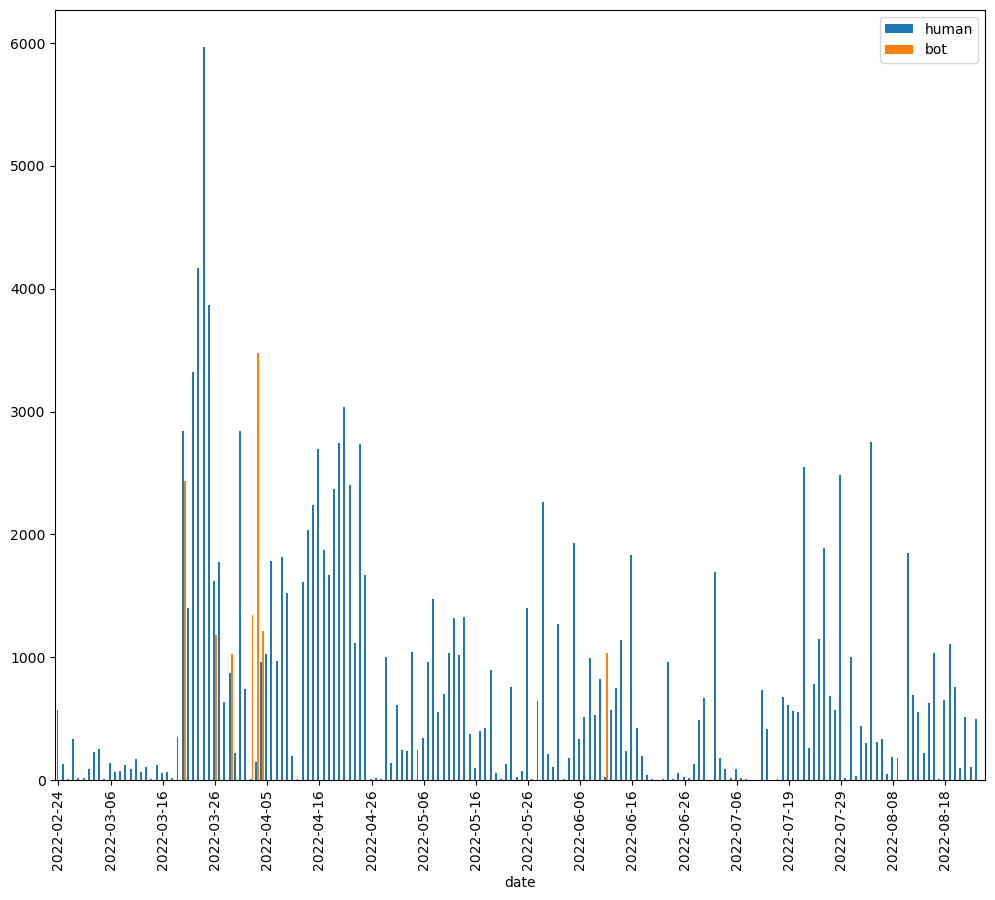

In [132]:
#plotting number of edits by both- human and bot category

x= db3.index
y=db3['changeset']
z=db4['changeset']

db5 = pd.DataFrame({
    'date': x,
    'human': y,
    'bot':z
})
db5 = db5.reset_index(drop=True)

step_size = 10 
ax = db5.plot(x="date", y=["human", "bot"],width=0.75, kind="bar", rot=90,figsize=(12, 10))
x_ticks = ax.get_xticks()
x_tick_labels = ax.get_xticklabels()

# to set x-axis labels based on the step size
ax.set_xticks(x_ticks[::step_size])
ax.set_xticklabels(x_tick_labels[::step_size])

plt.show()

### *Analysis of data for 1 week after the bombing*

In [133]:
#counting number of ediits per day for this week and plotting on bar graph
db6= kharkiv4.loc[(kharkiv4['date']>='2022-02-24') & (kharkiv4['date']<'2022-03-03'),:]
db6=db6.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
db6=db6.groupby(['date']).count()
db6.head(3)

id
date           
2022-02-24  567
2022-02-25  130
2022-02-26    6

In [134]:
#statistic measures of edits
db6.describe()

id
count    7.000000
mean   164.857143
std    211.251374
min      6.000000
25%     15.000000
50%     87.000000
75%    232.000000
max    567.000000

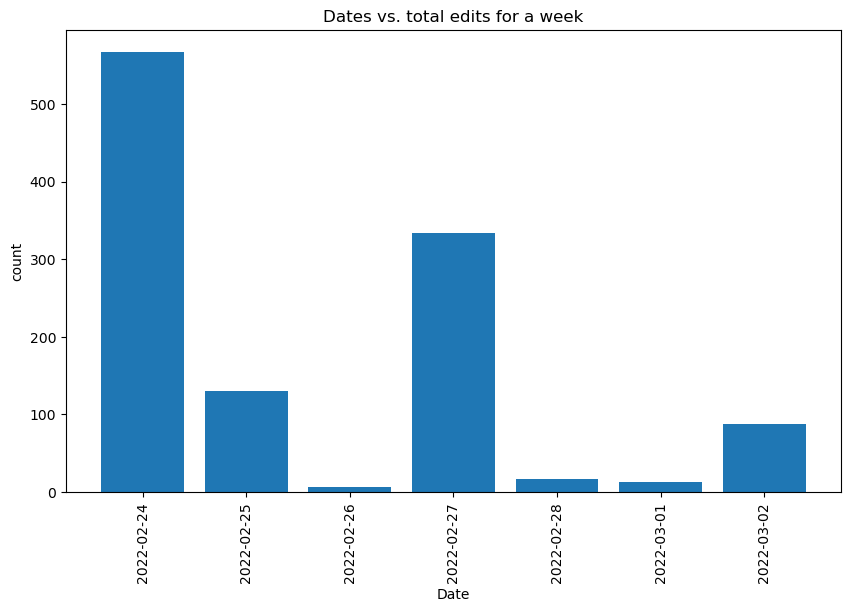

In [135]:
#using bar graph to plot the editing frequency

db6.index = pd.to_datetime(db6.index)
plt.figure(figsize=(10, 6))  
plt.bar(db6.index, db6['id'])
plt.xlabel('Date')
plt.ylabel('count')
plt.title('Dates vs. total edits for a week')
plt.xticks(rotation=90)
plt.show()

### *Analysis of data for the month after the bombing*

In [136]:
#counting number of ediits per day for 1 month and plotting on bar graph
db7= kharkiv4.loc[(kharkiv4['date']>='2022-02-24') & (kharkiv4['date']<'2022-03-26'),:]
db7=db7.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
db7=db7.groupby(['date']).count()
db7.head()

id
date           
2022-02-24  567
2022-02-25  130
2022-02-26    6
2022-02-27  334
2022-02-28   17

In [137]:
db7.describe() #statistic measures of edits

id
count    30.000000
mean    902.833333
std    1713.805809
min       5.000000
25%      61.250000
50%     123.000000
75%     343.750000
max    5971.000000

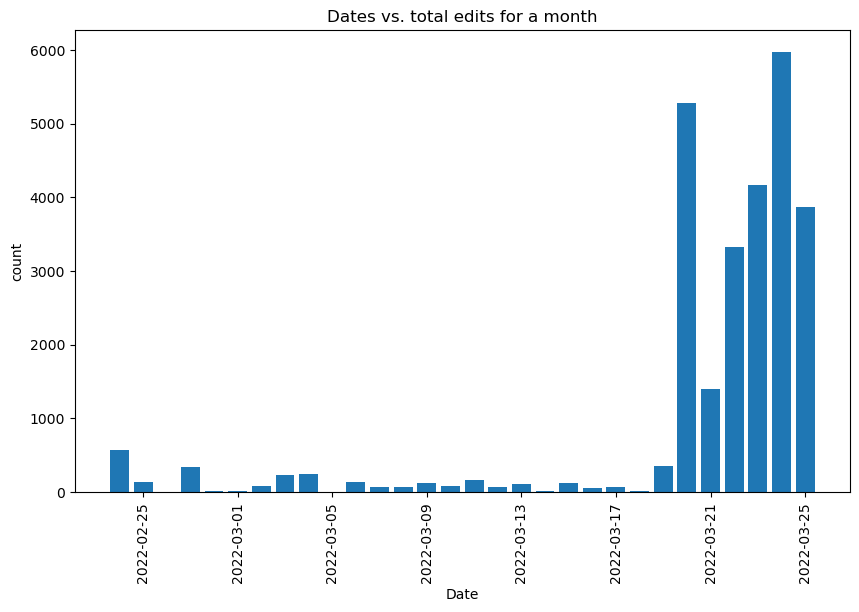

In [138]:
db7.index = pd.to_datetime(db7.index)
plt.figure(figsize=(10, 6))  
plt.bar(db7.index, db7['id'])
plt.xlabel('Date')
plt.ylabel('count')
plt.title('Dates vs. total edits for a month')
plt.xticks(rotation=90)
plt.show()

### *Analysis of data for the 3 months after the bombing*

In [139]:
#counting number of ediits per day for the 3 months before bombing and plotting on bar graph
db8= kharkiv4.loc[(kharkiv4['date']>='2022-02-24') & (kharkiv4['date']<'2022-05-26'),:]
db8=db8.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
db8=db8.groupby(['date']).count()
db8.head()

id
date           
2022-02-24  567
2022-02-25  130
2022-02-26    6
2022-02-27  334
2022-02-28   17

In [140]:
db8.describe() #statistic measures of edits

id
count    90.000000
mean   1068.422222
std    1254.626951
min       5.000000
25%     112.000000
50%     590.000000
75%    1669.500000
max    5971.000000

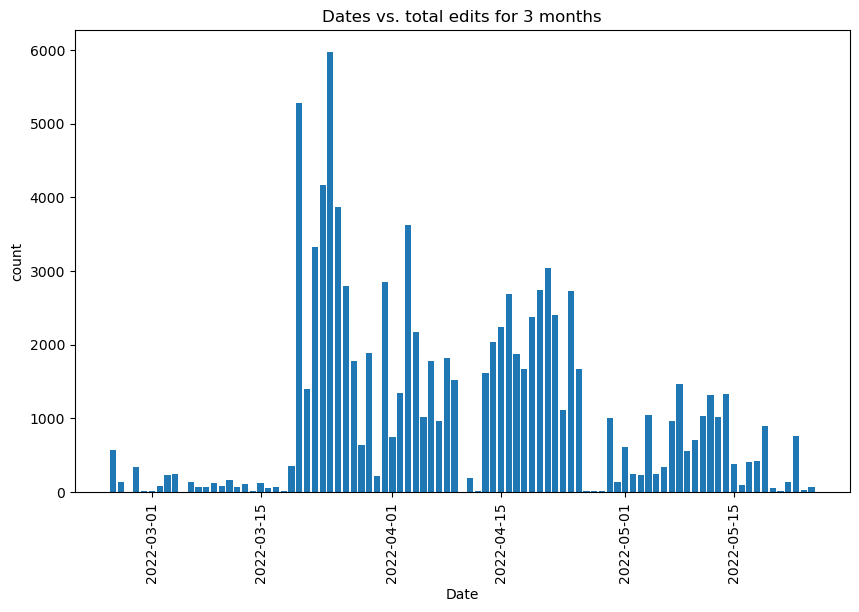

In [141]:
db8.index = pd.to_datetime(db8.index)
plt.figure(figsize=(10, 6))  
plt.bar(db8.index, db8['id'])
plt.xlabel('Date')
plt.ylabel('count')
plt.title('Dates vs. total edits for 3 months')
plt.xticks(rotation=90)
plt.show()

### *Analysis of data for the 6 months after the bombing*

In [142]:
#counting number of ediits per day for the 6 months after bombing and plotting on bar graph
db9=kharkiv4.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
db9=db9.groupby(['date']).count()
db9.describe()

id
count   178.000000
mean    821.949438
std    1030.752582
min       1.000000
25%      87.500000
50%     463.500000
75%    1112.250000
max    5971.000000

In [143]:
#analysing frequency of edits for each month during these 6 months period
dbmar= kharkiv4.loc[(kharkiv4['date']>='2022-02-24') & (kharkiv4['date']<'2022-03-26'),:]
dbmar=dbmar.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dbmar=dbmar.groupby(['date']).count()
dbmar=dbmar.reset_index()

In [144]:
dbapr= kharkiv4.loc[(kharkiv4['date']>='2022-03-26') & (kharkiv4['date']<'2022-04-26'),:]
dbapr=dbapr.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dbapr=dbapr.groupby(['date']).count()
dbapr=dbapr.reset_index()

In [145]:
dbmay= kharkiv4.loc[(kharkiv4['date']>='2022-04-26') & (kharkiv4['date']<'2022-05-26'),:]
dbmay=dbmay.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dbmay=dbmay.groupby(['date']).count()
dbmay=dbmay.reset_index()

In [146]:
dbjun= kharkiv4.loc[(kharkiv4['date']>='2022-05-26') & (kharkiv4['date']<'2022-06-26'),:]
dbjun=dbjun.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dbjun=dbjun.groupby(['date']).count()
dbjun=dbjun.reset_index()

In [147]:
dbjul= kharkiv4.loc[(kharkiv4['date']>='2022-06-26') & (kharkiv4['date']<'2022-07-26'),:]
dbjul=dbjul.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dbjul=dbjul.groupby(['date']).count()
dbjul=dbjul.reset_index()


In [148]:
dbaug= kharkiv4.loc[(kharkiv4['date']>='2022-07-26') & (kharkiv4['date']<'2022-08-26'),:]
dbaug=dbaug.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dbaug=dbaug.groupby(['date']).count()
dbaug=dbaug.reset_index()


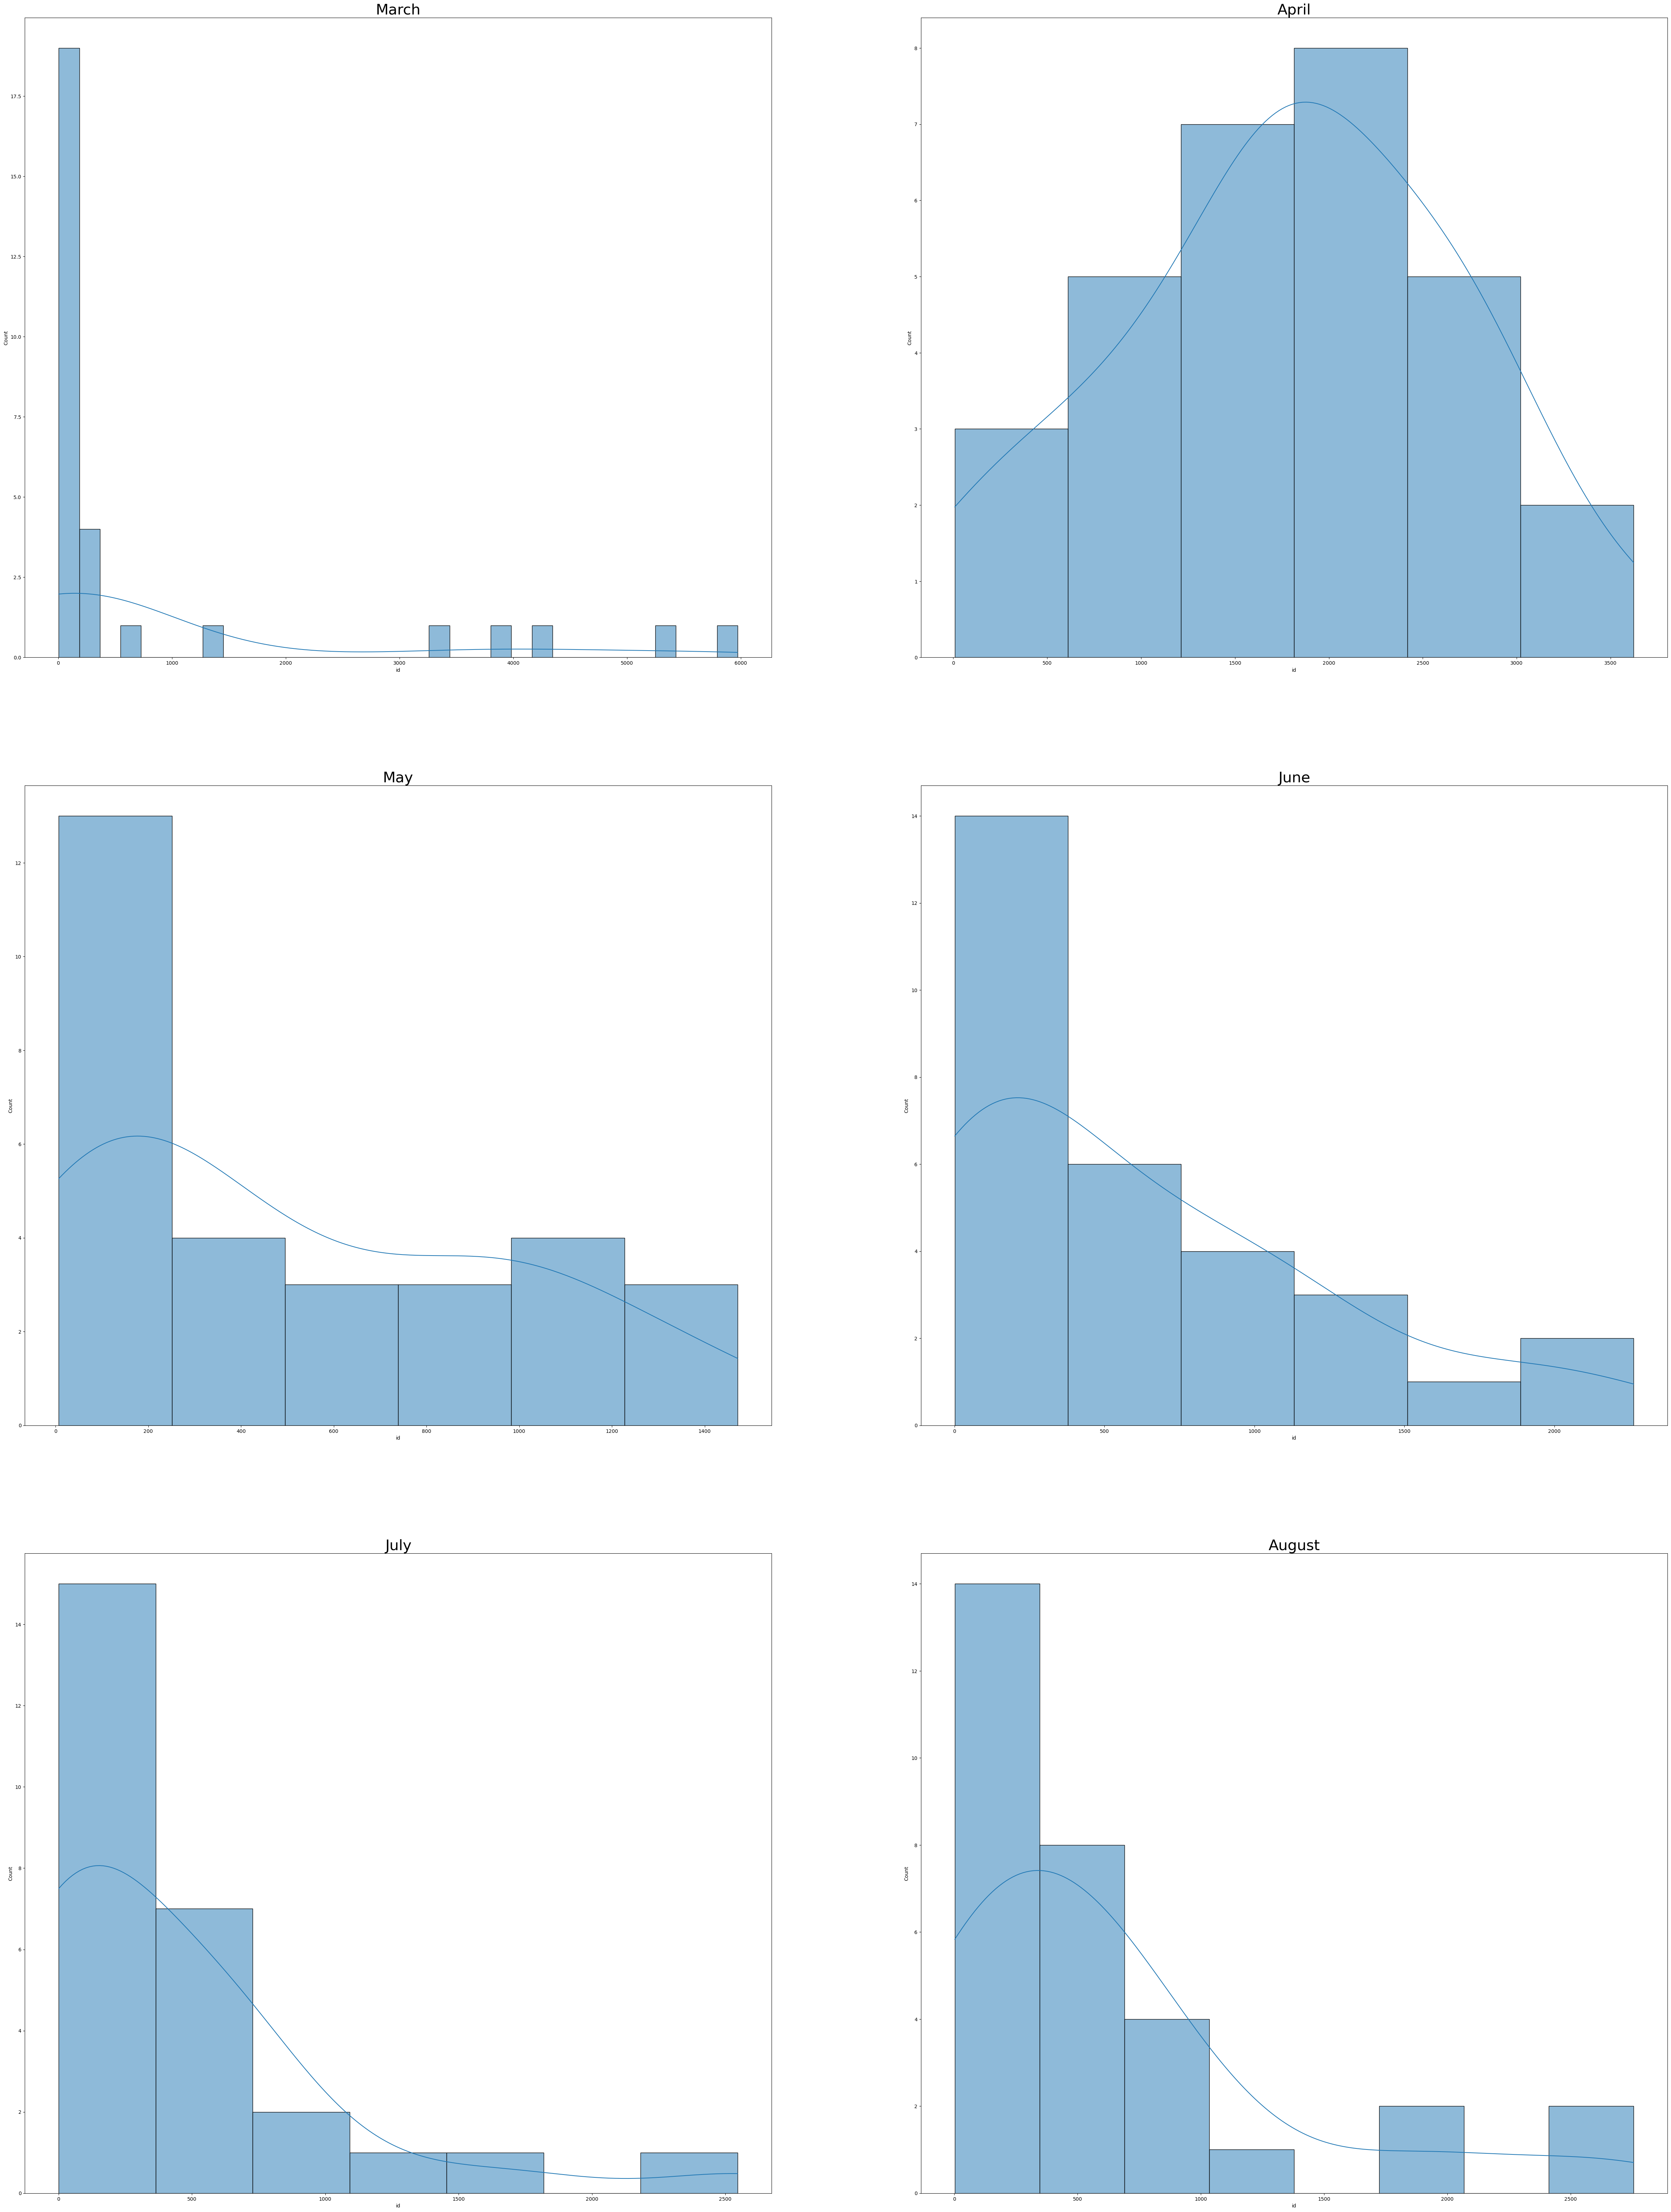

In [149]:
#histogram for frequency distributin 

fig,axes= plt.subplots(3,2,figsize=(60, 80))

axes = axes.flatten()

s=sb.histplot(data=dbmar, x='id',bins='auto',kde=True,ax=axes[0]).set_title('March',fontsize = 30)
s=sb.histplot(data=dbapr, x='id',bins='auto',kde=True,ax=axes[1]).set_title('April',fontsize = 30)
s=sb.histplot(data=dbmay, x='id',bins='auto',kde=True,ax=axes[2]).set_title('May',fontsize = 30)
s=sb.histplot(data=dbjun, x='id',bins='auto',kde=True,ax=axes[3]).set_title('June',fontsize = 30)
s=sb.histplot(data=dbjul, x='id',bins='auto',kde=True,ax=axes[4]).set_title('July',fontsize = 30)
s=sb.histplot(data=dbaug, x='id',bins='auto',kde=True,ax=axes[5]).set_title('August',fontsize = 30)

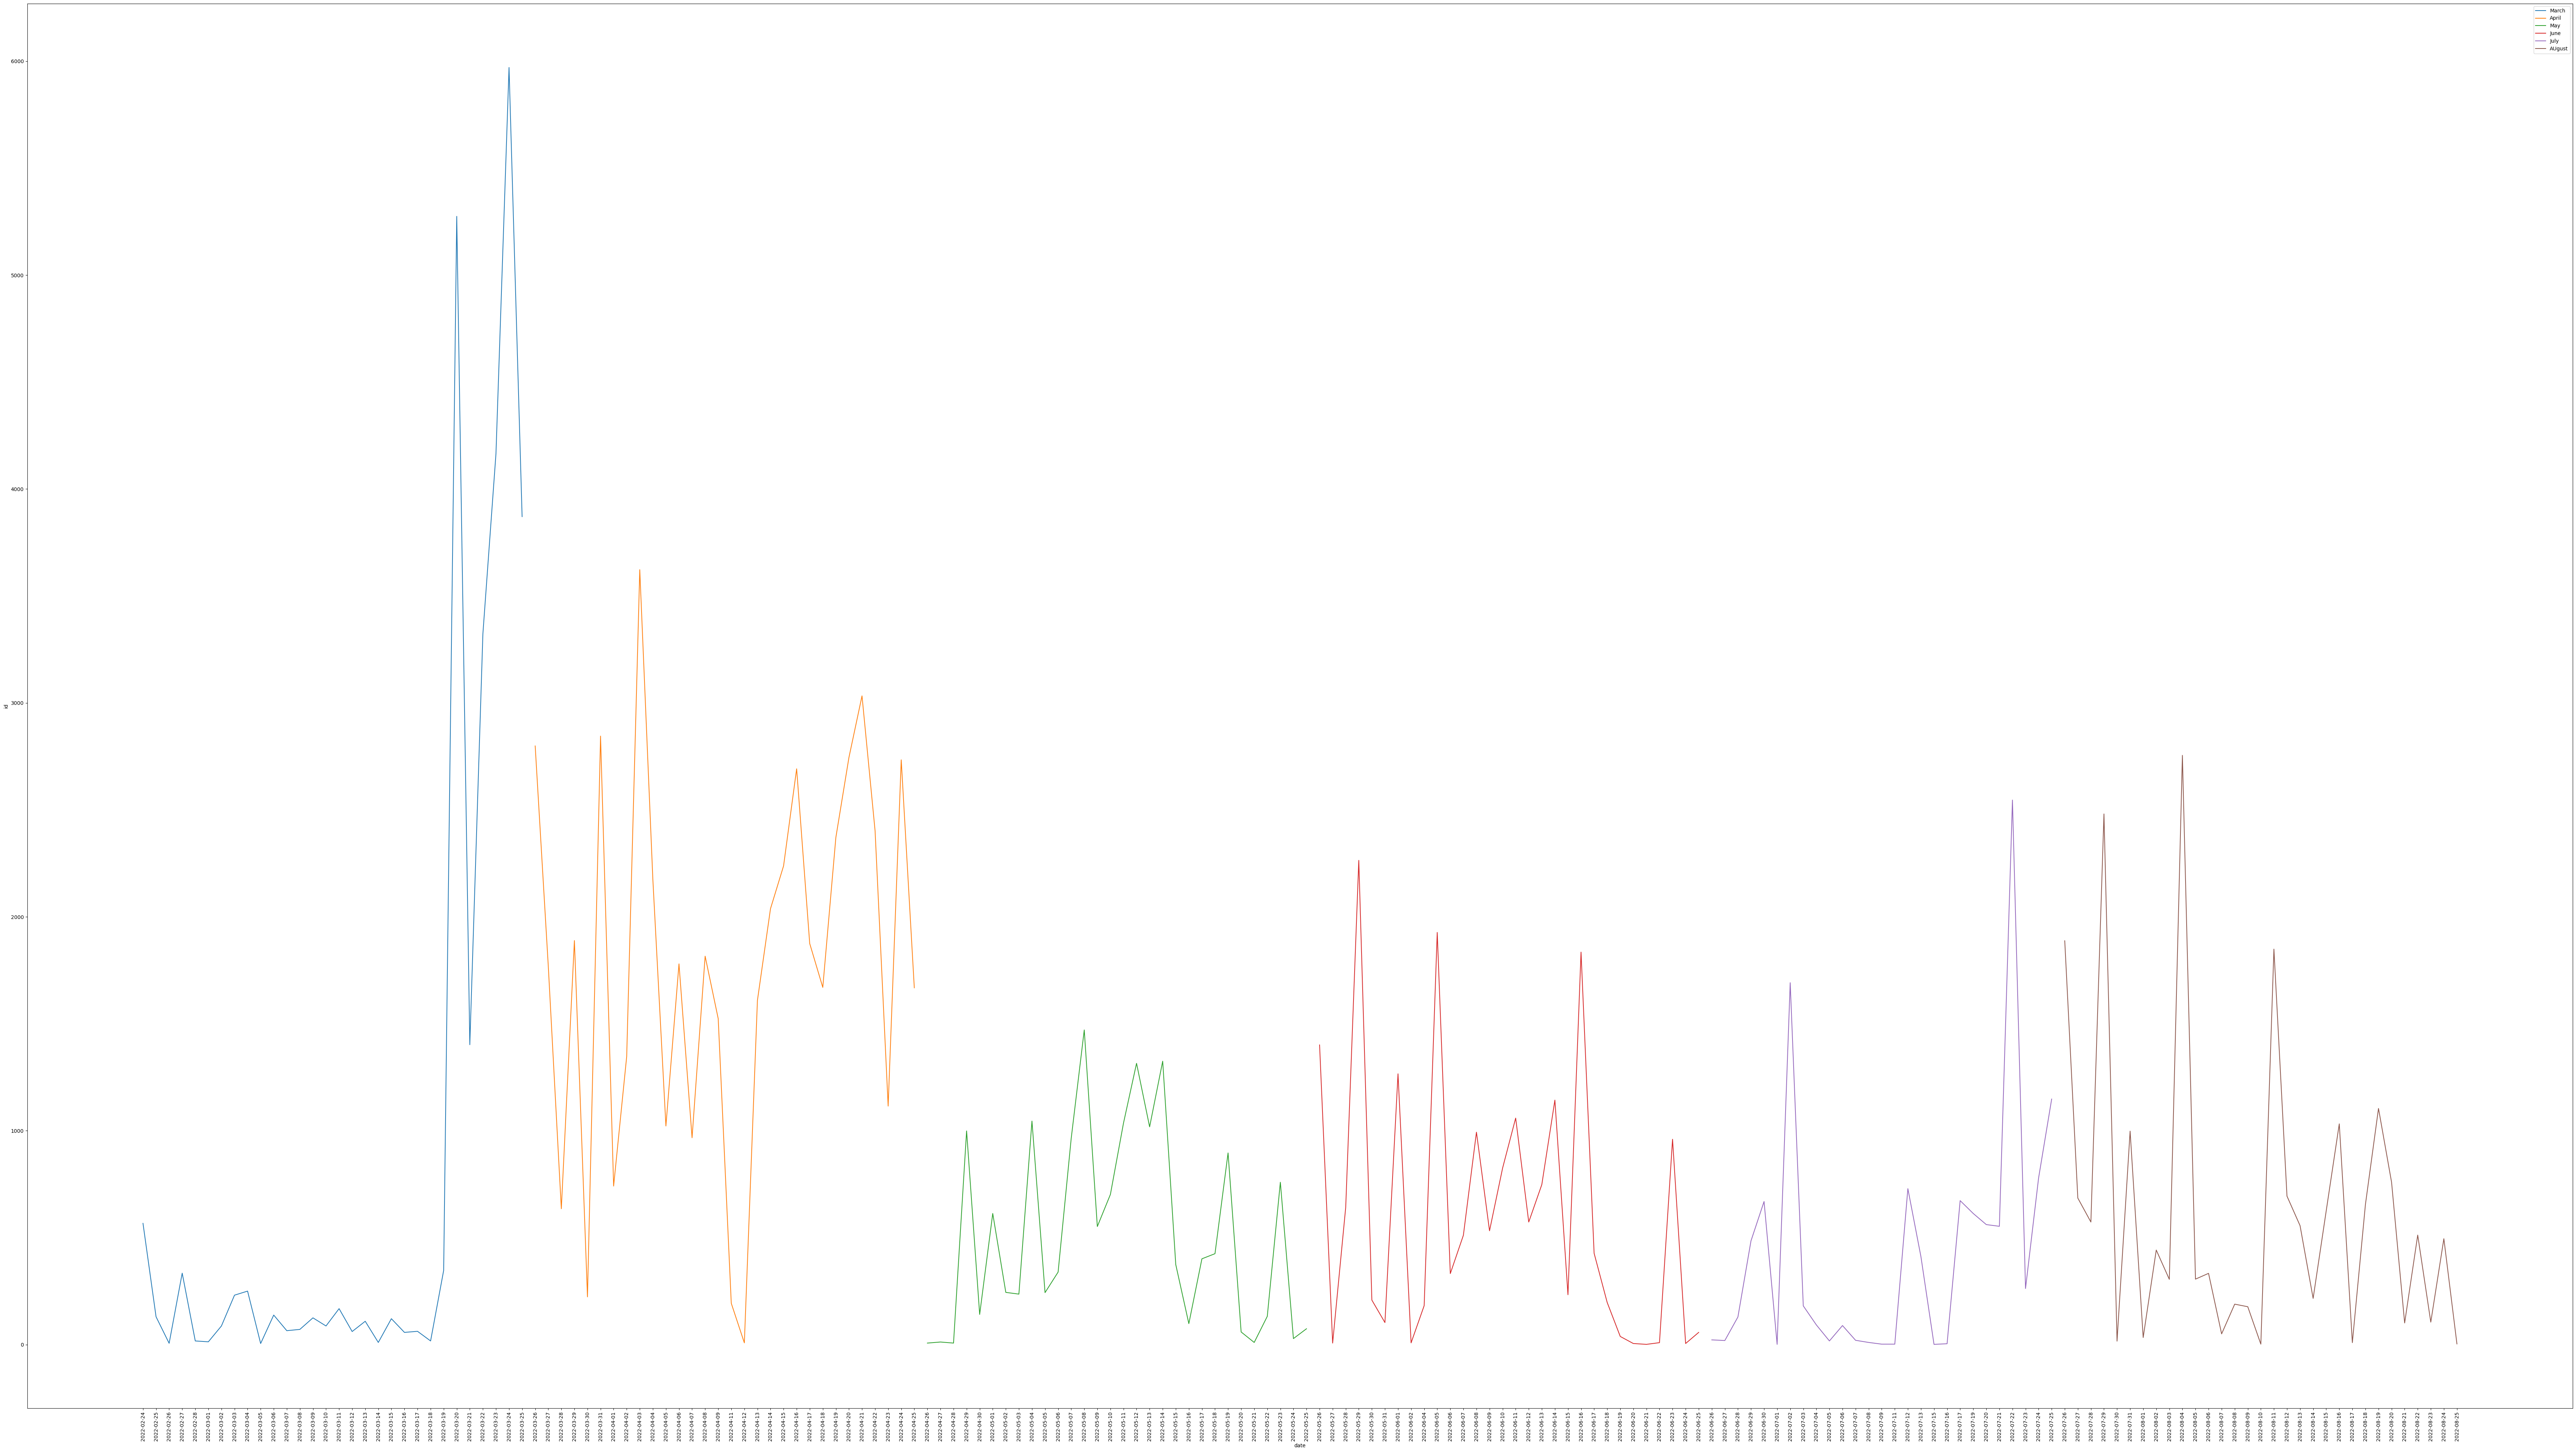

In [150]:
#trend chart to understand the editting pattern during 6 months befire bombing

fig = plt.subplots(figsize=(90, 50))
s=sb.lineplot(x='date', y='id', data=dbmar,label='March')
s=sb.lineplot(x='date', y='id', data=dbapr,label='April')
s=sb.lineplot(x='date', y='id', data=dbmay,label='May')
s=sb.lineplot(x='date', y='id', data=dbjun,label='June')
s=sb.lineplot(x='date', y='id', data=dbjul,label='July')
s=sb.lineplot(x='date', y='id', data=dbaug,label='AUgust')
plt.xticks(rotation=90)

plt.show()

### *Analysing editing frequency at contributor level*

In [151]:
#working on number of changesets and number of edits by each user during the 6 months

db10=kharkiv4.loc[kharkiv4['category']=='human']
db11=kharkiv4.loc[kharkiv4['category']=='bot']

db10=db10.drop(['deleted','timestamp','user','version','visibility','tp','date'], axis=1)
db11=db11.drop(['deleted','timestamp','user','version','visibility','tp','date'], axis=1)

In [152]:
#counting unique changesets added by each user during 6 months

db12=db10.groupby('uid')['changeset'].nunique()
db13=db11.groupby('uid')['changeset'].nunique()

In [153]:
#number of unique changesets posted by each contributors

changesets2 = db12.reset_index()
changesets2

uid  changeset
0         629          2
1        5359          1
2       12054          2
3       39040          3
4       47756         12
..        ...        ...
216  16660607         12
217  16660711          2
218  16700342          1
219  16702320          1
220  16806504         82

[221 rows x 2 columns]

In [154]:
#counting the changesets added bu software bots during the period
changesets_bot2= db13.reset_index()
changesets_bot2

uid  changeset
0  3758092          1
1  4811708          8

In [155]:

changesets_bot2['uid'].isin(changesets_bot2['uid']) #automated scripts were added by the same users as those listed in 'human' category 

0    True
1    True
Name: uid, dtype: bool

In [156]:
#grouping data on user and counting the total contribution made by each user during the whole period
db14=db10.drop(['changeset','category'],axis=1)
id_counts2=db14.groupby(['uid']).count()

id_counts2=id_counts2.reset_index()
id_counts2

uid    id
0         629   543
1        5359     1
2       12054   221
3       39040    48
4       47756  3771
..        ...   ...
216  16660607    15
217  16660711    12
218  16700342     1
219  16702320     1
220  16806504  1649

[221 rows x 2 columns]

In [157]:
# Grouping users based on total contribution using the values of 25% and 75% values of quantiles 

id_counts2['contribution level']=id_counts2['id'].apply(lambda x: 'inactive' if x < 2000 else ('casual mapper' if 2000 <= x < 6000 else 'committed'))

id_counts2.head()

uid    id contribution level
0    629   543           inactive
1   5359     1           inactive
2  12054   221           inactive
3  39040    48           inactive
4  47756  3771      casual mapper

In [158]:
#count of contributors in each category

contribution2= id_counts2.drop('id', axis=1)

contribution2=contribution2.groupby('contribution level').count()

print(contribution2)

                    uid
contribution level     
casual mapper        10
committed             3
inactive            208


In [159]:
#adding contribution level to the dataframe 
temp=id_counts2.drop('id',axis=1)
temp=temp.set_index('uid')


kharkiv4=kharkiv4.merge(temp['contribution level'], on='uid', how='left')
kharkiv4

id  changeset deleted                  timestamp      uid  \
0       2429409432  124968062   false  2022-08-16 12:39:26+01:00  6718443   
1       7265842736  121541431   false  2022-05-26 19:53:08+01:00    94578   
2       4223842845  117904102   false  2022-02-27 11:13:38+00:00  4085539   
3       1070837920  118833201   false  2022-03-23 18:13:55+00:00  4811708   
4       5651368366  118709055    true  2022-03-20 20:01:28+00:00  4811708   
...            ...        ...     ...                        ...      ...   
146302  9592362356  118702028   false  2022-03-20 16:11:40+00:00  4811708   
146303  9592653729  118707254   false  2022-03-20 18:59:28+00:00  4811708   
146304  9595500655  118747625   false  2022-03-21 18:27:53+00:00  4811708   
146305  9598112608  118792812   false  2022-03-22 20:10:03+00:00  4811708   
146306  2607044859  124024066   false  2022-07-24 21:42:19+01:00  7154639   

                       user  version visibility    tp        date category  \
0              Limonadik_XT        2       true  node  2022-08-16    human   
1                   andygol        2       true  node  2022-05-26    human   
2                  Volkov31        2       true  node  2022-02-27    human   
3       Oleksandr Nadtochii        2       true  node  2022-03-23    human   
4       Oleksandr Nadtochii        2      false  node  2022-03-20    human   
...                     ...      ...        ...   ...         ...      ...   
146302  Oleksandr Nadtochii        1       true  node  2022-03-20    human   
146303  Oleksandr Nadtochii        1       true  node  2022-03-20    human   
146304  Oleksandr Nadtochii        1       true  node  2022-03-21    human   
146305  Oleksandr Nadtochii        1       true  node  2022-03-22    human   
146306            trofimich        2       true  node  2022-07-24    human   

       contribution level  
0               committed  
1           casual mapper  
2                inactive  
3               committed  
4               committed  
...                   ...  
146302          committed  
146303          committed  
146304          committed  
146305          committed  
146306      casual mapper  

[146307 rows x 12 columns]

In [160]:
#counting the number of deleted nodes for each user
df_deleted2=kharkiv4.loc[:,['uid','deleted']]
df_deleted2=df_deleted2.groupby(['uid','deleted'])['deleted'].count()
df_del2=pd.DataFrame(df_deleted2)
df_del2= df_del2.rename(columns={'deleted': 'deleted nodes'})
df_del2=df_del2.reset_index()
df_del2=df_del2.loc[df_del2['deleted']=='true']


In [161]:
df_del2=df_del2.set_index('uid')
df_del2

deleted  deleted nodes
uid                            
48157       true              3
94578       true             44
177389      true             74
204049      true             23
224440      true             12
...          ...            ...
16132455    true             52
16135919    true              4
16660607    true              4
16660711    true              1
16806504    true             88

[86 rows x 2 columns]

### *Analysis of version history on contributor level*

In [162]:
#anaysing version history on contributor level
kharkiv4=kharkiv4.sort_values(['id', 'version'], ascending=[True,True])
kharkiv4

id  changeset deleted                  timestamp       uid  \
36595     27119141  123533214   false  2022-07-12 19:57:23+01:00   6718443   
98972     27119514  123029186    true  2022-06-30 07:27:59+01:00  11082979   
53190     27121489  118445824   false  2022-03-13 21:05:10+00:00   2877744   
22389     27122099  119440226   false  2022-04-07 19:33:40+01:00   1256648   
77970     27123919  118446527   false  2022-03-13 21:31:52+00:00   2877744   
...            ...        ...     ...                        ...       ...   
81640   9974355760  125302960   false  2022-08-24 09:08:54+01:00   6718443   
139595  9974355761  125302960   false  2022-08-24 09:08:54+01:00   6718443   
58733   9974359850  125303595   false  2022-08-24 09:27:27+01:00   6718443   
145655  9976490417  125345502   false  2022-08-25 08:30:42+01:00  16660607   
145656  9976490417  125345521   false  2022-08-25 08:31:13+01:00  16660607   

                user  version visibility    tp        date category  \
36595   Limonadik_XT        4       true  node  2022-07-12    human   
98972          sur0k        6      false  node  2022-06-30    human   
53190     gektor1488        6       true  node  2022-03-13    human   
22389       Zigeuner       12       true  node  2022-04-07    human   
77970     gektor1488        5       true  node  2022-03-13    human   
...              ...      ...        ...   ...         ...      ...   
81640   Limonadik_XT        1       true  node  2022-08-24    human   
139595  Limonadik_XT        1       true  node  2022-08-24    human   
58733   Limonadik_XT        1       true  node  2022-08-24    human   
145655      Artur'In        1       true  node  2022-08-25    human   
145656      Artur'In        2       true  node  2022-08-25    human   

       contribution level  
36595           committed  
98972            inactive  
53190            inactive  
22389            inactive  
77970            inactive  
...                   ...  
81640           committed  
139595          committed  
58733           committed  
145655           inactive  
145656           inactive  

[146307 rows x 12 columns]

In [163]:
#Extract the list of editing version for each of the contributors 

version2=kharkiv4.groupby('uid')['version'].apply(list)
version_list2=pd.DataFrame(version2)
version_list2.head()

version
uid                                 
629    [8, 3, 2, 1, 1, 1, 1, 1, 1...
5359                             [6]
12054  [2, 2, 2, 2, 2, 2, 2, 2, 2...
39040  [1, 1, 2, 1, 2, 1, 2, 1, 2...
47756  [3, 7, 6, 6, 6, 6, 5, 5, 4...

In [164]:
# This will count the number of new nodes vs number of edits 
# Function to count the frequency of new nodes(version=1) in a list


# Apply the functions to the 'version' column
version_list2['new nodes'] = version_list2['version'].apply(count_ones)
version_list2['edited nodes'] = version_list2['version'].apply(edits)                                                    
version_list2.head(16)

version  new nodes  edited nodes
uid                                                           
629     [8, 3, 2, 1, 1, 1, 1, 1, 1...        540             3
5359                              [6]          0             1
12054   [2, 2, 2, 2, 2, 2, 2, 2, 2...        187            34
39040   [1, 1, 2, 1, 2, 1, 2, 1, 2...         31            17
47756   [3, 7, 6, 6, 6, 6, 5, 5, 4...       3608           163
47892                            [40]          0             1
48157   [2, 2, 2, 2, 2, 2, 2, 2, 2...         55            21
69259                             [7]          0             1
69966   [1, 1, 1, 1, 1, 1, 1, 1, 1...         81             0
79602                        [27, 40]          0             2
94578   [6, 8, 7, 11, 9, 5, 9, 15,...          1          2461
95117     [7, 7, 8, 6, 4, 4, 4, 5, 5]          0             9
162827  [14, 6, 4, 4, 4, 4, 2, 2, ...       1316           183
177389  [3, 4, 5, 2, 2, 2, 2, 2, 2...          3            76
195702  [3, 4, 6, 2, 2, 2, 2, 2, 2...          0            15
204049  [12, 11, 12, 15, 10, 15, 1...         27           231

### *Calculating the total active days for each user*

In [165]:
df_lifespan2= kharkiv4.loc[:,['uid','date']]
df_lifespan2['date'] = df_lifespan2.date.astype('datetime64[ns]')
df_lifespan2=df_lifespan2.sort_values(['uid','date'],ascending=[True,True])
df_lifespan2

uid       date
30534        629 2022-06-10
69993        629 2022-06-10
64066        629 2022-06-10
96003        629 2022-06-10
110807       629 2022-06-10
...          ...        ...
78931   16806504 2022-08-21
110255  16806504 2022-08-21
18846   16806504 2022-08-21
104225  16806504 2022-08-21
75567   16806504 2022-08-21

[146307 rows x 2 columns]

In [166]:
 
df_lifespan2=df_lifespan2.groupby('uid')
first_row= df_lifespan2.min()
last_row=df_lifespan2.max()

timeframe_1=pd.DataFrame(first_row).reset_index()
timeframe_2=pd.DataFrame(last_row).reset_index()

# first day when the conributor made an activty
timeframe_1.head(10)

uid       date
0    629 2022-06-10
1   5359 2022-05-03
2  12054 2022-03-04
3  39040 2022-03-07
4  47756 2022-03-29
5  47892 2022-03-09
6  48157 2022-06-01
7  69259 2022-03-16
8  69966 2022-03-10
9  79602 2022-05-14

In [167]:
timeframe_2.head(10) # last day when the conributor made an activty

uid       date
0    629 2022-06-15
1   5359 2022-05-03
2  12054 2022-03-04
3  39040 2022-03-07
4  47756 2022-08-22
5  47892 2022-03-09
6  48157 2022-06-01
7  69259 2022-03-16
8  69966 2022-03-10
9  79602 2022-05-14

In [168]:
#calculating the difference between two dats

result=(timeframe_2['date']-timeframe_1['date'])
day=pd.to_timedelta(1, unit='d')
timeframe_1['active days']=result+day
timeframe_1=timeframe_1.drop(['date'],axis=1)
timeframe_1.head(6)

uid active days
0    629      6 days
1   5359      1 days
2  12054      1 days
3  39040      1 days
4  47756    147 days
5  47892      1 days

## *Importing and analysing tag data for the 6 months period*

In [169]:
#to fetch the tags data for all the nodes fetched in previous query for 6 months

query4 = "SELECT * FROM node_tags WHERE id IN (SELECT id FROM user_info WHERE id IN (SELECT id FROM node_locations WHERE latitude BETWEEN 48.531178 AND 50.4594753 AND longitude BETWEEN 34.8563132 AND 38.093529) AND timestamp >=TO_DATE('2022-02-24','yyyy-mm-dd') AND timestamp <TO_DATE('2022-08-26','yyyy-mm-dd'));"

In [170]:
kharkiv5 = pd.read_sql(query4, con=engine)

In [171]:
pd.set_option('max_colwidth', None)
kharkiv5

id  \
0         27119141   
1         27119141   
2         27119141   
3         27119141   
4        252176002   
...            ...   
200209  6444967218   
200210  6452938592   
200211  6452938592   
200212  6452938601   
200213  6452938601   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              tags  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           {'created_by': 'JOSM'}  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               {}  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [172]:
#count of empty tags

db15=kharkiv5[kharkiv5['tags']=='{}'].count()
db15

id      183686
tags    183686
dtype: int64

In [173]:
#only taking the records having non-null values in tags

db15=kharkiv5[kharkiv5['tags']!='{}']

db15

id  \
0         27119141   
4        252176002   
7        252176017   
12       252176029   
18       252176056   
...            ...   
200081  6003248336   
200206  6444967218   
200207  6444967218   
200208  6444967218   
200209  6444967218   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              tags  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           {'created_by': 'JOSM'}  
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           {'created_by': 'JOSM'}  
7                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [174]:
# append the tags column to previous dataframe having user details 
pd.set_option('max_colwidth', 30)
db16=db15.merge(kharkiv4, on='id', how='left')
db16

id                           tags  changeset deleted  \
0        27119141         {'created_by': 'JOSM'}  123533214   false   
1       252176002         {'created_by': 'JOSM'}  122514423   false   
2       252176017         {'created_by': 'JOSM'}  120010339   false   
3       252176029         {'created_by': 'JOSM'}  120009555   false   
4       252176056         {'created_by': 'JOSM'}  120028057    true   
...           ...                            ...        ...     ...   
21455  6003248336  {'amenity': 'pharmacy', 'c...  121647035   false   
21456  6444967218  {'addr:housenumber': '127А...  121542119   false   
21457  6444967218  {'addr:city': 'Харьков', '...  121542119   false   
21458  6444967218  {'addr:city': 'Харьков', '...  121542119   false   
21459  6444967218  {'addr:city': 'Харьков', '...  121542119   false   

                       timestamp      uid          user  version visibility  \
0      2022-07-12 19:57:23+01:00  6718443  Limonadik_XT        4       true   
1      2022-06-17 16:51:36+01:00  2877744    gektor1488        5       true   
2      2022-04-21 18:00:01+01:00  4192454          dval        5       true   
3      2022-04-21 17:40:26+01:00  4192454          dval        6       true   
4      2022-04-22 05:55:16+01:00  4192454          dval        4      false   
...                          ...      ...           ...      ...        ...   
21455  2022-05-29 10:26:53+01:00    94578       andygol        4       true   
21456  2022-05-26 20:09:58+01:00    94578       andygol        4       true   
21457  2022-05-26 20:09:58+01:00    94578       andygol        4       true   
21458  2022-05-26 20:09:58+01:00    94578       andygol        4       true   
21459  2022-05-26 20:09:58+01:00    94578       andygol        4       true   

         tp        date category contribution level  
0      node  2022-07-12    human          committed  
1       way  2022-06-17    human           inactive  
2      node  2022-04-21    human          committed  
3      node  2022-04-21    human          committed  
4      node  2022-04-22    human          committed  
...     ...         ...      ...                ...  
21455  node  2022-05-29    human      casual mapper  
21456  node  2022-05-26    human      casual mapper  
21457  node  2022-05-26    human      casual mapper  
21458  node  2022-05-26    human      casual mapper  
21459  node  2022-05-26    human      casual mapper  

[21460 rows x 13 columns]

In [175]:
# convrting tags from dictionary format into table format where each column is a unique key and stores its value

from ast import literal_eval
db16['tags'] = db16['tags'].apply(literal_eval)
extracted_data=[]

for index, row in db16.iterrows():
    tag_dict = row['tags']
    extracted_row = {"id": row['id']}  
    extracted_row.update(tag_dict)  
    extracted_data.append(extracted_row)


pd.set_option('display.max_columns', None)

webhook_data = {'created_by': 'JOSM'}

def parse_webhook(webhook_data):
    data = ast.literal_eval(str(webhook_data))
    return data
db17 = pd.DataFrame(extracted_data)

In [176]:
id_to_value1 = db16.set_index('id')['uid'].to_dict()
db17['uid'] = db17['id'].map(id_to_value1) #adding uid column to the dataframe
db17.head()

id created_by addr:postcode attribution koatuu name name:en name:ru  \
0   27119141       JOSM           NaN         NaN    NaN  NaN     NaN     NaN   
1  252176002       JOSM           NaN         NaN    NaN  NaN     NaN     NaN   
2  252176017       JOSM           NaN         NaN    NaN  NaN     NaN     NaN   
3  252176029       JOSM           NaN         NaN    NaN  NaN     NaN     NaN   
4  252176056       JOSM           NaN         NaN    NaN  NaN     NaN     NaN   

  name:uk place population wikipedia wikipedia:ru is_in name:prefix wikidata  \
0     NaN   NaN        NaN       NaN          NaN   NaN         NaN      NaN   
1     NaN   NaN        NaN       NaN          NaN   NaN         NaN      NaN   
2     NaN   NaN        NaN       NaN          NaN   NaN         NaN      NaN   
3     NaN   NaN        NaN       NaN          NaN   NaN         NaN      NaN   
4     NaN   NaN        NaN       NaN          NaN   NaN         NaN      NaN   

  postal_code katotth name:fr name:de int_name old_name name:bg name:fa  \
0         NaN     NaN     NaN     NaN      NaN      NaN     NaN     NaN   
1         NaN     NaN     NaN     NaN      NaN      NaN     NaN     NaN   
2         NaN     NaN     NaN     NaN      NaN      NaN     NaN     NaN   
3         NaN     NaN     NaN     NaN      NaN      NaN     NaN     NaN   
4         NaN     NaN     NaN     NaN      NaN      NaN     NaN     NaN   

  name:nn name:no name:pl name:ro name:sr name:vi name:zh old_name:bg  \
0     NaN     NaN     NaN     NaN     NaN     NaN     NaN         NaN   
1     NaN     NaN     NaN     NaN     NaN     NaN     NaN         NaN   
2     NaN     NaN     NaN     NaN     NaN     NaN     NaN         NaN   
3     NaN     NaN     NaN     NaN     NaN     NaN     NaN         NaN   
4     NaN     NaN     NaN     NaN     NaN     NaN     NaN         NaN   

  old_name:de old_name:en old_name:fa old_name:fr old_name:nn old_name:no  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

  old_name:pl old_name:ro old_name:ru old_name:sr old_name:uk old_name:vi  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

  old_name:zh website name:es name:hr name:cs old_name:cs name:hu name:he  \
0         NaN     NaN     NaN     NaN     NaN         NaN     NaN     NaN   
1         NaN     NaN     NaN     NaN     NaN         NaN     NaN     NaN   
2         NaN     NaN     NaN     NaN     NaN         NaN     NaN     NaN   
3         NaN     NaN     NaN     NaN     NaN         NaN     NaN     NaN   
4         NaN     NaN     NaN     NaN     NaN         NaN     NaN     NaN   

  name:az-Cyrl name:sk addr:housenumber addr:street amenity email  \
0          NaN     NaN              NaN         NaN     NaN   NaN   
1          NaN     NaN              NaN         NaN     NaN   NaN   
2          NaN     NaN              NaN         NaN     NaN   NaN   
3          NaN     NaN              NaN         NaN     NaN   NaN   
4          NaN     NaN              NaN         NaN     NaN   NaN   

  official_name opening_hours outreach phone social_facility  \
0           NaN           NaN      NaN   NaN             NaN   
1           NaN           NaN      NaN   NaN             NaN   
2           NaN           NaN      NaN   NaN             NaN   
3           NaN           NaN      NaN   NaN             NaN   
4           NaN           Na

In [177]:
db17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21460 entries, 0 to 21459
Columns: 542 entries, id to uid
dtypes: int64(2), object(540)
memory usage: 88.7+ MB


In [178]:
#counting total counts of each tags

non_null_counts = db17.count()
counts2=pd.DataFrame(non_null_counts)
counts2= counts2.reset_index()
counts2.columns = ["tags", "total counts"]
counts2=counts2.sort_values(['total counts'], ascending=False)
counts2.head(7)

tags  total counts
0               id         21460
541            uid         21460
5             name         17931
7          name:ru          9973
59   opening_hours          9049
8          name:uk          8146
56         amenity          8041

In [179]:
#selecting the value of tags for further analysis, only tags having more than 5000 entries are considered

db18= counts2.loc[counts2['total counts']>5000]
db18

tags  total counts
0               id         21460
541            uid         21460
5             name         17931
7          name:ru          9973
59   opening_hours          9049
8          name:uk          8146
56         amenity          8041
6          name:en          7896
61           phone          5720
9            place          5504

In [180]:
df_tg= df18.merge(db18, on='tags', how='outer')
df_tg

tags  total counts_x  total counts_y
0                id         66934.0         21460.0
1               uid         66934.0         21460.0
2              name         43728.0         17931.0
3           name:ru         31738.0          9973.0
4           name:en         28152.0          7896.0
5           name:uk         27826.0          8146.0
6             place         25267.0          5504.0
7            koatuu         22046.0             NaN
8         wikipedia         20840.0             NaN
9        population         20659.0             NaN
10     wikipedia:ru         18060.0             NaN
11      name:prefix         16476.0             NaN
12    addr:postcode         15651.0             NaN
13          amenity         13659.0          8041.0
14         wikidata         11569.0             NaN
15          highway          9128.0             NaN
16         operator          8958.0             NaN
17    opening_hours          8772.0          9049.0
18      attribution          6219.0             NaN
19            brand          6102.0             NaN
20      postal_code          6101.0             NaN
21   brand:wikidata          5815.0             NaN
22  brand:wikipedia          5797.0             NaN
23          railway          5428.0             NaN
24            phone             NaN          5720.0

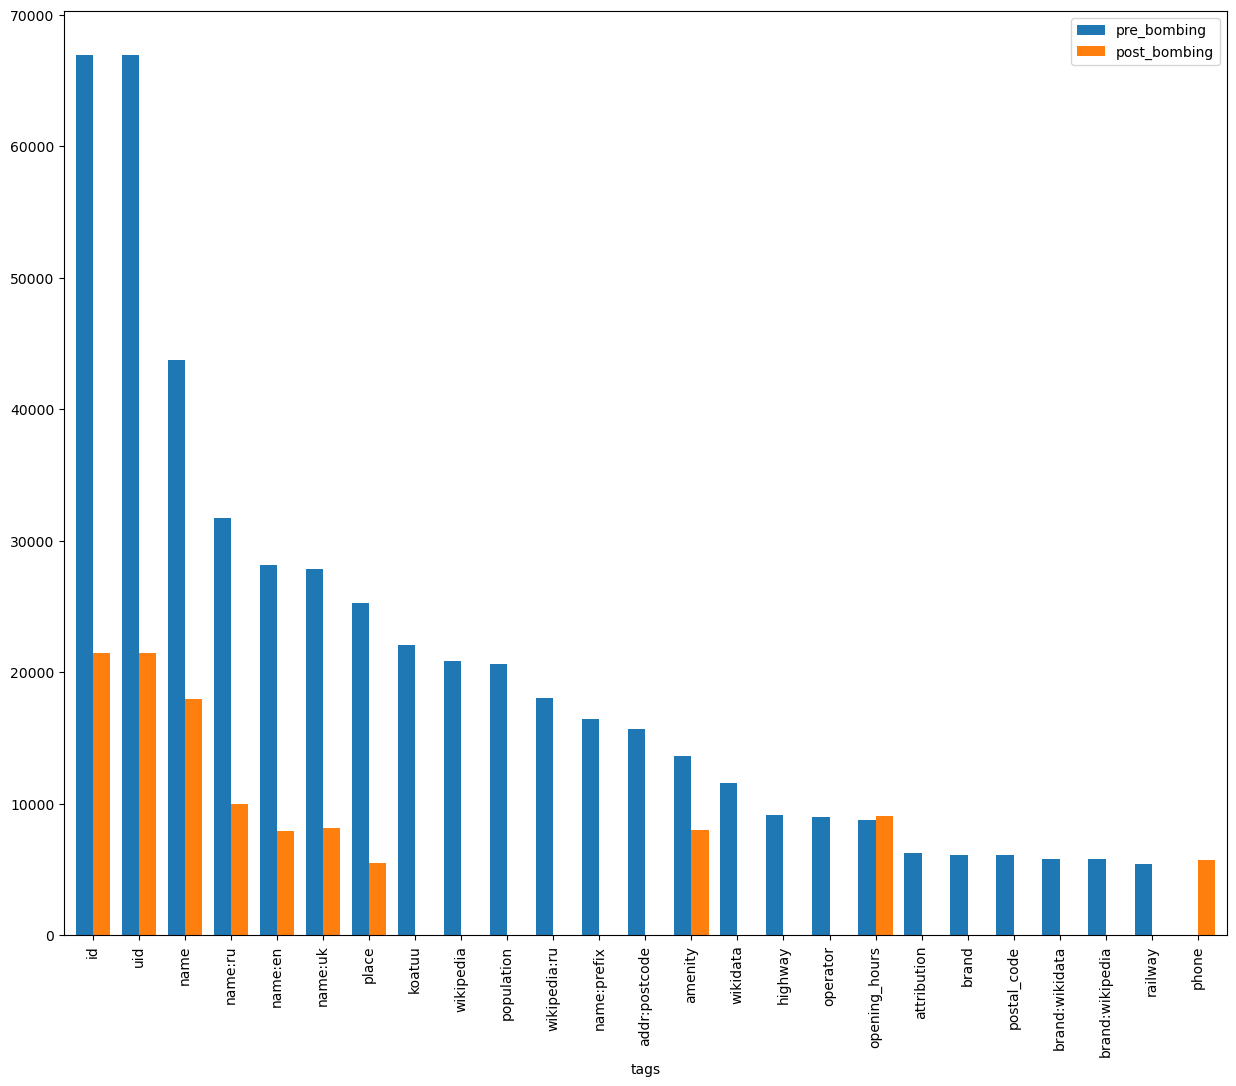

In [181]:
x= df_tg['tags']
y=df_tg['total counts_x']
z=df_tg['total counts_y']

df_tg = pd.DataFrame({
    'tags': x,
    'pre_bombing':y,
    'post_bombing':z
})

ax = df_tg.plot(x="tags", y=["pre_bombing", "post_bombing"],width=0.75, kind="bar", rot=90,figsize=(15, 12))
x_ticks = ax.get_xticks()
x_tick_labels = ax.get_xticklabels()
plt.show()

<Axes: xlabel='total counts', ylabel='Count'>

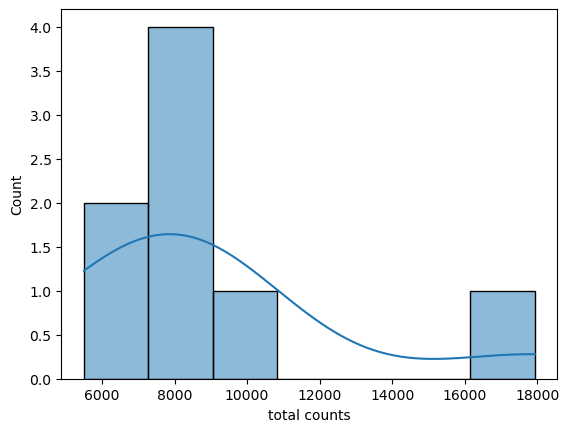

In [182]:
#frequency distribution of tag counts

db_plot=db18.loc[(db18['tags']!='id') & (db18['tags']!='uid'),:]
sb.histplot(data=db_plot, x='total counts',bins='auto',kde=True)

In [183]:
#list of tags for further analysis

column_keep2=db18["tags"].tolist()
column_keep2


['id',
 'uid',
 'name',
 'name:ru',
 'opening_hours',
 'name:uk',
 'amenity',
 'name:en',
 'phone',
 'place']

In [184]:
db19=db17.loc[:,column_keep2]
db19.head()

id      uid name name:ru opening_hours name:uk amenity name:en  \
0   27119141  6718443  NaN     NaN           NaN     NaN     NaN     NaN   
1  252176002  2877744  NaN     NaN           NaN     NaN     NaN     NaN   
2  252176017  4192454  NaN     NaN           NaN     NaN     NaN     NaN   
3  252176029  4192454  NaN     NaN           NaN     NaN     NaN     NaN   
4  252176056  4192454  NaN     NaN           NaN     NaN     NaN     NaN   

  phone place  
0   NaN   NaN  
1   NaN   NaN  
2   NaN   NaN  
3   NaN   NaN  
4   NaN   NaN

In [185]:
#calculating the frequency of unique values under each tags column

remove=['id','uid']

dict1 = {}
for column_name in db19.columns:
    if column_name not in remove:
        unique_value_counts = db19[column_name].value_counts()
        dict1[column_name] = unique_value_counts

sorted(dict1.items())

[('amenity',
  post_office      2468
  pharmacy         2335
  bank              833
  atm               410
  restaurant        250
                   ... 
  taxi                1
  sauna               1
  Библиотеки          1
  night_club          1
  hunting_stand       1
  Name: amenity, Length: 63, dtype: int64),
 ('name',
  Нова Пошта №1          744
  Monobank               489
  Аптека 911             457
  Аптека оптових цін     442
  Харків                 405
                        ... 
  Жертвам Голодомору       1
  Аспект                   1
  Аптека оптовых Ц...      1
  Brent Oil                1
  TIP-TOP  Магазин         1
  Name: name, Length: 2499, dtype: int64),
 ('name:en',
  Nova Poshta #1        837
  Kharkiv               414
  Lyman                 351
  Nova Poshta #2        193
  Bakhmut               180
                       ... 
  Kuriazhanka             1
  Glusco                  1
  Severnaya Saltovka      1
  Kniazha Dolyna          1
  Sauna Club I

In [186]:
uniquevalues=pd.DataFrame.from_dict(dict1)
uniquevalues

name  name:ru  opening_hours  name:uk  amenity  \
                            1.0      NaN            8.0      NaN      NaN   
  IMAGIC                    9.0      NaN            NaN      NaN      NaN   
 TEST COMPANY              10.0      NaN            NaN      NaN      NaN   
"BRONA" Law Firm            NaN      NaN            NaN      NaN      NaN   
"Cafeteria"                 2.0      NaN            NaN      NaN      NaN   
...                         ...      ...            ...      ...      ...   
ёbaby kids medical center   1.0      NaN            NaN      NaN      NaN   
імені Олега Крючкова        NaN      NaN            NaN      4.0      NaN   
їжачок                      1.0      NaN            NaN      NaN      NaN   
№1                          3.0      NaN            NaN      NaN      NaN   
№8                          2.0      NaN            NaN      NaN      NaN   

                           name:en  phone  place  
                               NaN    NaN    NaN  
  IMAGIC                       NaN    NaN    NaN  
 TEST COMPANY                  NaN    NaN    NaN  
"BRONA" Law Firm               7.0    NaN    NaN  
"Cafeteria"                    NaN    NaN    NaN  
...                            ...    ...    ...  
ёbaby kids medical center      NaN    NaN    NaN  
імені Олега Крючкова           NaN    NaN    NaN  
їжачок                         NaN    NaN    NaN  
№1                             NaN    NaN    NaN  
№8                             NaN    NaN    NaN  

[7064 rows x 8 columns]

In [187]:
#displayong the list of unique tags stored by each contributor 

uid_column_name = 'uid'
grouped = db19.groupby(uid_column_name)

# Initialize an empty dictionary to store the results
dict2 = {}

# Iterate over each column (excluding the 'uid' column)
for column_name in db19.columns:
    if column_name != uid_column_name:
        # Apply the unique() function to the current column within each group
        unique_values = grouped[column_name].unique().apply(list)
        
        # Store the unique values in the result_dict with the column_name as the key
        dict2[column_name] = unique_values

        
#storing dictionary into table 
uniquetags2=pd.DataFrame.from_dict(dict2)
uniquetags2=uniquetags2.drop(['id'],axis=1)
uniquetags2.head()

name                        name:ru  \
uid                                                                   
5359      [nan, ст. м. Героїв Праці]  [nan, Станция метро "Герое...   
47756   [nan, Толоконное, Толоконне]              [nan, Толоконное]   
69259  [Борцям Жовтневої революці...  [nan, Борцам Октябрьской р...   
94578  [приют для бездомных, Прит...  [nan, Приют для бездомных,...   
95117  [тер. меловой, тер.мел., n...                          [nan]   

                       opening_hours                        name:uk  \
uid                                                                   
5359                           [nan]                          [nan]   
47756                          [nan]               [nan, Толоконне]   
69259                          [nan]  [nan, Борцям за Незалежніс...   
94578  [Mo-Fr 09:00-17:30, nan, M...  [nan, Попелюшка, Автомат в...   
95117                          [nan]                          [nan]   

                             amenity                        name:en  \
uid                                                                   
5359                           [nan]                          [nan]   
47756                          [nan]   [nan, Tolokonne, Tolokonnoe]   
69259                          [nan]  [nan, Fighters for Indepen...   
94578  [social_facility, school, ...  [nan, Re-start service, Pe...   
95117                          [nan]                          [nan]   

                               phone  place  
uid                                          
5359                           [nan]  [nan]  
47756                          [nan]  [nan]  
69259                          [nan]  [nan]  
94578  [+38 (057) 299-10-05,  +38...  [nan]  
95117                          [nan]  [nan]

In [188]:
#count unique values for each of these tags that are added by contributors 
uid_column_name = 'uid'
dict_re = {}

# Iterate over each column (excluding the 'uid' column)
for column_name in db19.columns:
    if column_name != uid_column_name:
        # Get the unique values for the current column within each group
        unique_values = grouped[column_name].unique()
        
        #  count the total number of unique values
        total_unique_count = len(set([item for sublist in unique_values for item in sublist]))
        
        # Store the total unique count in the dict_re with the column_name as the key
        dict_re[column_name] = total_unique_count
        
dict_re

{'id': 4614,
 'name': 2500,
 'name:ru': 1232,
 'opening_hours': 712,
 'name:uk': 740,
 'amenity': 64,
 'name:en': 899,
 'phone': 1990,
 'place': 11}

In [189]:
# countinng the frequency of each tags added by each of the contributors 

grouped = db19.groupby(uid_column_name)
dict3 = {}

for column_name in db19.columns:
    if column_name != uid_column_name:
        unique_values = grouped[column_name].nunique()
        dict3[column_name] = unique_values

In [190]:
#converting the resulting dictionary into dataframe

contributor_base2=pd.DataFrame.from_dict(dict3)
contributor_base2.reset_index()
contributor_base2=contributor_base2.drop(['id'],axis=1)
contributor_base2

name  name:ru  opening_hours  name:uk  amenity  name:en  phone  \
uid                                                                        
5359         1        1              0        0        0        0      0   
47756        2        1              0        1        0        2      0   
69259        2        2              0        1        0        1      0   
94578     1592      693            680      334       52      429   1949   
95117       10        0              0        0        0        0      0   
...        ...      ...            ...      ...      ...      ...    ...   
16440413     0        0              0        0        0        0      0   
16660607     6        0              5        0        0        0      3   
16700342     1        0              1        0        0        0      1   
16702320     1        0              1        0        0        0      1   
16806504    73        9             15        9       12        2     12   

          place  
uid              
5359          0  
47756         0  
69259         0  
94578         0  
95117         0  
...         ...  
16440413      0  
16660607      0  
16700342      0  
16702320      0  
16806504      0  

[122 rows x 8 columns]

In [191]:
#creating user profile based on previously derived features of all contributors

contributor_base2=timeframe_1.merge(contributor_base2, how='left',on='uid')
contributor_base2=changesets2.merge(contributor_base2, how='left',on='uid')
contributor_base2=version_list2.merge(contributor_base2, how='left',on='uid')
contributor_base2['version'] = contributor_base2['version'].str[:6]
contributor_base2=contributor_base2.merge(df_del2.loc[:,'deleted nodes'], how='left',on='uid')
contributor_base2=id_counts2.merge(contributor_base2, how='left',on='uid')

In [192]:
#final contributor_base that contributed during the 6 months before bombing

contributor_base2

uid    id contribution level             version  new nodes  \
0         629   543           inactive  [8, 3, 2, 1, 1, 1]        540   
1        5359     1           inactive                 [6]          0   
2       12054   221           inactive  [2, 2, 2, 2, 2, 2]        187   
3       39040    48           inactive  [1, 1, 2, 1, 2, 1]         31   
4       47756  3771      casual mapper  [3, 7, 6, 6, 6, 6]       3608   
..        ...   ...                ...                 ...        ...   
216  16660607    15           inactive  [1, 2, 1, 2, 1, 2]          6   
217  16660711    12           inactive  [2, 2, 1, 1, 1, 1]         10   
218  16700342     1           inactive                 [1]          1   
219  16702320     1           inactive                 [1]          1   
220  16806504  1649           inactive  [2, 2, 2, 2, 3, 2]        894   

     edited nodes  changeset active days  name  name:ru  opening_hours  \
0               3          2      6 days   NaN      NaN            NaN   
1               1          1      1 days   1.0      1.0            0.0   
2              34          2      1 days   NaN      NaN            NaN   
3              17          3      1 days   NaN      NaN            NaN   
4             163         12    147 days   2.0      1.0            0.0   
..            ...        ...         ...   ...      ...            ...   
216             9         12     10 days   6.0      0.0            5.0   
217             2          2      1 days   NaN      NaN            NaN   
218             0          1      1 days   1.0      0.0            1.0   
219             0          1      1 days   1.0      0.0            1.0   
220           755         82     11 days  73.0      9.0           15.0   

     name:uk  amenity  name:en  phone  place  deleted nodes  
0        NaN      NaN      NaN    NaN    NaN            NaN  
1        0.0      0.0      0.0    0.0    0.0            NaN  
2        NaN      NaN      NaN    NaN    NaN            NaN  
3        NaN      NaN      NaN    NaN    NaN            NaN  
4        1.0      0.0      2.0    0.0    0.0            NaN  
..       ...      ...      ...    ...    ...            ...  
216      0.0      0.0      0.0    3.0    0.0            4.0  
217      NaN      NaN      NaN    NaN    NaN            1.0  
218      0.0      0.0      0.0    1.0    0.0            NaN  
219      0.0      0.0      0.0    1.0    0.0            NaN  
220      9.0     12.0      2.0   12.0    0.0           88.0  

[221 rows x 17 columns]

In [193]:
contributor_base2

uid    id contribution level             version  new nodes  \
0         629   543           inactive  [8, 3, 2, 1, 1, 1]        540   
1        5359     1           inactive                 [6]          0   
2       12054   221           inactive  [2, 2, 2, 2, 2, 2]        187   
3       39040    48           inactive  [1, 1, 2, 1, 2, 1]         31   
4       47756  3771      casual mapper  [3, 7, 6, 6, 6, 6]       3608   
..        ...   ...                ...                 ...        ...   
216  16660607    15           inactive  [1, 2, 1, 2, 1, 2]          6   
217  16660711    12           inactive  [2, 2, 1, 1, 1, 1]         10   
218  16700342     1           inactive                 [1]          1   
219  16702320     1           inactive                 [1]          1   
220  16806504  1649           inactive  [2, 2, 2, 2, 3, 2]        894   

     edited nodes  changeset active days  name  name:ru  opening_hours  \
0               3          2      6 days   NaN      NaN            NaN   
1               1          1      1 days   1.0      1.0            0.0   
2              34          2      1 days   NaN      NaN            NaN   
3              17          3      1 days   NaN      NaN            NaN   
4             163         12    147 days   2.0      1.0            0.0   
..            ...        ...         ...   ...      ...            ...   
216             9         12     10 days   6.0      0.0            5.0   
217             2          2      1 days   NaN      NaN            NaN   
218             0          1      1 days   1.0      0.0            1.0   
219             0          1      1 days   1.0      0.0            1.0   
220           755         82     11 days  73.0      9.0           15.0   

     name:uk  amenity  name:en  phone  place  deleted nodes  
0        NaN      NaN      NaN    NaN    NaN            NaN  
1        0.0      0.0      0.0    0.0    0.0            NaN  
2        NaN      NaN      NaN    NaN    NaN            NaN  
3        NaN      NaN      NaN    NaN    NaN            NaN  
4        1.0      0.0      2.0    0.0    0.0            NaN  
..       ...      ...      ...    ...    ...            ...  
216      0.0      0.0      0.0    3.0    0.0            4.0  
217      NaN      NaN      NaN    NaN    NaN            1.0  
218      0.0      0.0      0.0    1.0    0.0            NaN  
219      0.0      0.0      0.0    1.0    0.0            NaN  
220      9.0     12.0      2.0   12.0    0.0           88.0  

[221 rows x 17 columns]

In [194]:
uidlist2=contributor_base2['uid'].to_list()
list_activeuid=set(uid_list).intersection(uidlist2)
n=len(list_activeuid)

print('Number of users active after bombing: ',n)

Number of users active after bombing:  64


In [195]:
result = [item for item in uidlist2 if item not in list_activeuid]

In [196]:
print(len(result))

157


## *Analysing location data for the 6 months period*


In [197]:
#fetching locations to analyse spatial data
kharkiv6=kharkiv_2.drop(['deleted','version','visibility','tp','extra'],axis=1)
kharkiv6

id  changeset                  timestamp      uid  \
0       2429409432  124968062  2022-08-16 12:39:26+01:00  6718443   
1       7265842736  121541431  2022-05-26 19:53:08+01:00    94578   
2       4223842845  117904102  2022-02-27 11:13:38+00:00  4085539   
3       1070837920  118833201  2022-03-23 18:13:55+00:00  4811708   
4       5651368366  118709055  2022-03-20 20:01:28+00:00  4811708   
...            ...        ...                        ...      ...   
146302  9592362356  118702028  2022-03-20 16:11:40+00:00  4811708   
146303  9592653729  118707254  2022-03-20 18:59:28+00:00  4811708   
146304  9595500655  118747625  2022-03-21 18:27:53+00:00  4811708   
146305  9598112608  118792812  2022-03-22 20:10:03+00:00  4811708   
146306  2607044859  124024066  2022-07-24 21:42:19+01:00  7154639   

                       user   latitude  longitude        date  
0              Limonadik_XT  49.938425  36.263148  2022-08-16  
1                   andygol  49.990269  36.291117  2022-05-26  
2                  Volkov31  50.419301  37.484713  2022-02-27  
3       Oleksandr Nadtochii  50.068633  36.369141  2022-03-23  
4       Oleksandr Nadtochii  50.088082  36.384877  2022-03-20  
...                     ...        ...        ...         ...  
146302  Oleksandr Nadtochii  50.086010  36.382805  2022-03-20  
146303  Oleksandr Nadtochii  50.084080  36.382186  2022-03-20  
146304  Oleksandr Nadtochii  50.081837  36.394288  2022-03-21  
146305  Oleksandr Nadtochii  50.090662  36.392216  2022-03-22  
146306            trofimich  49.716835  36.313710  2022-07-24  

[146307 rows x 8 columns]

In [198]:
# grouing by uid and calculating mean value of latitudes
db20=kharkiv6.groupby(['uid'])['latitude'].mean()
db20=db20.reset_index()
db20

uid   latitude
0         629  48.953664
1        5359  50.026553
2       12054  49.617379
3       39040  49.615115
4       47756  50.122640
..        ...        ...
216  16660607  50.025008
217  16660711  49.950759
218  16700342  50.056787
219  16702320  50.009320
220  16806504  49.454616

[221 rows x 2 columns]

In [199]:
# grouing by uid and calculating mean value of longitude

db21=kharkiv6.groupby(['uid'])['longitude'].mean()
db21=db21.reset_index()
db20

uid   latitude
0         629  48.953664
1        5359  50.026553
2       12054  49.617379
3       39040  49.615115
4       47756  50.122640
..        ...        ...
216  16660607  50.025008
217  16660711  49.950759
218  16700342  50.056787
219  16702320  50.009320
220  16806504  49.454616

[221 rows x 2 columns]

In [200]:
mean_loc2=db20.merge(db21, on='uid')

In [201]:
mean_loc2

uid   latitude  longitude
0         629  48.953664  37.317699
1        5359  50.026553  36.336903
2       12054  49.617379  37.597833
3       39040  49.615115  36.736962
4       47756  50.122640  37.342891
..        ...        ...        ...
216  16660607  50.025008  36.217777
217  16660711  49.950759  36.252543
218  16700342  50.056787  36.201919
219  16702320  50.009320  36.350163
220  16806504  49.454616  35.136912

[221 rows x 3 columns]

In [202]:
#Finding the locations of the first node contributed by each user

db22=kharkiv6.sort_values(['uid', 'date'], ascending=[True,True])
db22

id  changeset                  timestamp       uid    user  \
468     9808475059  122206968  2022-06-10 12:40:35+01:00       629  Wookey   
1946    9808500298  122206968  2022-06-10 12:40:35+01:00       629  Wookey   
2507    9808500340  122206968  2022-06-10 12:40:35+01:00       629  Wookey   
3171    9808500460  122206968  2022-06-10 12:40:35+01:00       629  Wookey   
3370    9808500374  122206968  2022-06-10 12:40:35+01:00       629  Wookey   
...            ...        ...                        ...       ...     ...   
136004  5685981558  125183604  2022-08-21 14:22:41+01:00  16806504  AnDrSt   
140530  2865221456  125183464  2022-08-21 14:18:54+01:00  16806504  AnDrSt   
142111  4876575344  125183464  2022-08-21 14:18:54+01:00  16806504  AnDrSt   
145482  9967814811  125183464  2022-08-21 14:18:54+01:00  16806504  AnDrSt   
146115  9967856927  125183604  2022-08-21 14:22:41+01:00  16806504  AnDrSt   

         latitude  longitude        date  
468     48.945760  37.445573  2022-06-10  
1946    48.942940  37.445715  2022-06-10  
2507    48.941619  37.447304  2022-06-10  
3171    48.942159  37.456453  2022-06-10  
3370    48.941623  37.451199  2022-06-10  
...           ...        ...         ...  
136004  49.455003  35.131599  2022-08-21  
140530  49.449279  35.101129  2022-08-21  
142111  49.450213  35.102532  2022-08-21  
145482  49.450835  35.103599  2022-08-21  
146115  49.450583  35.138551  2022-08-21  

[146307 rows x 8 columns]

In [203]:
db23=db22.groupby('uid')

first_row= db23.first()
first_record2=pd.DataFrame(first_row).reset_index()
first_record2

uid          id  changeset                  timestamp  \
0         629  9808475059  122206968  2022-06-10 12:40:35+01:00   
1        5359  3436796394  120495077  2022-05-03 11:57:04+01:00   
2       12054  9554275968  118094979  2022-03-04 14:09:31+00:00   
3       39040  9561252910  118212224  2022-03-07 20:46:18+00:00   
4       47756  8951981457  119087031  2022-03-29 21:07:23+01:00   
..        ...         ...        ...                        ...   
216  16660607  9956904517  124969859  2022-08-16 13:20:05+01:00   
217  16660711  9915181010  124150652  2022-07-27 18:07:24+01:00   
218  16700342  9922542565  124305946  2022-07-31 15:37:50+01:00   
219  16702320  9923020404  124316091  2022-07-31 20:26:31+01:00   
220  16806504  3111473632  124782387  2022-08-11 16:53:53+01:00   

                  user   latitude  longitude        date  
0               Wookey  48.945760  37.445573  2022-06-10  
1            user_5359  50.026553  36.336903  2022-05-03  
2        Martin Sauter  49.636745  37.626126  2022-03-04  
3              Dinamik  49.509164  36.499323  2022-03-07  
4          tunnelbauer  50.397892  36.314612  2022-03-29  
..                 ...        ...        ...         ...  
216           Artur'In  50.025034  36.217573  2022-08-16  
217           YellowGM  49.937229  36.260910  2022-07-27  
218      tatyanaochkur  50.056787  36.201919  2022-07-31  
219  Кристина Ефименко  50.009320  36.350163  2022-07-31  
220             AnDrSt  49.457126  35.140740  2022-08-11  

[221 rows x 8 columns]

In [204]:
#finding the median value of the latitude and longitude contributed by each user


db25=kharkiv6.groupby(['uid'])['latitude'].median()
db26=kharkiv6.groupby(['uid'])['longitude'].median()

In [205]:
db25=db25.reset_index()
db26=db26.reset_index()
median_loc2=db25.merge(db26, on='uid')

In [206]:
median_loc2

uid   latitude  longitude
0         629  48.945033  37.444602
1        5359  50.026553  36.336903
2       12054  49.636884  37.595277
3       39040  49.669407  36.721799
4       47756  50.139378  37.607743
..        ...        ...        ...
216  16660607  50.025034  36.217573
217  16660711  49.954925  36.252054
218  16700342  50.056787  36.201919
219  16702320  50.009320  36.350163
220  16806504  49.455148  35.136824

[221 rows x 3 columns]

### *Plotting all three measures of location data to understand the activity*


C:\Users\Shruti\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

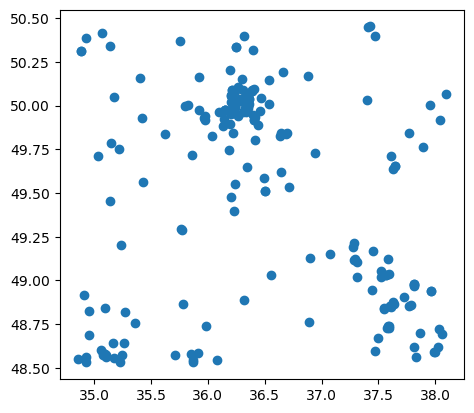

In [207]:
crs={'init':'epsg:4326'}
geometry4=[Point(xy) for xy in zip(first_record2["longitude"], first_record2["latitude"])]
geodata4=gpd.GeoDataFrame(first_record2,crs=crs, geometry=geometry4)
geodata4.plot()

C:\Users\Shruti\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

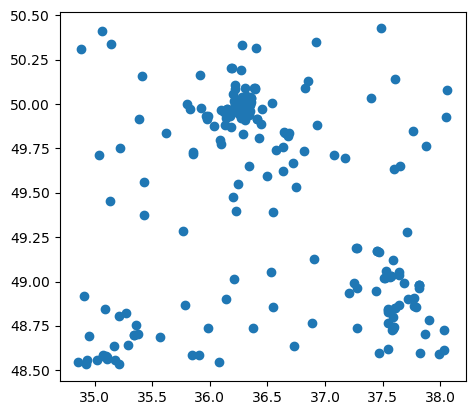

In [208]:
#plotting the median value location of nodes created by each usercrs={'init':'epsg:4326'}
geometry5=[Point(xy) for xy in zip(median_loc2["longitude"], median_loc2["latitude"])]
geodata5=gpd.GeoDataFrame(median_loc2,crs=crs, geometry=geometry5)
geodata5.plot()

C:\Users\Shruti\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

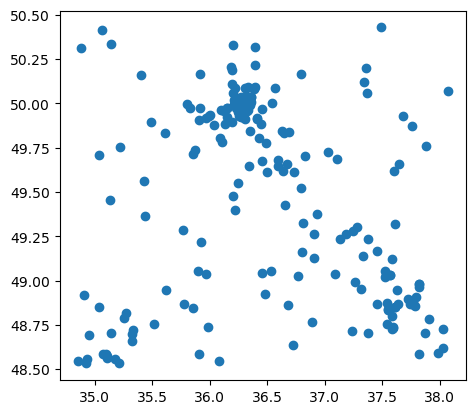

In [209]:
#plotting the mean value of locations

crs={'init':'epsg:4326'}
geometry6=[Point(xy) for xy in zip(mean_loc2["longitude"], mean_loc2["latitude"])]
geodata6=gpd.GeoDataFrame(mean_loc2,crs=crs, geometry=geometry6)
geodata6.plot()

Text(0.5, 0.98, 'kharkiv mapping pattern')

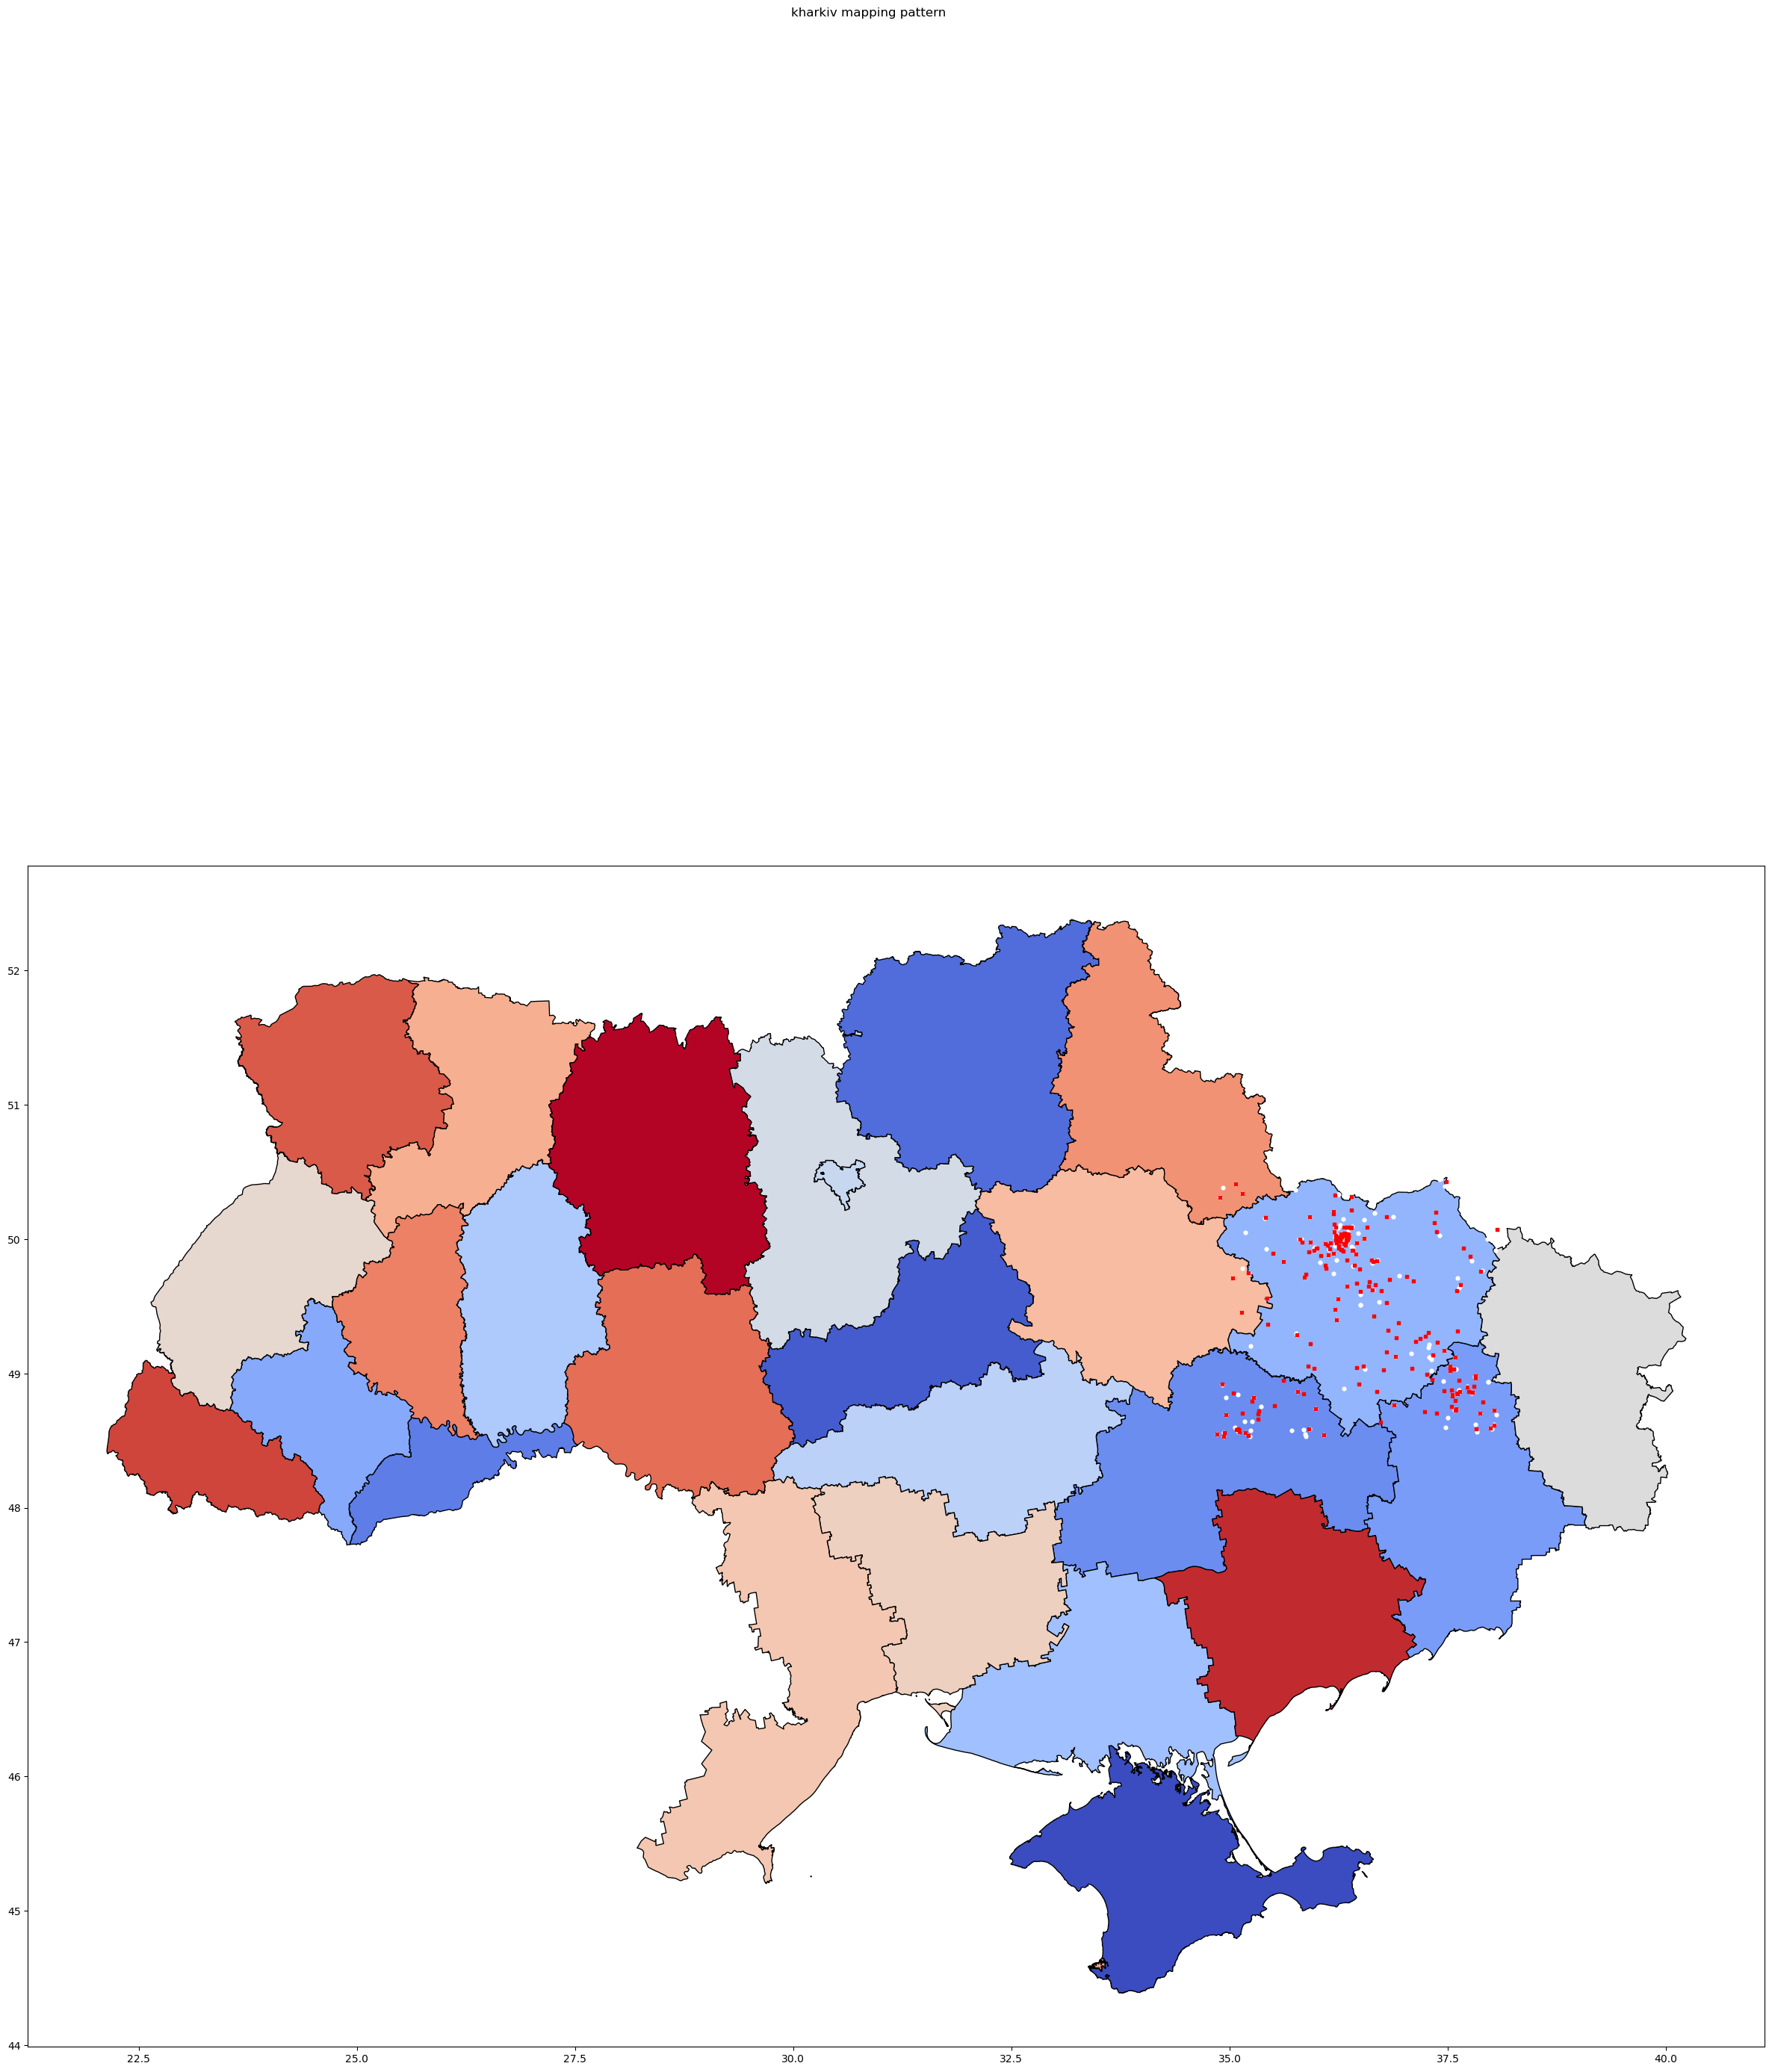

In [210]:
#creating plot with Ukraine's map to understand mapping pattern of the contributors

fig,ax = plt.subplots(figsize=(30, 40))


color = 'blue'

cmapblue = LinearSegmentedColormap.from_list('custom_cmap', [(0, color), (1, color)], N=256)
shapefile.plot(facecolor='white', edgecolor='k',alpha=1,linewidth=1,cmap='coolwarm',ax=ax)


g=geodata4.plot(ax=ax,color='white', marker='o',markersize=12,legend=True);
g=geodata6.plot(ax=ax,color='red',marker='s',markersize=12,legend=True);

fig.suptitle('kharkiv mapping pattern', fontsize=12)



### *Analysing dispersion of mapping using Statistical measure*

In [211]:
db27=kharkiv6.loc[:,['uid','latitude','longitude']]
db27.head()

uid   latitude  longitude
0  6718443  49.938425  36.263148
1    94578  49.990269  36.291117
2  4085539  50.419301  37.484713
3  4811708  50.068633  36.369141
4  4811708  50.088082  36.384877

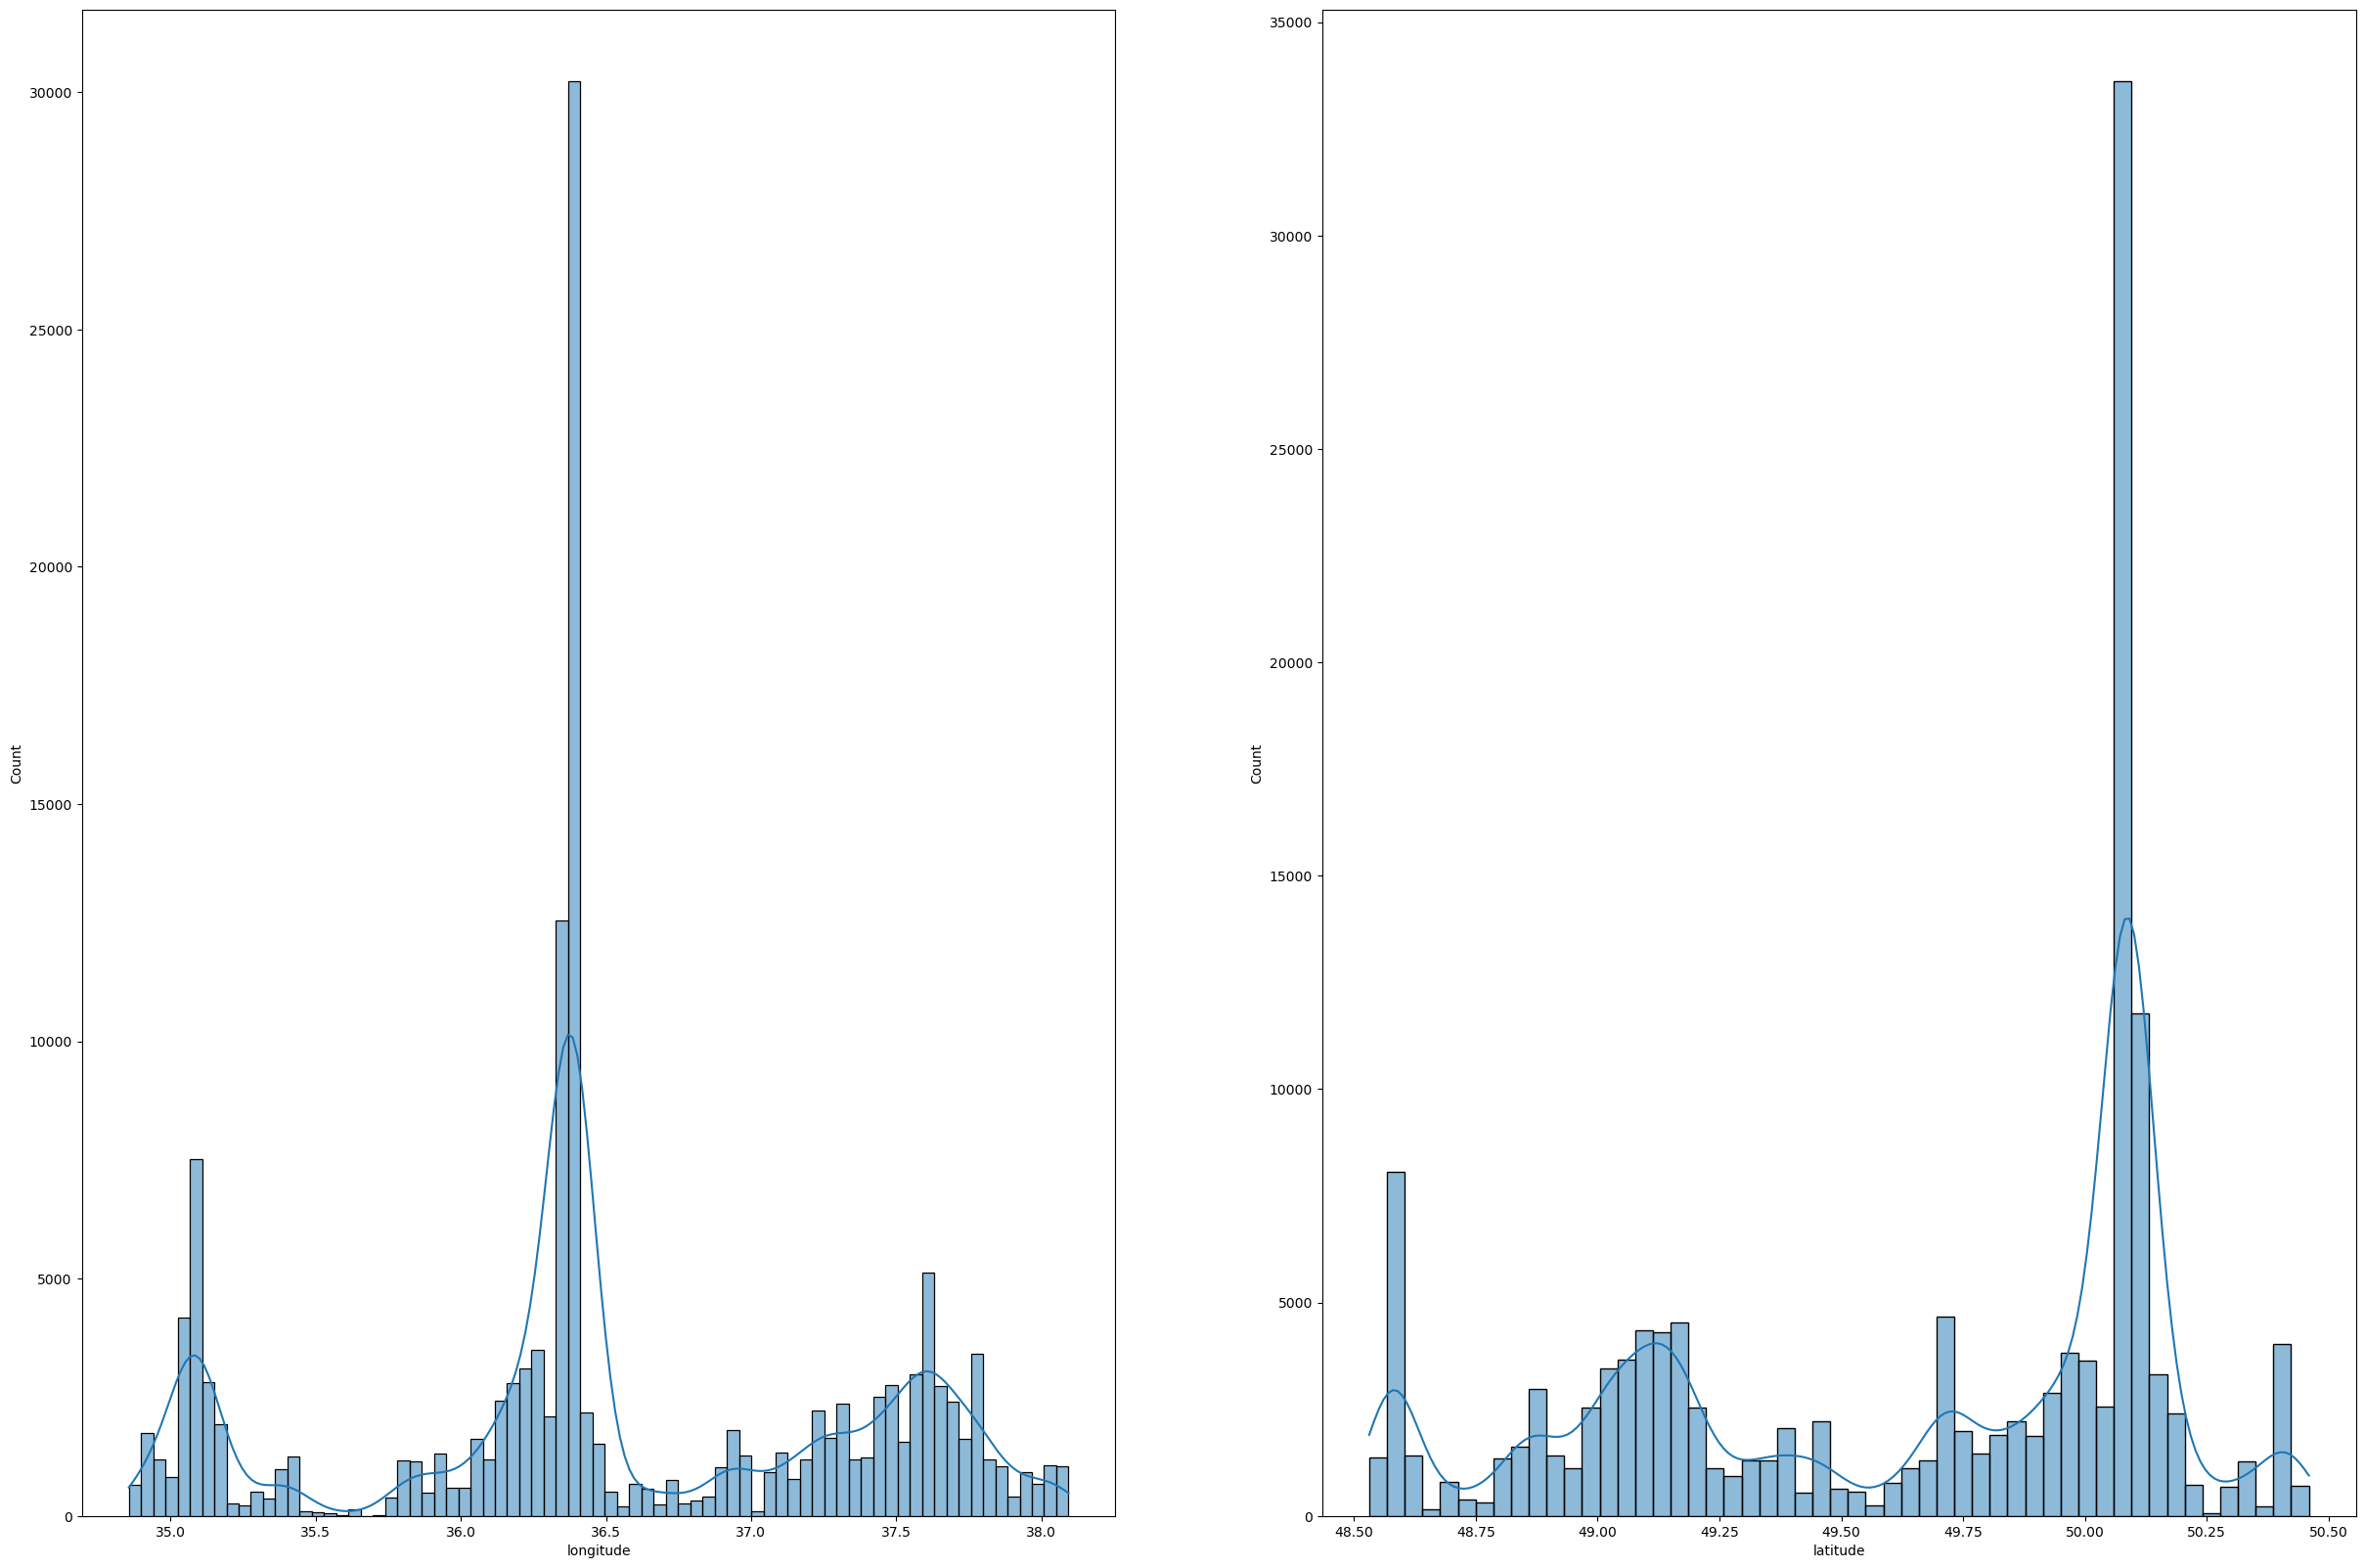

In [212]:
# frequency distribution of latitude and longitude measures

fig,axes= plt.subplots(1,2,figsize=(30, 20))

axes = axes.flatten()

s=sb.histplot(data=db27, x='longitude',bins='auto',kde=True,ax=axes[0])
s=sb.histplot(data=db27, x='latitude',bins='auto',kde=True,ax=axes[1])

In [213]:
#calculating standard deviation of complete dataset 

p_std_lat2=st.pstdev(db27['latitude'])
p_std_lon2=st.pstdev(db27['longitude'])
print('Population std for latitude: ',p_std_lat2)
print('Population std for longitude: ',p_std_lon2)

Population std for latitude:  0.5462966429915654
Population std for longitude:  0.849822930278037


In [214]:
#calculation foe mean value

p_mean_lat2=db27['latitude'].mean()
p_mean_lon2=db27['longitude'].mean()

print('Population mean for latitude: ',p_mean_lat2)
print('Population mean for latitude: ',p_mean_lon2)

Population mean for latitude:  49.636021402629396
Population mean for latitude:  36.505426995368644


In [215]:
#calculation for Coefficient of variance to understand the variability in mapping

cv_lat2=(p_std_lat2/p_mean_lat2)*100
cv_lon2=(p_std_lon2/p_mean_lon2)*100
print('CV for latitude: ',cv_lat2)
print('CV for longitude: ',cv_lon2)

CV for latitude:  1.1006052208741819
CV for longitude:  2.3279358720714374


In [216]:
#calculating std for each contributor group

db28=db27.groupby('uid').agg('std',numeric_only='True')
db28=db28.reset_index()#
db28

uid  latitude  longitude
0         629  0.018231   0.184298
1        5359       NaN        NaN
2       12054  0.043296   0.020386
3       39040  0.383611   0.669488
4       47756  0.154179   0.676946
..        ...       ...        ...
216  16660607  0.000053   0.000422
217  16660711  0.007578   0.003630
218  16700342       NaN        NaN
219  16702320       NaN        NaN
220  16806504  0.003337   0.009453

[221 rows x 3 columns]

In [217]:
db29=db28.merge(mean_loc2,on='uid',how='left')
db29= db29.rename(columns={'latitude_x': 'latitude'})
db29= db29.rename(columns={'longitude_x': 'longitude'})
db29= db29.rename(columns={'latitude_y': 'mean_lat'})
db29= db29.rename(columns={'longitude_y': 'mean_long'})
db29

uid  latitude  longitude   mean_lat  mean_long
0         629  0.018231   0.184298  48.953664  37.317699
1        5359       NaN        NaN  50.026553  36.336903
2       12054  0.043296   0.020386  49.617379  37.597833
3       39040  0.383611   0.669488  49.615115  36.736962
4       47756  0.154179   0.676946  50.122640  37.342891
..        ...       ...        ...        ...        ...
216  16660607  0.000053   0.000422  50.025008  36.217777
217  16660711  0.007578   0.003630  49.950759  36.252543
218  16700342       NaN        NaN  50.056787  36.201919
219  16702320       NaN        NaN  50.009320  36.350163
220  16806504  0.003337   0.009453  49.454616  35.136912

[221 rows x 5 columns]

In [218]:
#calculation for CV applied to each group

db29['CV_lat']=(db29['latitude']/db29['mean_lat']*100)
db29['CV_lon']=(db29['longitude']/db29['mean_long'])*100
db29

uid  latitude  longitude   mean_lat  mean_long    CV_lat    CV_lon
0         629  0.018231   0.184298  48.953664  37.317699  0.037242  0.493861
1        5359       NaN        NaN  50.026553  36.336903       NaN       NaN
2       12054  0.043296   0.020386  49.617379  37.597833  0.087259  0.054221
3       39040  0.383611   0.669488  49.615115  36.736962  0.773173  1.822382
4       47756  0.154179   0.676946  50.122640  37.342891  0.307604  1.812784
..        ...       ...        ...        ...        ...       ...       ...
216  16660607  0.000053   0.000422  50.025008  36.217777  0.000107  0.001166
217  16660711  0.007578   0.003630  49.950759  36.252543  0.015170  0.010012
218  16700342       NaN        NaN  50.056787  36.201919       NaN       NaN
219  16702320       NaN        NaN  50.009320  36.350163       NaN       NaN
220  16806504  0.003337   0.009453  49.454616  35.136912  0.006747  0.026904

[221 rows x 7 columns]

In [219]:
db29.sort_values('CV_lon',ascending=True)

uid  latitude  longitude   mean_lat  mean_long    CV_lat    CV_lon
188  15245342  0.000000   0.000000  49.562188  35.428965  0.000000  0.000000
158  12696959  0.000000   0.000000  49.964583  36.305819  0.000000  0.000000
93    5825854  0.000013   0.000002  48.702580  37.867801  0.000026  0.000006
116   8891425  0.000062   0.000042  50.002763  36.230870  0.000124  0.000115
184  14950764  0.000032   0.000059  48.724523  38.029340  0.000066  0.000155
..        ...       ...        ...        ...        ...       ...       ...
212  16250885       NaN        NaN  50.337784  35.143055       NaN       NaN
213  16363301       NaN        NaN  50.037997  36.276603       NaN       NaN
215  16515532       NaN        NaN  49.993427  36.220766       NaN       NaN
218  16700342       NaN        NaN  50.056787  36.201919       NaN       NaN
219  16702320       NaN        NaN  50.009320  36.350163       NaN       NaN

[221 rows x 7 columns]

In [220]:

df_ts1= kharkiv1.loc[:,['date','id']]
df_ts1=df_ts1.groupby('date').count()
df_ts1=df_ts1.reset_index()
df_ts1['date']=pd.to_datetime(df_ts1['date'])
df_ts1 = df_ts1.set_index('date')

In [221]:
df_ts2= kharkiv4.loc[:,['date','id']]
df_ts2=df_ts2.groupby('date').count()
df_ts2=df_ts2.reset_index()
df_ts2['date']=pd.to_datetime(df_ts2['date'])
df_ts2 = df_ts2.set_index('date')

In [222]:
df_ts=df_ts1.append(df_ts2)
df_ts

C:\Users\Shruti\AppData\Local\Temp\ipykernel_42256\1232277424.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ts=df_ts1.append(df_ts2)


id
date            
2021-08-24   223
2021-08-25  5396
2021-08-26  5615
2021-08-27  4537
2021-08-28  3637
...          ...
2022-08-21   101
2022-08-22   512
2022-08-23   105
2022-08-24   495
2022-08-25     3

[362 rows x 1 columns]

In [223]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Additive Decomposition
add_result = seasonal_decompose(df_ts, model='additive', period=30)


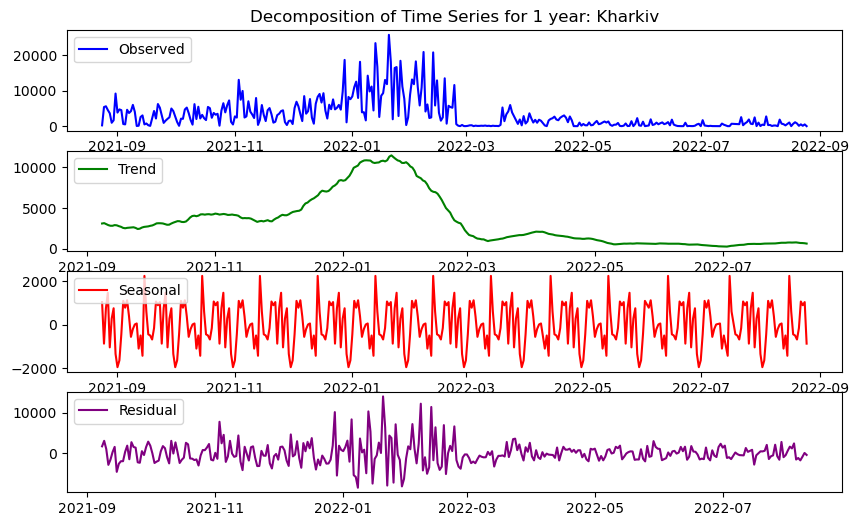

In [224]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 6))
axes[0].set_title('Decomposition of Time Series for 1 year: Kharkiv')
axes[0].plot(df_ts.index, add_result.observed, label='Observed', color='blue')
axes[1].plot(df_ts.index, add_result.trend, label='Trend', color='green')
axes[2].plot(df_ts.index, add_result.seasonal, label='Seasonal', color='red')
axes[3].plot(df_ts.index, add_result.resid, label='Residual', color='purple')
axes[0].legend(loc='upper left')
axes[1].legend(loc='upper left')
axes[2].legend(loc='upper left')
axes[3].legend(loc='upper left')

In [225]:
week1 = seasonal_decompose(df6, model='additive',period=2)
week2 = seasonal_decompose(db6, model='additive',period=2)

In [226]:
month1 = seasonal_decompose(df7, model='additive',period=7)
month2 = seasonal_decompose(db7, model='additive',period=7)

In [227]:
sixmonth1 = seasonal_decompose(df_ts1, model='additive',period=7)
sixmonth2 = seasonal_decompose(df_ts2, model='additive',period=7)


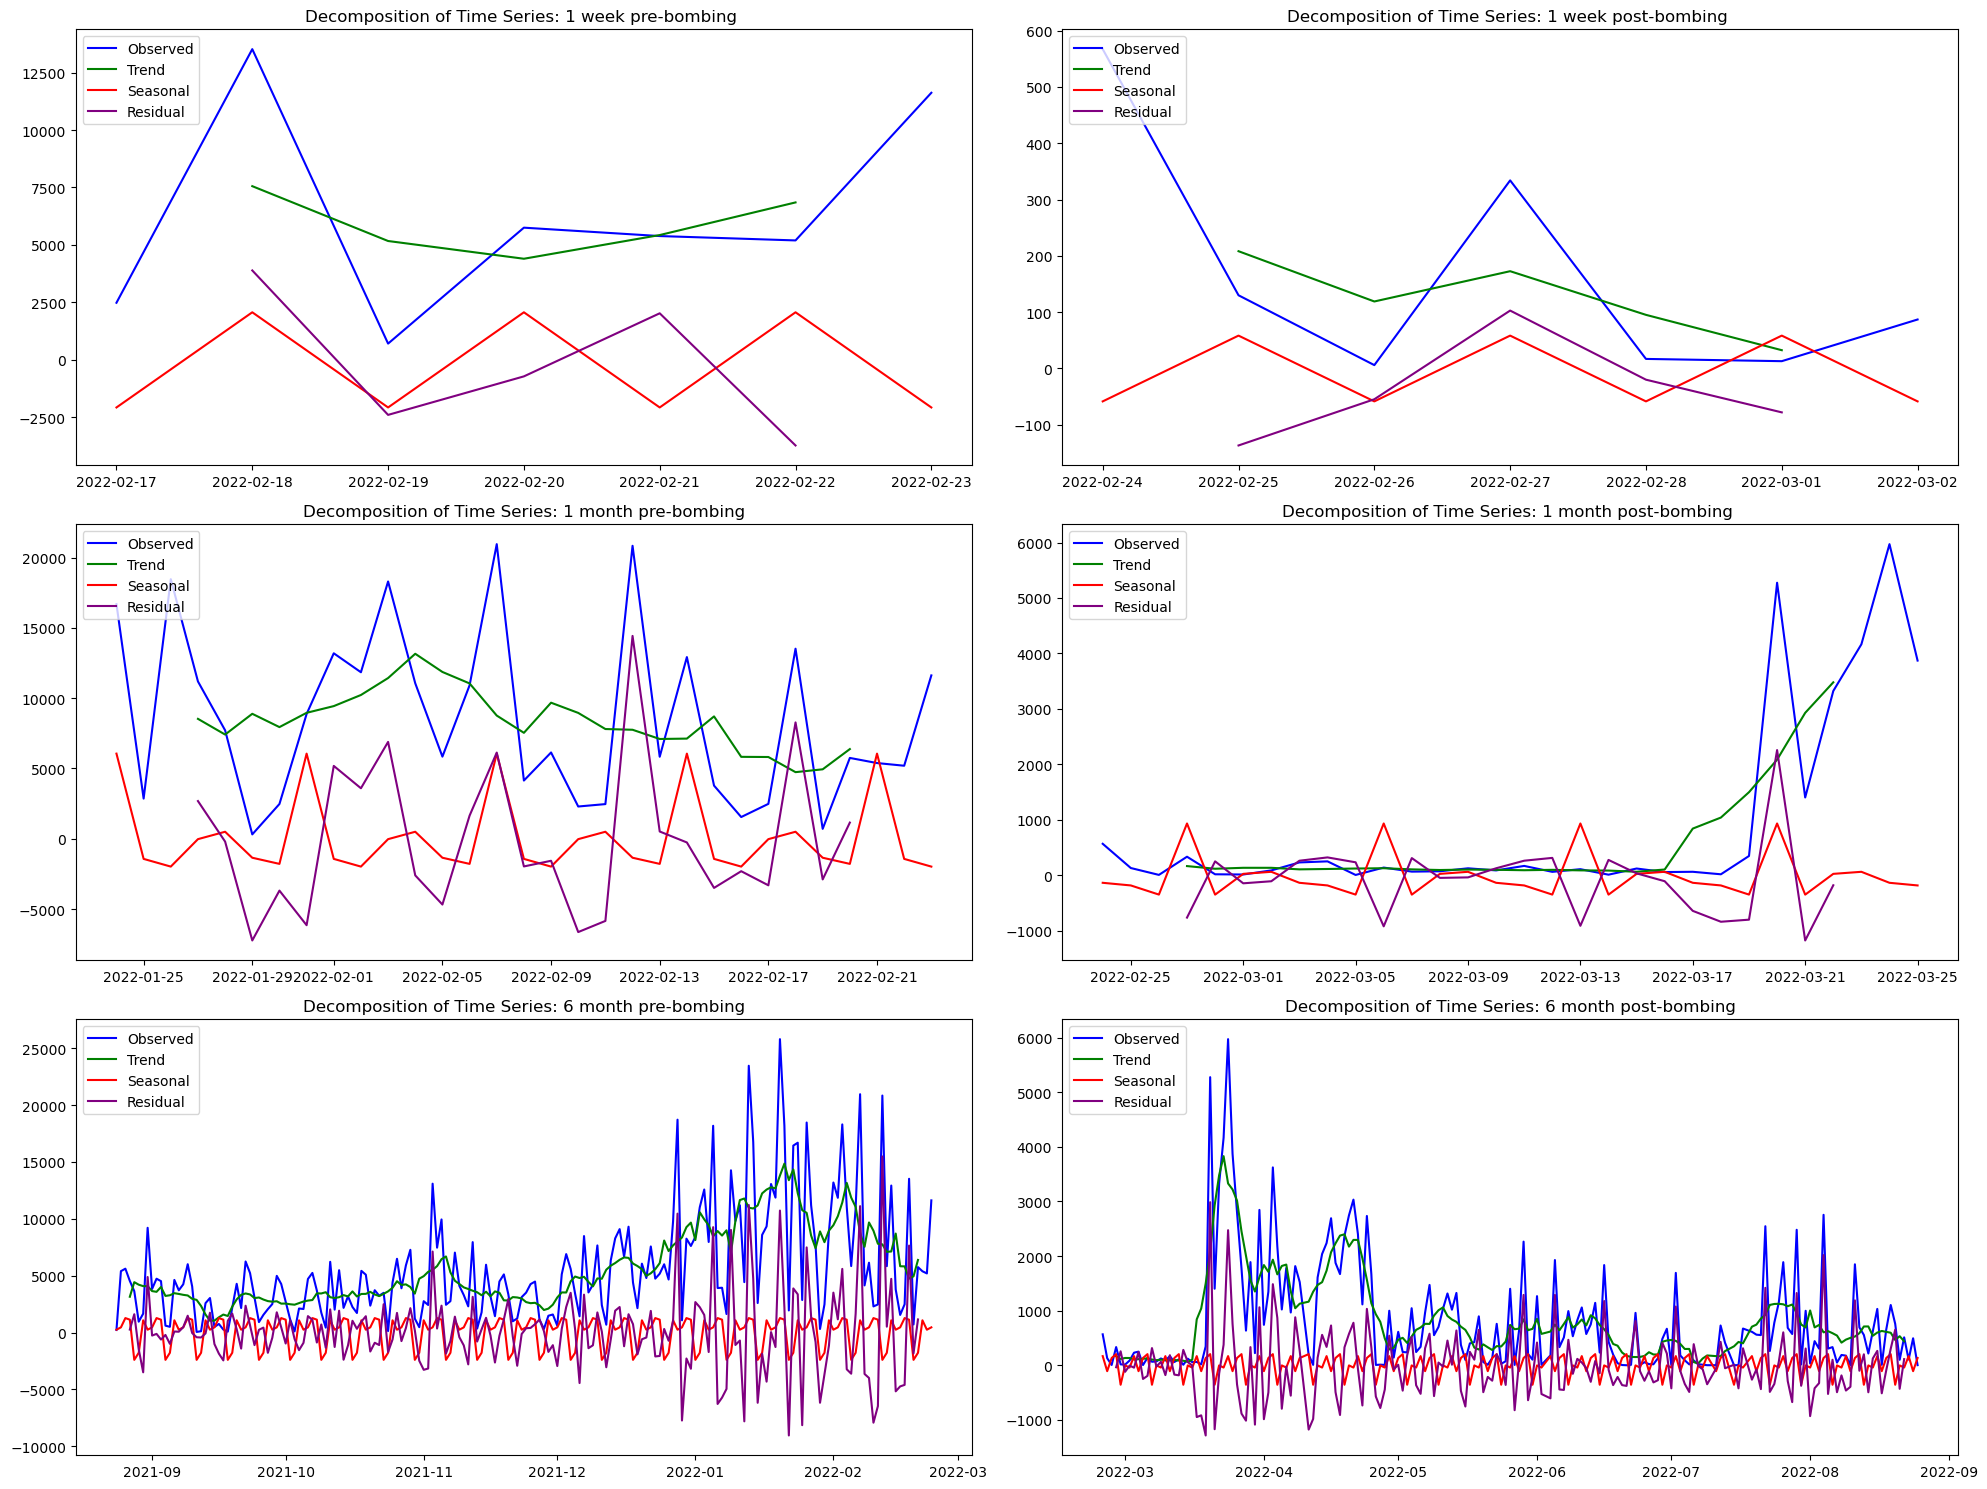

In [228]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

axes[0,0].set_title('Decomposition of Time Series: 1 week pre-bombing ')
axes[0,0].plot(df6.index, week1.observed, label='Observed', color='blue')
axes[0,0].plot(df6.index, week1.trend, label='Trend', color='green')
axes[0,0].plot(df6.index, week1.seasonal, label='Seasonal', color='red')
axes[0,0].plot(df6.index, week1.resid, label='Residual', color='purple')
axes[0,0].legend(loc='upper left')
axes[0,1].set_title('Decomposition of Time Series: 1 week post-bombing ')
axes[0,1].plot(db6.index, week2.observed, label='Observed', color='blue')
axes[0,1].plot(db6.index, week2.trend, label='Trend', color='green')
axes[0,1].plot(db6.index, week2.seasonal, label='Seasonal', color='red')
axes[0,1].plot(db6.index, week2.resid, label='Residual', color='purple')
axes[0,1].legend(loc='upper left')

axes[1,0].set_title('Decomposition of Time Series: 1 month pre-bombing')
axes[1,0].plot(df7.index, month1.observed, label='Observed', color='blue')
axes[1,0].plot(df7.index, month1.trend, label='Trend', color='green')
axes[1,0].plot(df7.index, month1.seasonal, label='Seasonal', color='red')
axes[1,0].plot(df7.index, month1.resid, label='Residual', color='purple')
axes[1,0].legend(loc='upper left')
axes[1,1].set_title('Decomposition of Time Series: 1 month post-bombing ')
axes[1,1].plot(db7.index, month2.observed, label='Observed', color='blue')
axes[1,1].plot(db7.index, month2.trend, label='Trend', color='green')
axes[1,1].plot(db7.index, month2.seasonal, label='Seasonal', color='red')
axes[1,1].plot(db7.index, month2.resid, label='Residual', color='purple')
axes[1,1].legend(loc='upper left')


axes[2,0].set_title('Decomposition of Time Series: 6 month pre-bombing')
axes[2,0].plot(df_ts1.index, sixmonth1.observed, label='Observed', color='blue')
axes[2,0].plot(df_ts1.index, sixmonth1.trend, label='Trend', color='green')
axes[2,0].plot(df_ts1.index, sixmonth1.seasonal, label='Seasonal', color='red')
axes[2,0].plot(df_ts1.index, sixmonth1.resid, label='Residual', color='purple')
axes[2,0].legend(loc='upper left')
axes[2,1].set_title('Decomposition of Time Series: 6 month post-bombing')
axes[2,1].plot(df_ts2.index, sixmonth2.observed, label='Observed', color='blue')
axes[2,1].plot(df_ts2.index, sixmonth2.trend, label='Trend', color='green')
axes[2,1].plot(df_ts2.index, sixmonth2.seasonal, label='Seasonal', color='red')
axes[2,1].plot(df_ts2.index, sixmonth2.resid, label='Residual', color='purple')
axes[2,1].legend(loc='upper left')

plt.tight_layout()